#  Linear Regression 03

# Bayesian shrinkage and sparse regression methods:

# (A) Ridge (B) The _Lasso_

<h2 style="color:green">JAGS version</h2>

# _Josep Fortiana_ $ \hskip3cm$ 2022-05-02

***
###### LaTeX macros
$ \def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\expdist{\operatorname{Exp}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\invgammadist}{IG}$
$\def\laplacedist{\operatorname{Laplace}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\normaldist{\operatorname{N}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\tdist{\operatorname{t}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
***

# 01. `Hitters` dataset in the `ISLR` package

In [1]:
#install.packages("ISLR",dependencies=TRUE,repos="https://cloud.r-project.org")
require(ISLR)
#install.packages("glmnet",dependencies=TRUE,repos="https://cloud.r-project.org")
require(glmnet)

Loading required package: ISLR

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.1-4



### ISLR - Chap 6 - Laboratory 2 - Using the `glmnet` package

[Code from the ISLR website](http://www-bcf.usc.edu/~gareth/ISL/Chapter%206%20Labs.txt)

### Baseball _Hitters_ Data

#### Description

Major League Baseball Data from the 1986 and 1987 seasons (prediction of annual salary as a function of performance).

#### Format

A data frame with 322 observations of major league players on the following 20 variables.

01. `AtBat`:     Number of times at bat in 1986,
02. `Hits`:      Number of hits in 1986,
03. `HmRun`:     Number of home runs in 1986,
04. `Runs`:      Number of runs in 1986,
05. `RBI`:       Number of runs batted in in 1986,
06. `Walks`:     Number of walks in 1986,
07. `Years`:     Number of years in the major leagues,
08. `CAtBat`:    Number of times at bat during his career,
09. `CHits`:     Number of hits during his career,
10. `CHmRun`:    Number of home runs during his career,
11. `CRuns`:     Number of runs during his career,
12. `CRBI`:      Number of runs batted in during his career,
13. `CWalks`:    Number of walks during his career,
14. `League`:    A factor with levels `A` and `N` indicating player's league at the end of 1986,
15. `Division`:  A factor with levels `E` and `W` indicating player's division at the end of 1986,
16. `PutOuts`:   Number of put outs in 1986,
17. `Assists`:   Number of assists in 1986,
18. `Errors`:    Number of errors in 1986,
19. `Salary`:    1987 annual salary on opening day in thousands of dollars,
20. `NewLeague`: A factor with levels `A` and `N` indicating player's league at the beginning of 1987.

#### Source

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.   
This is part of the data that was used in the 1988 ASA Graphics Section Poster Session.   
The salary data were originally from Sports Illustrated, April 20, 1987.   
The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

In [2]:
data(Hitters)
str(Hitters)
names(Hitters)
#rownames(Hitters)

'data.frame':	322 obs. of  20 variables:
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 632 880 200 805 282 76 121 143 0 ...
 $ Assists  : int  33 43 82 11 40 421 127 28

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

Remove `NA` values

In [3]:
dim(Hitters)
sum(is.na(Hitters$Salary))
Hitters=na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters))

[1] 322  20

[1] 59

[1] 263  20

[1] 0

In [4]:
# Prepare x, y for the glmnet syntax
# Convert factors to one-hot indicators
x<-model.matrix(Salary~.,Hitters)[,-1]
y<-Hitters$Salary

Tibshirani (1996) assumes predictor columns centered and standardized to unit variance.   
Actually the `glmnet()` function has a Boolean parameter `standardize` which does precisely this.   
Here we standardize "by hand"

In [5]:
xm<-apply(x,2,mean)
xc<-sweep(x,2,xm,"-")
round(max(abs(apply(xc,2,mean))),6) 
xs<-apply(xc,2,sd)
x0<-sweep(xc,2,xs,"/")
str(x0)

[1] 0

 num [1:263, 1:19] -0.602 0.512 0.627 -0.561 1.292 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:263] "-Alan Ashby" "-Alvin Davis" "-Andre Dawson" "-Andres Galarraga" ...
  ..$ : chr [1:19] "AtBat" "Hits" "HmRun" "Runs" ...


### (OLS) Ordinary Least Squares regression

In [6]:
Hitters.ols<-lm(Salary~.,data=Hitters)
summary(Hitters.ols)


Call:
lm(formula = Salary ~ ., data = Hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-907.62 -178.35  -31.11  139.09 1877.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  163.10359   90.77854   1.797 0.073622 .  
AtBat         -1.97987    0.63398  -3.123 0.002008 ** 
Hits           7.50077    2.37753   3.155 0.001808 ** 
HmRun          4.33088    6.20145   0.698 0.485616    
Runs          -2.37621    2.98076  -0.797 0.426122    
RBI           -1.04496    2.60088  -0.402 0.688204    
Walks          6.23129    1.82850   3.408 0.000766 ***
Years         -3.48905   12.41219  -0.281 0.778874    
CAtBat        -0.17134    0.13524  -1.267 0.206380    
CHits          0.13399    0.67455   0.199 0.842713    
CHmRun        -0.17286    1.61724  -0.107 0.914967    
CRuns          1.45430    0.75046   1.938 0.053795 .  
CRBI           0.80771    0.69262   1.166 0.244691    
CWalks        -0.81157    0.32808  -2.474 0.014057 *  
LeagueN       62.5

The $p$-values of several predictors are large, suggesting these have a low predictive power.

Possibly at least some of these predictors will be discarded after a selection procedure.

In general a large  $p$-value is not enough evidence to discard a predictor (multicollinearity is a property of _a subset_ of predictors)

In [7]:
round(cor(x),1)

AtBat Hits HmRun Runs RBI  Walks Years CAtBat CHits CHmRun CRuns
AtBat       1.0   1.0  0.6   0.9  0.8  0.6   0.0   0.2    0.2   0.2    0.2 
Hits        1.0   1.0  0.5   0.9  0.8  0.6   0.0   0.2    0.2   0.2    0.2 
HmRun       0.6   0.5  1.0   0.6  0.8  0.4   0.1   0.2    0.2   0.5    0.3 
Runs        0.9   0.9  0.6   1.0  0.8  0.7   0.0   0.2    0.2   0.2    0.2 
RBI         0.8   0.8  0.8   0.8  1.0  0.6   0.1   0.3    0.3   0.4    0.3 
Walks       0.6   0.6  0.4   0.7  0.6  1.0   0.1   0.3    0.3   0.3    0.3 
Years       0.0   0.0  0.1   0.0  0.1  0.1   1.0   0.9    0.9   0.7    0.9 
CAtBat      0.2   0.2  0.2   0.2  0.3  0.3   0.9   1.0    1.0   0.8    1.0 
CHits       0.2   0.2  0.2   0.2  0.3  0.3   0.9   1.0    1.0   0.8    1.0 
CHmRun      0.2   0.2  0.5   0.2  0.4  0.3   0.7   0.8    0.8   1.0    0.8 
CRuns       0.2   0.2  0.3   0.2  0.3  0.3   0.9   1.0    1.0   0.8    1.0 
CRBI        0.2   0.2  0.3   0.2  0.4  0.3   0.9   1.0    0.9   0.9    0.9 
CWalks      0.1   0.1  0.2   0.2  0.2  0.4   0.8   0.9    0.9   0.8    0.9 
LeagueN    -0.2  -0.2 -0.2  -0.2 -0.2 -0.1   0.0   0.0    0.0  -0.1   -0.1 
DivisionW  -0.1  -0.1  0.0  -0.1 -0.1 -0.1   0.0   0.0    0.0   0.0    0.0 
PutOuts     0.3   0.3  0.3   0.3  0.3  0.3   0.0   0.1    0.1   0.1    0.1 
Assists     0.3   0.3 -0.2   0.2  0.1  0.1  -0.1   0.0    0.0  -0.2    0.0 
Errors      0.3   0.3  0.0   0.2  0.2  0.1  -0.2  -0.1   -0.1  -0.2   -0.1 
NewLeagueN -0.1  -0.1 -0.2  -0.2 -0.1  0.0   0.0   0.0    0.0  -0.1    0.0 
           CRBI CWalks LeagueN DivisionW PutOuts Assists Errors NewLeagueN
AtBat       0.2  0.1   -0.2    -0.1      0.3      0.3     0.3   -0.1      
Hits        0.2  0.1   -0.2    -0.1      0.3      0.3     0.3   -0.1      
HmRun       0.3  0.2   -0.2     0.0      0.3     -0.2     0.0   -0.2      
Runs        0.2  0.2   -0.2    -0.1      0.3      0.2     0.2   -0.2      
RBI         0.4  0.2   -0.2    -0.1      0.3      0.1     0.2   -0.1      
Walks       0.3  0.4   -0.1    -0.1      0.3      0.1     0.1    0.0      
Years       0.9  0.8    0.0     0.0      0.0     -0.1    -0.2    0.0      
CAtBat      1.0  0.9    0.0     0.0      0.1      0.0    -0.1    0.0      
CHits       0.9  0.9    0.0     0.0      0.1      0.0    -0.1    0.0      
CHmRun      0.9  0.8   -0.1     0.0      0.1     -0.2    -0.2   -0.1      
CRuns       0.9  0.9   -0.1     0.0      0.1      0.0    -0.1    0.0      
CRBI        1.0  0.9   -0.1     0.0      0.1     -0.1    -0.1    0.0      
CWalks      0.9  1.0    0.0    -0.1      0.1     -0.1    -0.1    0.0      
LeagueN    -0.1  0.0    1.0     0.0      0.0      0.1     0.1    0.9      
DivisionW   0.0 -0.1    0.0     1.0      0.0      0.0     0.0    0.0      
PutOuts     0.1  0.1    0.0     0.0      1.0      0.0     0.1    0.1      
Assists    -0.1 -0.1    0.1     0.0      0.0      1.0     0.7    0.0      
Errors     -0.1 -0.1    0.1     0.0      0.1      0.7     1.0    0.1      
NewLeagueN  0.0  0.0    0.9     0.0      0.1      0.0     0.1    1.0

In [8]:
#install.packages("corrplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(corrplot)

Loading required package: corrplot

corrplot 0.92 loaded



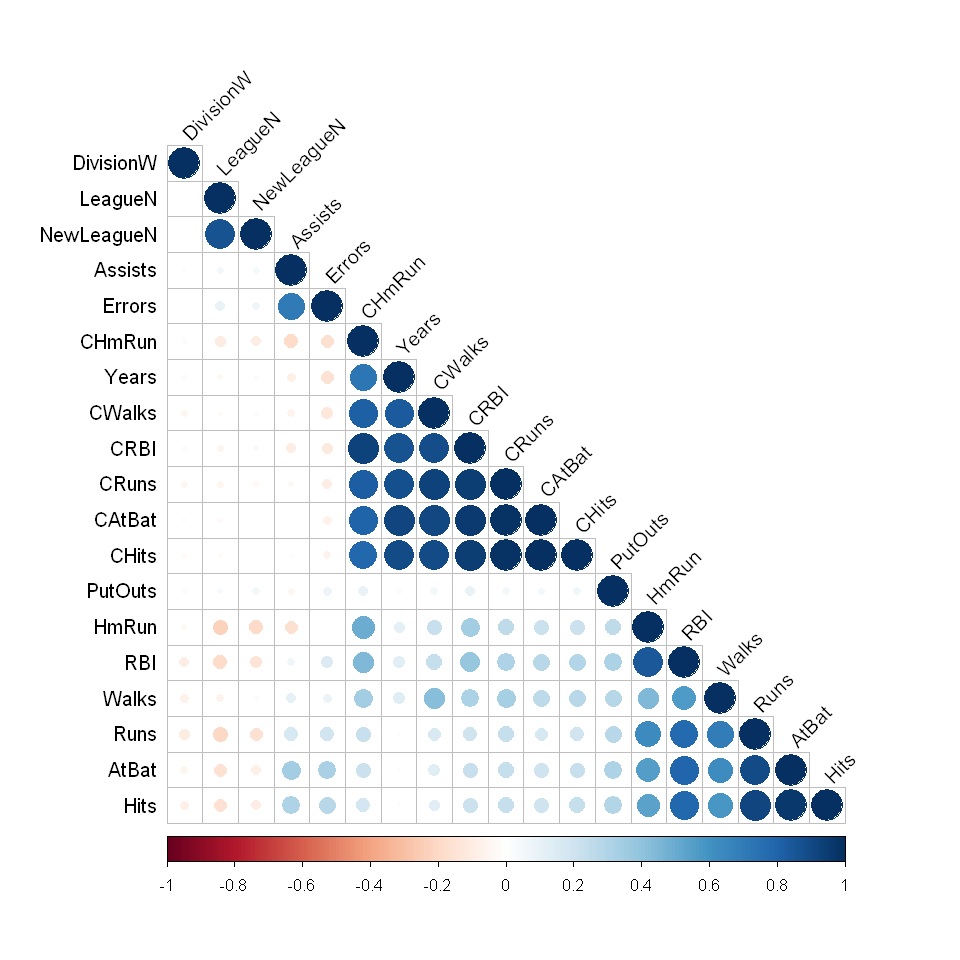

In [9]:
options(repr.plot.width=8,repr.plot.height=8)
corrplot(cor(x), type="lower", order="hclust", tl.col="black", tl.srt=45)

In [10]:
#install.packages("car",dependencies=TRUE,repos="https://cloud.r-project.org")
require(car)

Loading required package: car

Loading required package: carData



In [11]:
round(vif(Hitters.ols),1)

AtBat      Hits     HmRun      Runs       RBI     Walks     Years    CAtBat 
     22.9      30.3       7.8      15.2      11.9       4.1       9.3     251.6 
    CHits    CHmRun     CRuns      CRBI    CWalks    League  Division   PutOuts 
    503.0      46.5     162.5     132.0      19.7       4.1       1.1       1.2 
  Assists    Errors NewLeague 
      2.7       2.2       4.1

Large VIF values indicate multicollinearity.

We obtain the condition number $\kappa$.

In [12]:
round(kappa(x),1)
round(kappa(x0),1)

[1] 31956.9

[1] 65.5

Adding the intercept colummn of ones (it should be counted in the regression condition number)

In [13]:
n<-nrow(x)
x1<-cbind(rep(1,n),x)
x01<-cbind(rep(1,n),x0)
round(kappa(x1),1)
round(kappa(x01),1)

[1] 26973.7

[1] 65.2

$\kappa$ improves with standardization, but VIF values cannot be modified (correlation is invariant under centering and scaling)

# 02 - Ridge regression

####  A grid of lambda values

In [14]:
grid<-exp(seq(8,0,length=100))

In [15]:
# Syntax: 
# alpha=0 is for ridge regression
# alpha=1 is for 'lasso'  regression (cfr. below)
#
Hitters.ridge.01<-glmnet(x,y,alpha=0,lambda=grid) # raw data
Hitters.ridge.02<-glmnet(x0,y,alpha=0,lambda=grid) # standardized data

In [16]:
options(repr.plot.width=12,repr.plot.height=5.5)
old.par<-par(mfrow=c(1,2))
plot(Hitters.ridge.01,xvar="lambda")
plot(Hitters.ridge.02,xvar="lambda")
par(old.par)

In [17]:
set.seed(24025)
Hitters.ridge.01.cv<-cv.glmnet(x,y,alpha=0,lambda=grid)
Hitters.ridge.02.cv<-cv.glmnet(x0,y,alpha=0,lambda=grid)

In [18]:
Hitters.ridge.01.lambda.min<-Hitters.ridge.01.cv$lambda.min
Hitters.ridge.02.lambda.min<-Hitters.ridge.02.cv$lambda.min
Hitters.ridge.01.lambda.1se<-Hitters.ridge.01.cv$lambda.1se
Hitters.ridge.02.lambda.1se<-Hitters.ridge.02.cv$lambda.1se
round(c(Hitters.ridge.01.lambda.min,Hitters.ridge.01.lambda.1se),2)
round(c(log(Hitters.ridge.01.lambda.min),log(Hitters.ridge.01.lambda.1se)),2)
round(c(Hitters.ridge.02.lambda.min,Hitters.ridge.02.lambda.1se),2)
round(c(log(Hitters.ridge.02.lambda.min),log(Hitters.ridge.02.lambda.1se)),2)

[1]  191.05 2980.96

[1] 5.25 8.00

[1]    4.28 2980.96

[1] 1.45 8.00

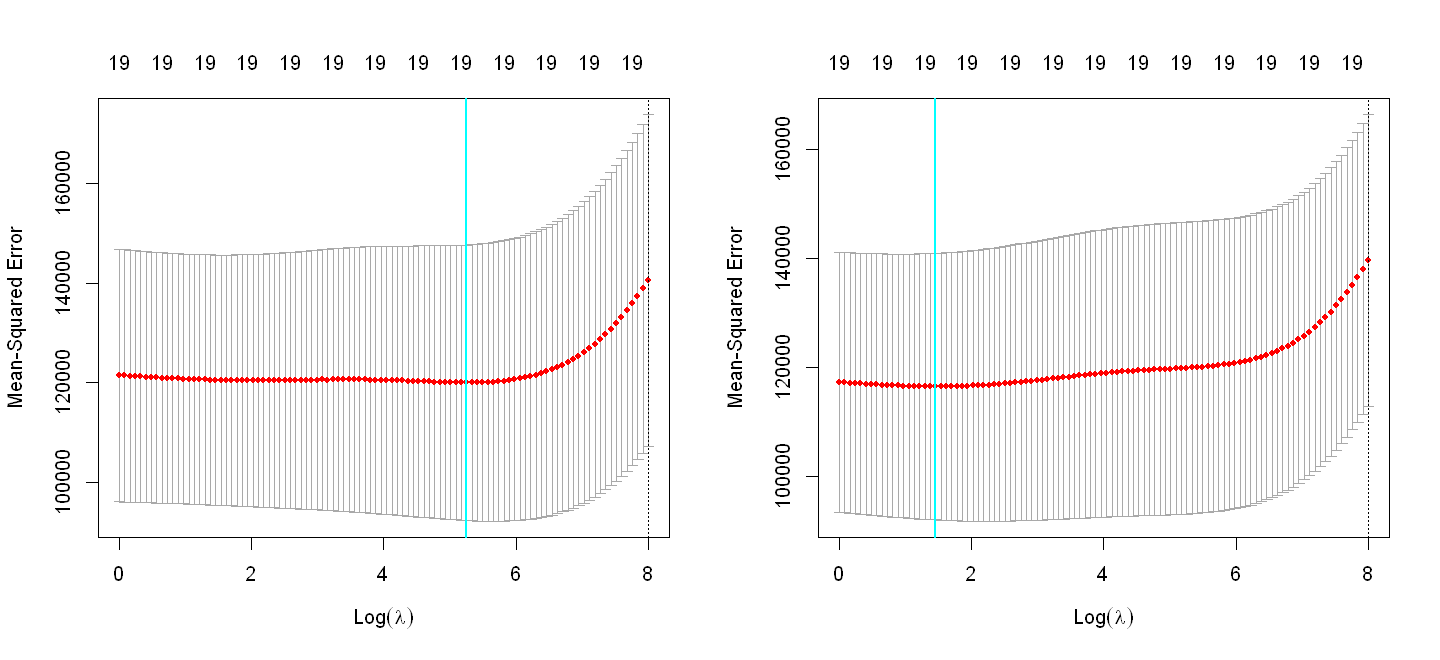

In [19]:
options(repr.plot.width=12,repr.plot.height=5.5)
old.par<-par(mfrow=c(1,2))
plot(Hitters.ridge.01.cv)
abline(v=log(Hitters.ridge.01.lambda.min),lwd=2,col="cyan")
plot(Hitters.ridge.02.cv)
abline(v=log(Hitters.ridge.02.lambda.min),lwd=2,col="cyan")
par(old.par)

In [20]:
# We extract now the regression coefficients with the 'predict' function
coeff.01<-as.numeric(predict(Hitters.ridge.01,s=Hitters.ridge.01.lambda.min,type="coefficients"))
coeff.02<-as.numeric(predict(Hitters.ridge.02,s=Hitters.ridge.02.lambda.min,type="coefficients"))
round(coeff.01,2)
round(coeff.02,2)

[1]   9.95   0.02   1.05   0.02   1.12   0.87   1.85  -0.21   0.01   0.07
[11]   0.46   0.13   0.14   0.02  28.43 -94.36   0.20   0.05  -1.92   6.51

[1]  535.93 -236.55  252.96    5.49   -7.98    1.78  113.24  -50.06 -125.48
[10]  130.99   59.37  228.43  117.73 -159.45   30.68  -61.52   78.20   41.93
[19]  -24.89  -13.95

### In case you were wondering (from [stackoverflow](https://stackoverflow.com/questions/39750965/confidence-intervals-for-ridge-regression))

It turns out that glmnet doesn't offer standard errors (and therefore doesn't give you confidence intervals) as explained in Park and Casella (2008), _The Bayesian Lasso._   
This question is also addressed in the following excerpt from the vignette in the `penalized` package.

It is a very natural question to ask for standard errors of regression coefficients or other estimated quantities. In principle such standard errors can easily be calculated, e.g. using the bootstrap.

Still, this package deliberately does not provide them. The reason for this is that standard errors are not very meaningful for strongly biased estimates such as arise from penalized estimation methods. Penalized estimation is a procedure that reduces the variance of estimators by introducing substantial bias. The bias of each estimator is therefore a major component of its mean squared error, whereas its variance may contribute only a small part.

Unfortunately, in most applications of penalized regression it is impossible to obtain a sufficiently precise estimate of the bias. Any bootstrap-based calculations can only give an assessment of the variance of the estimates. Reliable estimates of the bias are only available if reliable unbiased estimates are available, which is typically not the case in situations in which penalized estimates are used.

Reporting a standard error of a penalized estimate therefore tells only part of the story. It can give a mistaken impression of great precision, completely ignoring the inaccuracy caused by the bias. It is certainly a mistake to make confidence statements that are only based on an assessment of the variance of the estimates, such as bootstrap-based confidence intervals do.

Reliable confidence intervals around the penalized estimates can be obtained in the case of low dimensional models using the standard generalized linear model theory as implemented in `lm`, `glm` and `coxph`.   

Methods for constructing reliable confidence intervals in the high-dimensional situation are, to my knowledge, not available.

# 03 - Lasso

####  A grid of lambda values

In [21]:
grid<-exp(seq(6,0,length=100))

In [22]:
# Syntax: 
# alpha=0 is for ridge regression
# alpha=1 is for 'lasso'  regression (cfr. below)
#
Hitters.lasso.01<-glmnet(x,y,alpha=1,lambda=grid) # raw data
Hitters.lasso.02<-glmnet(x0,y,alpha=1,lambda=grid) # standardized data

In [23]:
options(repr.plot.width=12,repr.plot.height=5.5)
old.par<-par(mfrow=c(1,2))
plot(Hitters.lasso.01,xvar="lambda")
plot(Hitters.lasso.02,xvar="lambda")
par(old.par)

In [24]:
set.seed(24025)
Hitters.lasso.01.cv<-cv.glmnet(x,y,alpha=1,lambda=grid)
Hitters.lasso.02.cv<-cv.glmnet(x0,y,alpha=1,lambda=grid)

In [25]:
Hitters.lasso.01.lambda.min<-Hitters.lasso.01.cv$lambda.min
Hitters.lasso.02.lambda.min<-Hitters.lasso.02.cv$lambda.min
Hitters.lasso.01.lambda.1se<-Hitters.lasso.01.cv$lambda.1se
Hitters.lasso.02.lambda.1se<-Hitters.lasso.02.cv$lambda.1se
round(c(Hitters.lasso.01.lambda.min,Hitters.lasso.01.lambda.1se),2)
round(c(log(Hitters.lasso.01.lambda.min),log(Hitters.lasso.01.lambda.1se)),2)
round(c(Hitters.lasso.02.lambda.min,Hitters.lasso.02.lambda.1se),2)
round(c(log(Hitters.lasso.02.lambda.min),log(Hitters.lasso.02.lambda.1se)),2)

[1]   2.34 100.09

[1] 0.85 4.61

[1]   2.20 100.09

[1] 0.79 4.61

In [26]:
options(repr.plot.width=12,repr.plot.height=5.5)
old.par<-par(mfrow=c(1,2))
plot(Hitters.lasso.01.cv)
abline(v=log(Hitters.lasso.01.lambda.min),lwd=2,col="cyan")
plot(Hitters.lasso.02.cv)
abline(v=log(Hitters.lasso.01.lambda.min),lwd=2,col="cyan")
par(old.par)

### The variable selection feature of the _Lasso_

In [27]:
# We extract now the regression coefficients with the 'predict' function
coeff.01<-as.numeric(predict(Hitters.lasso.01,s=Hitters.lasso.01.lambda.min,type="coefficients"))
coeff.02<-as.numeric(predict(Hitters.lasso.02,s=Hitters.lasso.02.lambda.min,type="coefficients"))
round(coeff.01,2)
round(coeff.02,2)

[1]  131.66   -1.64    5.87    0.00    0.00    0.00    4.89  -10.11    0.00
[10]    0.00    0.55    0.69    0.39   -0.57   32.69 -119.34    0.28    0.19
[19]   -2.21    0.00

[1]  535.93 -247.81  268.66    0.76    0.00    0.00  107.79  -49.43    0.00
[10]    0.00   46.17  233.46  124.65 -153.90   16.52  -59.78   77.27   28.98
[19]  -15.08    0.00

Predictors whose regression coefficient has been shrinked to 0 will be discarded.

# 04 - Bayesian Ridge with JAGS

## 04.01. Gaussian prior for the regression coefficients. Gamma prior for the precision parameter.

In [28]:
str(x)
str(x0)
str(y)

 num [1:263, 1:19] 315 479 496 321 594 185 298 323 401 574 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:263] "-Alan Ashby" "-Alvin Davis" "-Andre Dawson" "-Andres Galarraga" ...
  ..$ : chr [1:19] "AtBat" "Hits" "HmRun" "Runs" ...
 num [1:263, 1:19] -0.602 0.512 0.627 -0.561 1.292 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:263] "-Alan Ashby" "-Alvin Davis" "-Andre Dawson" "-Andres Galarraga" ...
  ..$ : chr [1:19] "AtBat" "Hits" "HmRun" "Runs" ...
 num [1:263] 475 480 500 91.5 750 ...


Append a column of ones -for the intercept- in front of the standardized predictors matrix `x0`

In [29]:
n<-nrow(x0)
p<-ncol(x0)
n
p

[1] 263

[1] 19

In [30]:
#install.packages("rjags",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(rjags)

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs



In [31]:
#install.packages("bayesplot",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(bayesplot)

Loading required package: bayesplot

This is bayesplot version 1.9.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



### Model:

$\beta_{0}$ is the intercept, $\beta=(\beta_{1},\dots,\beta_{p})$ is the vector of regression coefficients, $\tau=1/\sigma^{2}$ is the precision parameter.

$$
    \begin{array}{lcl}
        y_{i}     &\sim    &\normaldist(\mu_{i},\sigma^{2}),\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \tau      &=       &1/\sigma^{2},\\[0.2cm]
        \mu_{i}   &=       &\beta_{0}+\sum_{j=1}^{p}x_{ij}\cdot \beta_{j}
                    =\beta_{0}+x_{i\,\cdot\,}\cdot \beta,\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \beta_{0} &\sim    &\normaldist(0,1.0E01),\\[0.2cm]
        \beta_{j} &\sim    &\normaldist(0,1.0E02),\mskip45mu 1\leq j\leq p,\\[0.2cm]
        \tau      &\sim    &\gammadist(0.01,0.01).
    \end{array}
$$

In [32]:
Hitters.model.String.01  <-  "model{
# Likelihood
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], tau)
        mu[i] <- beta0 + inprod(x[i,],beta[]) 
        }
# A gaussian prior with a small precision for the intercept beta0 and the vector beta of regression coefficients
    beta0 ~ dnorm(0, 0.01)
    for(j in 1:p){
        beta[j] ~ dnorm(0,0.0001)
        }

# Prior for the precision parameter
    sigma <- 1.0/sqrt(tau)
    tau ~ dgamma(0.01, 0.01)
}" 

In [33]:
Hitters.data.list.01<-list(y = y, n = n, p = p, x = x0)

## Compile the model in JAGS

In [34]:
Hitters.model.01<-jags.model(textConnection(Hitters.model.String.01),data=Hitters.data.list.01)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 263
   Unobserved stochastic nodes: 21
   Total graph size: 6079

Initializing model



In [35]:
update(Hitters.model.01, n.iter=2000, progress.bar = "text")

In [36]:
Hitters.sample.01<-coda.samples(Hitters.model.01, variable.names = c("beta0", "beta", "sigma"), 
                 n.iter = 20000, progress.bar = "text" ) 

In [37]:
summary(Hitters.sample.01)


Iterations = 2001:22000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 20000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

            Mean    SD Naive SE Time-series SE
beta[1]  -37.780 74.73  0.52841        1.36054
beta[2]   78.436 76.14  0.53838        1.30523
beta[3]   -9.275 57.54  0.40684        0.89687
beta[4]   29.063 69.65  0.49252        1.18698
beta[5]   20.984 67.95  0.48049        1.11025
beta[6]   54.293 50.58  0.35768        0.66550
beta[7]  -25.102 67.00  0.47377        1.00746
beta[8]   16.658 86.86  0.61416        1.75327
beta[9]   65.263 85.49  0.60448        1.60453
beta[10]  49.555 67.63  0.47818        1.05045
beta[11]  64.961 84.98  0.60089        1.63345
beta[12]  64.380 86.21  0.60959        1.69216
beta[13] -28.459 73.34  0.51857        1.30502
beta[14]  22.280 54.88  0.38804        0.75906
beta[15] -58.046 35.44  0.25059        0.26433
beta[16]  67.631 37.51  0.26524        0.29695
be

In [38]:
#options(repr.plot.width=12,repr.plot.height=15)
#plot(Hitters.sample.01) 

In [39]:
color_scheme_set("brightblue")

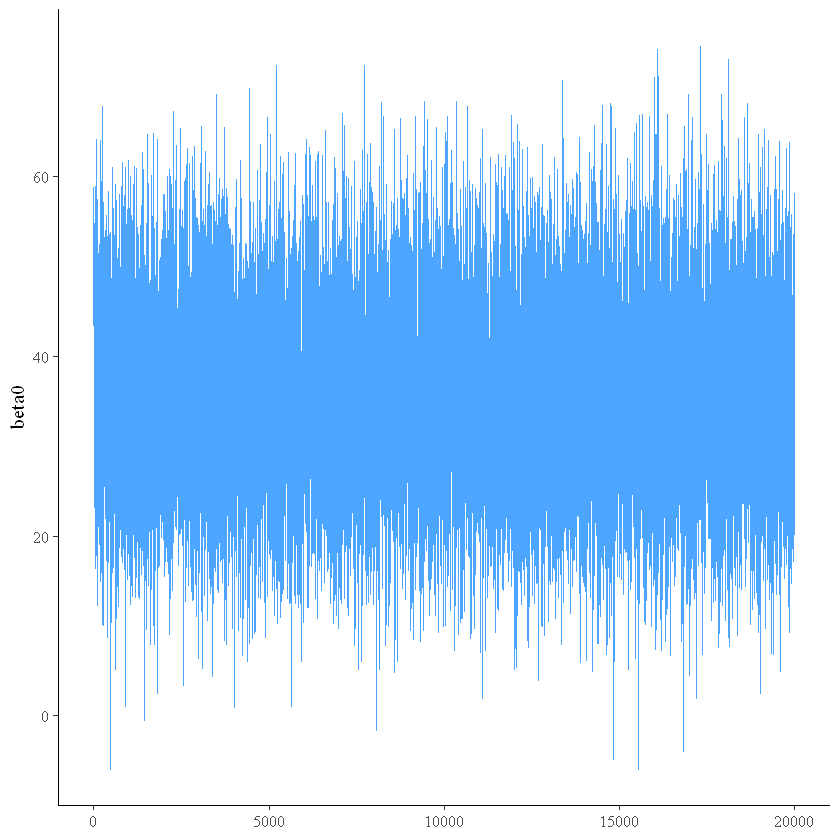

In [40]:
options(repr.plot.width=7,repr.plot.height=7)
mcmc_trace(Hitters.sample.01, pars=vars("beta0"))

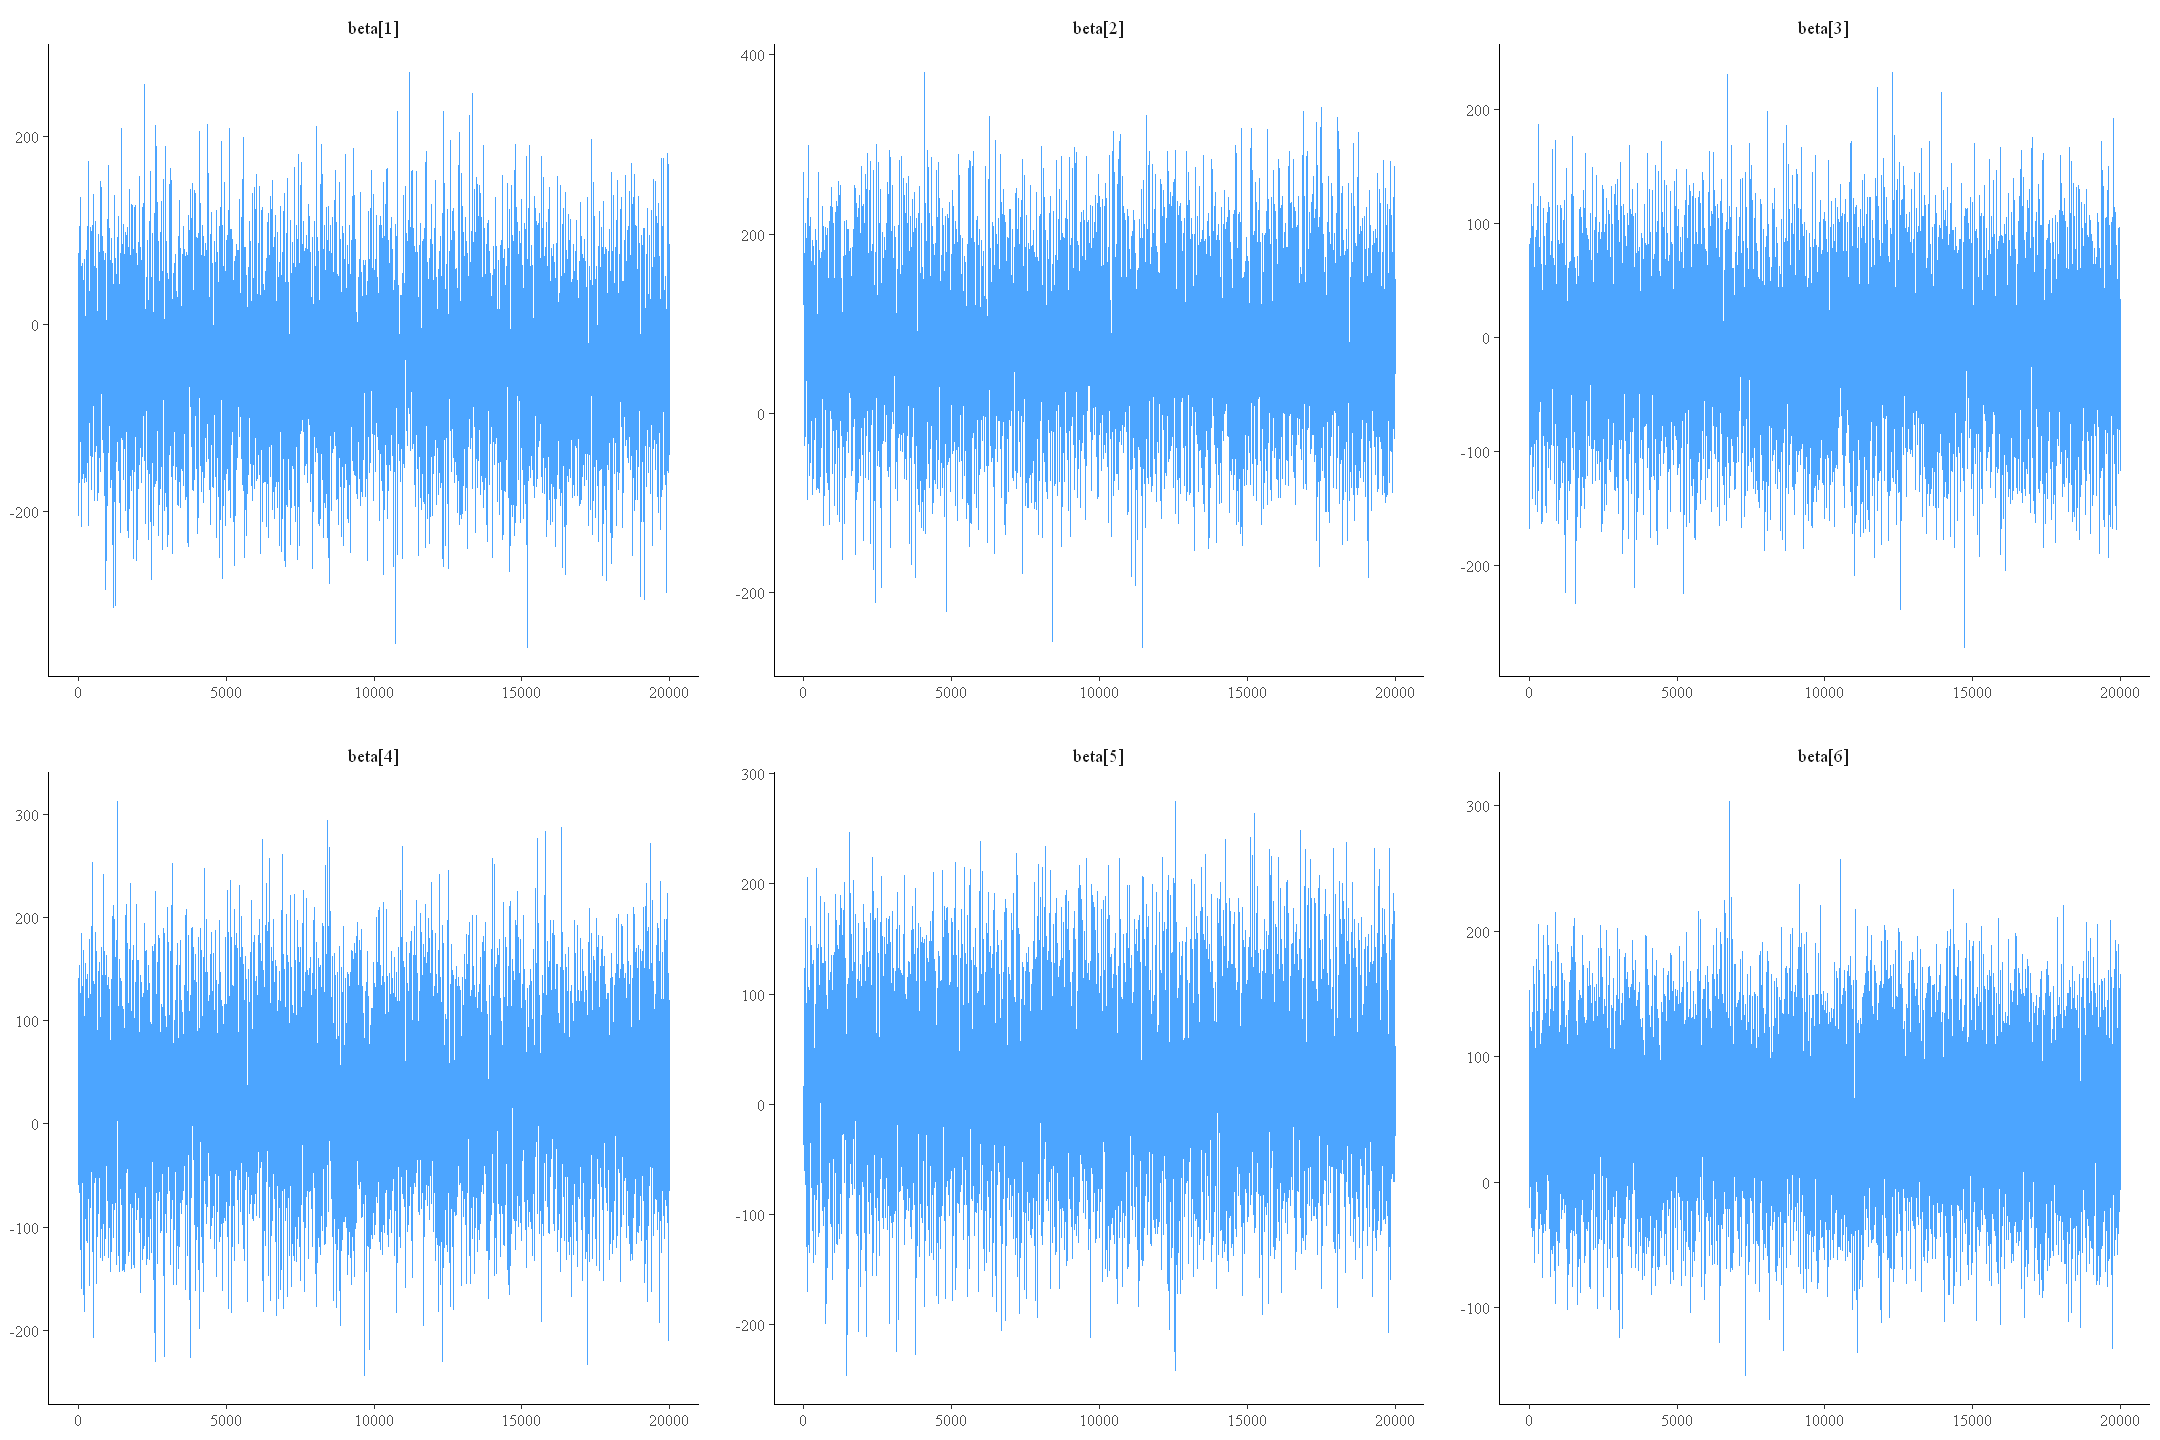

In [41]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.01, pars=vars(param_range("beta", 1:6)))

In [42]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.01, pars=vars(param_range("beta", 7:13)))

In [43]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.01, pars=vars(param_range("beta", 14:19)))

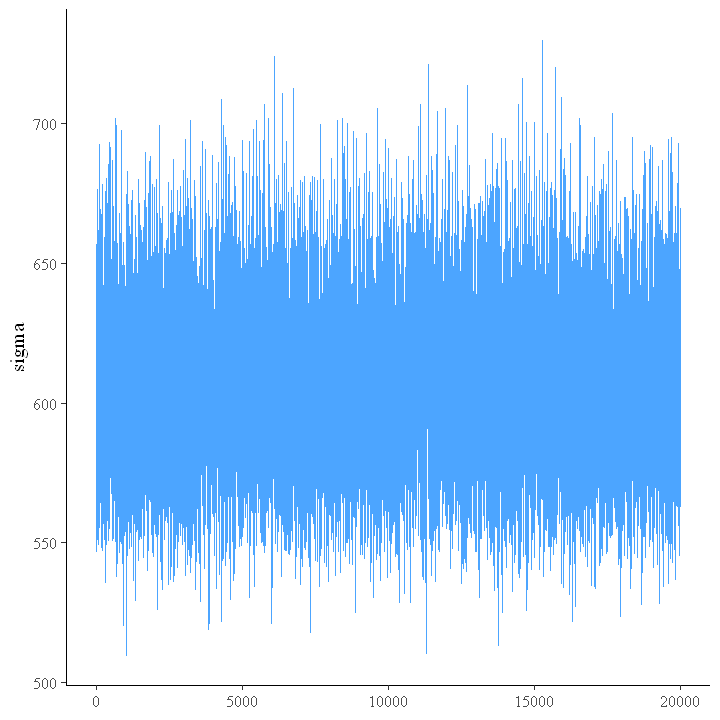

In [44]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_trace(Hitters.sample.01, pars=vars("sigma"))

In [45]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_areas(Hitters.sample.01, pars=vars("beta0"))

In [46]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.01, pars=vars(param_range("beta", 1:6)))

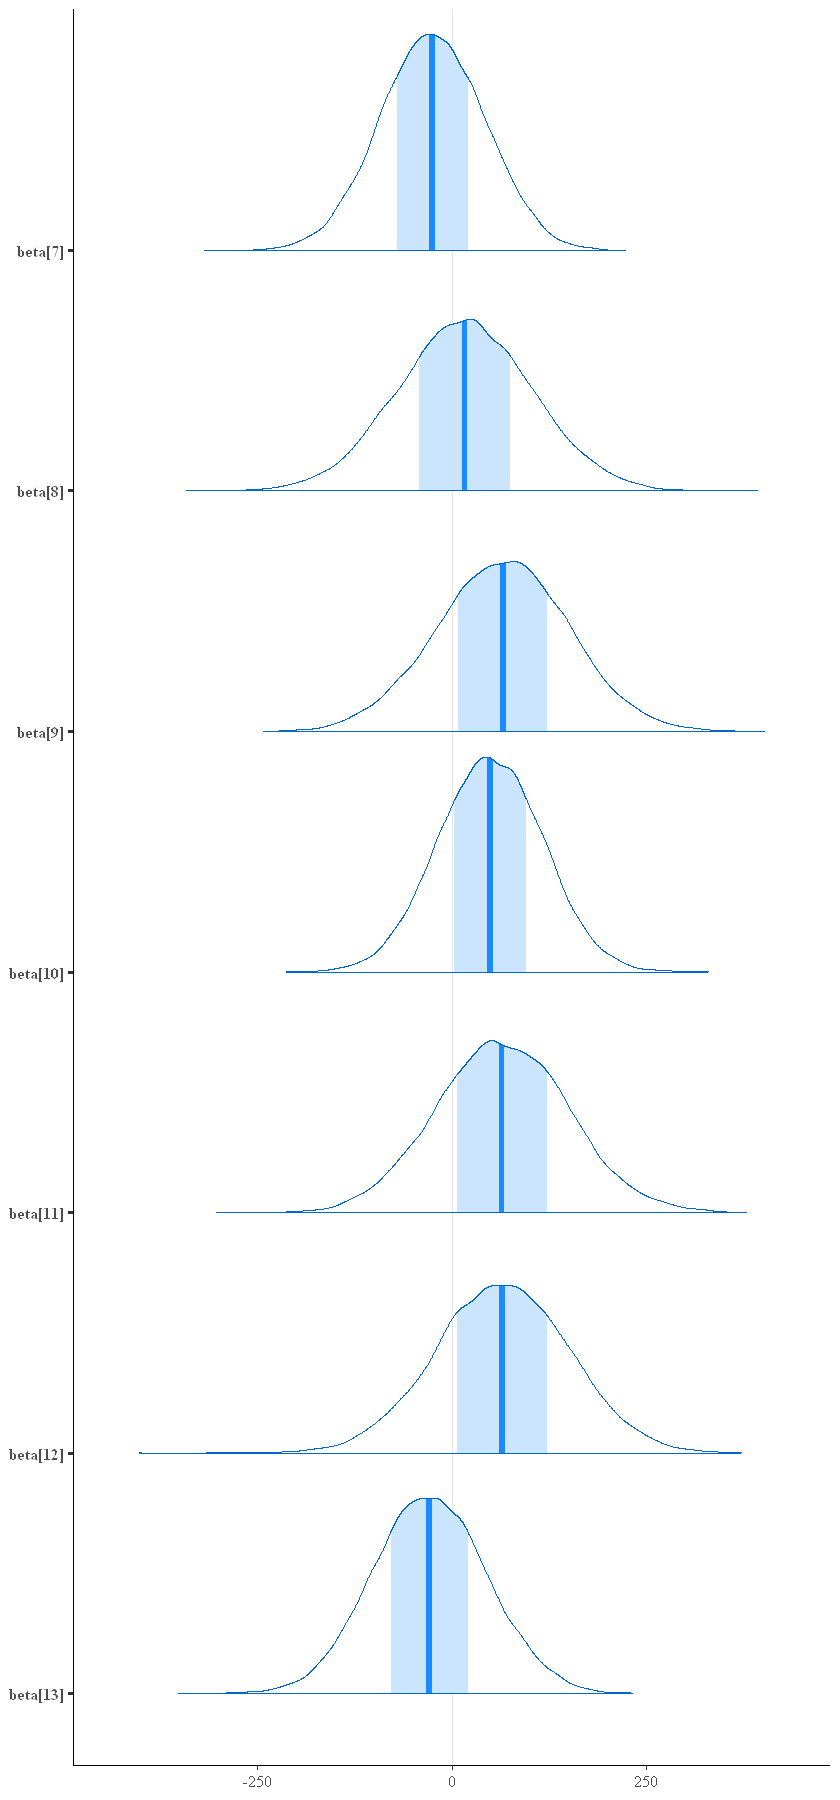

In [47]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.01, pars=vars(param_range("beta", 7:13)))

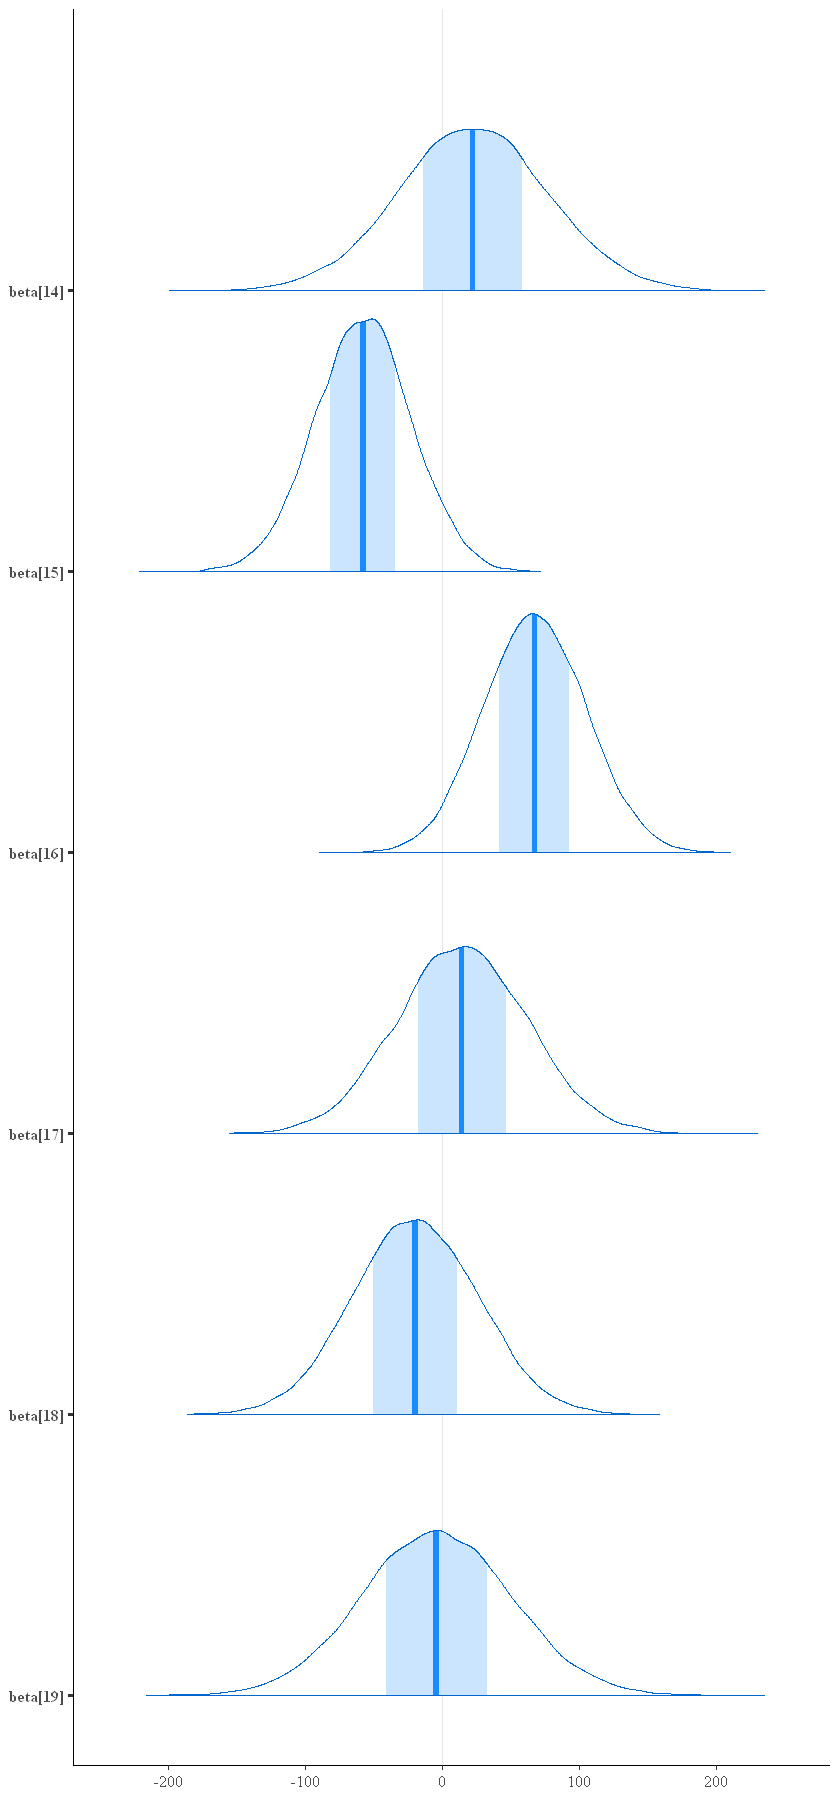

In [48]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.01, pars=vars(param_range("beta", 14:19)))

In [49]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_areas(Hitters.sample.01, pars=vars("sigma"))

## 04.02. Gaussian prior for the regression coefficients. 
### A common gamma prior for the regression coefficients' precision parameter.
### Gamma prior for the precision parameter

### Model:

$\beta_{0}$ is the intercept, $\beta=(\beta_{1},\dots,\beta_{p})$ is the vector of regression coefficients,   
$\tau_{y}=1/\sigma_{y}^{2}$ is the regression response precision parameter,   
$\tau_{\beta}=1/\sigma_{\beta}^{2}$ is the common precision parameter for the regression coefficients.

$$
    \begin{array}{lcl}
        y_{i}        &\sim    &\normaldist(\mu_{i},\sigma_{y}^{2}),\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \mu_{i}      &=       &\beta_{0}+\sum_{j=1}^{p}x_{ij}\cdot \beta_{j}
                              =\beta_{0}+x_{i\,\cdot\,}\cdot \beta,\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \beta_{0}    &\sim    &\normaldist(0,1.0E01),\\[0.2cm]
        \beta_{j}    &\sim    &\normaldist(0,\sigma_{\beta}^{2}),\mskip45mu 1\leq j\leq p,\\[0.2cm]
        \tau_{\beta} &=       &1/\sigma_{\beta}^{2},\\[0.2cm]
        \tau_{\beta} &\sim    &\gammadist(0.01,0.01),\\[0.2cm]
        \tau_{y}     &=       &1/\sigma_{y}^{2},\\[0.2cm]
        \tau_{y}     &\sim    &\gammadist(0.01,0.01).
    \end{array}
$$

 <span class="MathJax_Preview" style="color: inherit; display: none;"> <span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" data-mathml="&lt;math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;&gt;&lt;msub&gt;&lt;mi&gt;&amp;#x03B2;&lt;/mi&gt;&lt;mi&gt;j&lt;/mi&gt;&lt;/msub&gt;&lt;mo&gt;&amp;#x223C;&lt;/mo&gt;&lt;mstyle displaystyle=&quot;false&quot; scriptlevel=&quot;0&quot;&gt;&lt;mtext&gt;Normal&lt;/mtext&gt;&lt;/mstyle&gt;&lt;mo stretchy=&quot;false&quot;&gt;(&lt;/mo&gt;&lt;mn&gt;0&lt;/mn&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;msubsup&gt;&lt;mi&gt;&amp;#x03C3;&lt;/mi&gt;&lt;mi&gt;b&lt;/mi&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;/msubsup&gt;&lt;mo stretchy=&quot;false&quot;&gt;)&lt;/mo&gt;&lt;/math&gt;" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-122" style="width: 10.009em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.335em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.248em, 1008.23em, 2.601em, -999.998em); top: -2.171em; left: 0em;"><span class="mrow" id="MathJax-Span-123"><span class="msubsup" id="MathJax-Span-124"><span style="display: inline-block; position: relative; width: 0.928em; height: 0px;"><span style="position: absolute; clip: rect(3.171em, 1000.57em, 4.275em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-125" style="font-family: MathJax_Math-italic;">β<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; top: -3.844em; left: 0.572em;"><span class="mi" id="MathJax-Span-126" style="font-size: 70.7%; font-family: MathJax_Math-italic;">j <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-127" style="font-family: MathJax_Main; padding-left: 0.287em;">∼ <span class="mstyle" id="MathJax-Span-128" style="padding-left: 0.287em;"><span class="mrow" id="MathJax-Span-129"><span class="mtext" id="MathJax-Span-130" style="font-family: MathJax_Main;">Normal   <span class="mo" id="MathJax-Span-131" style="font-family: MathJax_Main;">( <span class="mn" id="MathJax-Span-132" style="font-family: MathJax_Main;">0 <span class="mo" id="MathJax-Span-133" style="font-family: MathJax_Main;">, <span class="msubsup" id="MathJax-Span-134" style="padding-left: 0.18em;"><span style="display: inline-block; position: relative; width: 1.07em; height: 0px;"><span style="position: absolute; clip: rect(3.456em, 1000.57em, 4.097em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-135" style="font-family: MathJax_Math-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.421em, 1000.43em, 4.097em, -999.998em); top: -4.343em; left: 0.607em;"><span class="mn" id="MathJax-Span-136" style="font-size: 70.7%; font-family: MathJax_Main;">2 <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.385em, 1000.39em, 4.097em, -999.998em); top: -3.666em; left: 0.572em;"><span class="mi" id="MathJax-Span-137" style="font-size: 70.7%; font-family: MathJax_Math-italic;">b <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-138" style="font-family: MathJax_Main;">)  <span style="display: inline-block; width: 0px; height: 2.174em;">   <span style="display: inline-block; overflow: hidden; vertical-align: -0.425em; border-left: 0px solid; width: 0px; height: 1.455em;">  </nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>β</mi><mi>j</mi></msub><mo>∼</mo><mstyle displaystyle="false" scriptlevel="0"><mtext>Normal</mtext></mstyle><mo stretchy="false">(</mo><mn>0</mn><mo>,</mo><msubsup><mi>σ</mi><mi>b</mi><mn>2</mn></msubsup><mo stretchy="false">)</mo></math>  <script type="math/tex" id="MathJax-Element-10">\beta_j \sim \mbox{Normal}(0,\sigma_b^2)</script> where <span class="MathJax_Preview" style="color: inherit; display: none;"> <span class="MathJax" id="MathJax-Element-11-Frame" tabindex="0" data-mathml="&lt;math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;&gt;&lt;msubsup&gt;&lt;mi&gt;&amp;#x03C3;&lt;/mi&gt;&lt;mi&gt;b&lt;/mi&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;/msubsup&gt;&lt;mo&gt;&amp;#x223C;&lt;/mo&gt;&lt;mstyle displaystyle=&quot;false&quot; scriptlevel=&quot;0&quot;&gt;&lt;mtext&gt;InvGamma&lt;/mtext&gt;&lt;/mstyle&gt;&lt;mo stretchy=&quot;false&quot;&gt;(&lt;/mo&gt;&lt;mn&gt;0.01&lt;/mn&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;mn&gt;0.01&lt;/mn&gt;&lt;mo stretchy=&quot;false&quot;&gt;)&lt;/mo&gt;&lt;/math&gt;" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-139" style="width: 14.532em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.11em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.248em, 1012em, 2.601em, -999.998em); top: -2.171em; left: 0em;"><span class="mrow" id="MathJax-Span-140"><span class="msubsup" id="MathJax-Span-141"><span style="display: inline-block; position: relative; width: 1.07em; height: 0px;"><span style="position: absolute; clip: rect(3.456em, 1000.57em, 4.097em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-142" style="font-family: MathJax_Math-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.421em, 1000.43em, 4.097em, -999.998em); top: -4.343em; left: 0.607em;"><span class="mn" id="MathJax-Span-143" style="font-size: 70.7%; font-family: MathJax_Main;">2 <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.385em, 1000.39em, 4.097em, -999.998em); top: -3.666em; left: 0.572em;"><span class="mi" id="MathJax-Span-144" style="font-size: 70.7%; font-family: MathJax_Math-italic;">b <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-145" style="font-family: MathJax_Main; padding-left: 0.287em;">∼ <span class="mstyle" id="MathJax-Span-146" style="padding-left: 0.287em;"><span class="mrow" id="MathJax-Span-147"><span class="mtext" id="MathJax-Span-148" style="font-family: MathJax_Main;">InvGamma   <span class="mo" id="MathJax-Span-149" style="font-family: MathJax_Main;">( <span class="mn" id="MathJax-Span-150" style="font-family: MathJax_Main;">0.01 <span class="mo" id="MathJax-Span-151" style="font-family: MathJax_Main;">, <span class="mn" id="MathJax-Span-152" style="font-family: MathJax_Main; padding-left: 0.18em;">0.01 <span class="mo" id="MathJax-Span-153" style="font-family: MathJax_Main;">)  <span style="display: inline-block; width: 0px; height: 2.174em;">   <span style="display: inline-block; overflow: hidden; vertical-align: -0.425em; border-left: 0px solid; width: 0px; height: 1.455em;">  </nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mi>σ</mi><mi>b</mi><mn>2</mn></msubsup><mo>∼</mo><mstyle displaystyle="false" scriptlevel="0"><mtext>InvGamma</mtext></mstyle><mo stretchy="false">(</mo><mn>0.01</mn><mo>,</mo><mn>0.01</mn><mo stretchy="false">)</mo></math>  <script type="math/tex" id="MathJax-Element-11">\sigma_b^2\sim\mbox{InvGamma}(0.01,0.01)</script>.</h2>

In [50]:
Hitters.model.String.02 <- "model{
# Likelihood
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], tau.y)
        mu[i] <- beta0 + inprod(x[i,],beta[]) 
        }
# A gaussian prior with a small precision for the intercept beta0 and the vector beta of regression coefficients
    beta0 ~ dnorm(0, 0.01)
    for(j in 1:p){
        beta[j] ~ dnorm(0,tau.beta)
        }

# Priors for the precision parameters 
    sigma.y <- 1.0/sqrt(tau.y)
    sigma.beta <- 1.0/sqrt(tau.beta)
    tau.y    ~ dgamma(0.01, 0.01)
    tau.beta ~ dgamma(0.01, 0.01)
}" 

In [51]:
Hitters.data.list.02<-list(y = y, n = n, p = p, x = x0)

## Compile the model in JAGS

In [52]:
Hitters.model.02<-jags.model(textConnection(Hitters.model.String.02),data=Hitters.data.list.02)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 263
   Unobserved stochastic nodes: 22
   Total graph size: 6081

Initializing model



In [53]:
update(Hitters.model.02, 4000, progress.bar = "gui")

In [54]:
Hitters.sample.02<-coda.samples(Hitters.model.02, variable.names = c("beta0", "beta", "sigma.y", "sigma.beta"), 
                 n.iter = 20000, progress.bar = "gui") 

In [55]:
summary(Hitters.sample.02)


Iterations = 4001:24000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 20000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean    SD Naive SE Time-series SE
beta[1]      5.045 47.01  0.33241        0.68624
beta[2]     44.222 45.97  0.32503        0.63584
beta[3]      2.433 39.35  0.27825        0.45366
beta[4]     27.046 44.07  0.31163        0.53138
beta[5]     22.547 42.75  0.30226        0.51377
beta[6]     37.747 36.66  0.25925        0.39060
beta[7]      1.215 44.03  0.31136        0.57039
beta[8]     25.091 48.97  0.34625        0.65359
beta[9]     41.263 48.22  0.34095        0.67767
beta[10]    35.531 43.51  0.30769        0.51066
beta[11]    41.960 49.27  0.34836        0.74773
beta[12]    42.900 49.09  0.34712        0.72311
beta[13]     7.457 46.60  0.32952        0.64688
beta[14]    12.613 36.67  0.25929        0.37684
beta[15]   -42.461 31.16  0.22033        0.27877
beta[16]    49.59

In [56]:
#plot(Hitters.sample.02) 

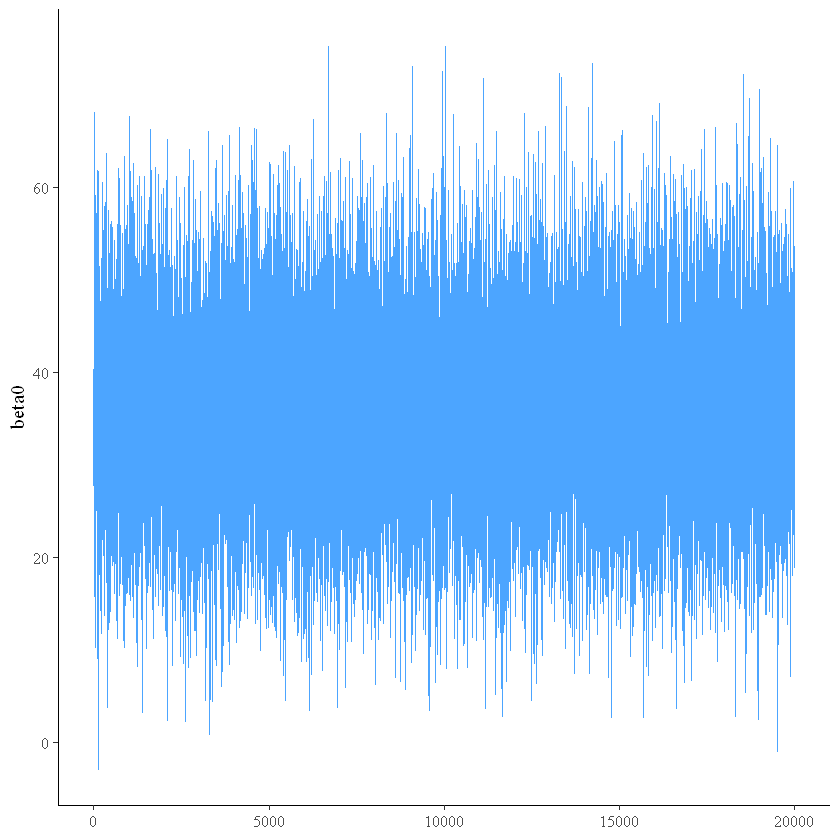

In [57]:
options(repr.plot.width=7,repr.plot.height=7)
mcmc_trace(Hitters.sample.02, pars=vars("beta0"))

In [58]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.02, pars=vars(param_range("beta", 1:6)))

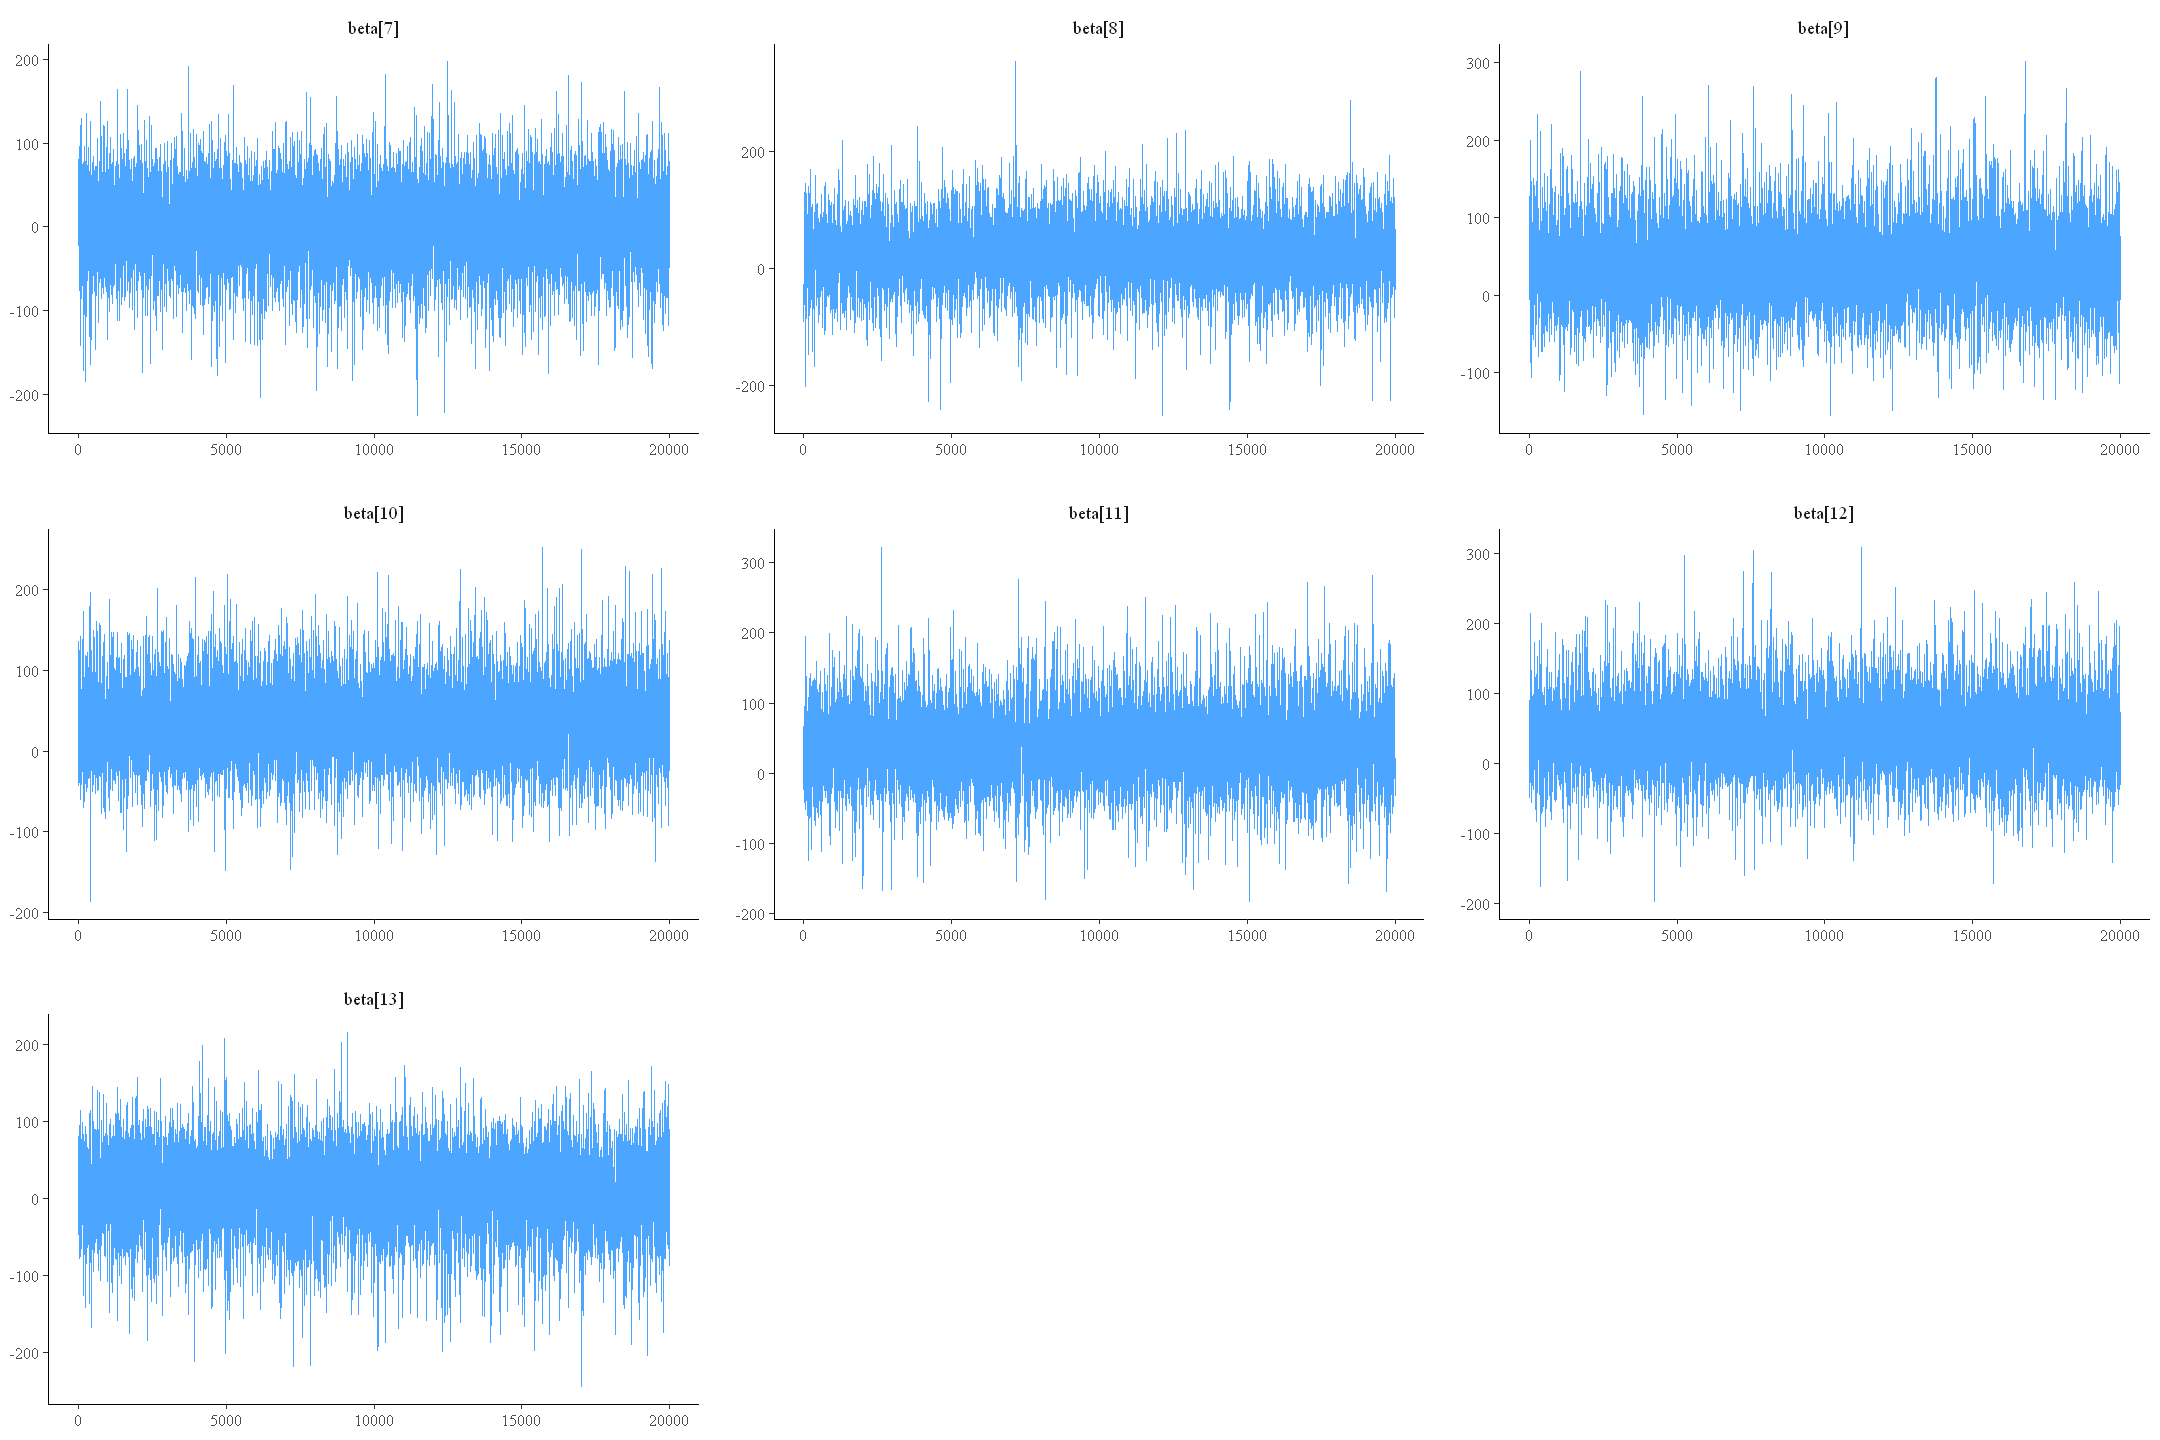

In [59]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.02, pars=vars(param_range("beta", 7:13)))

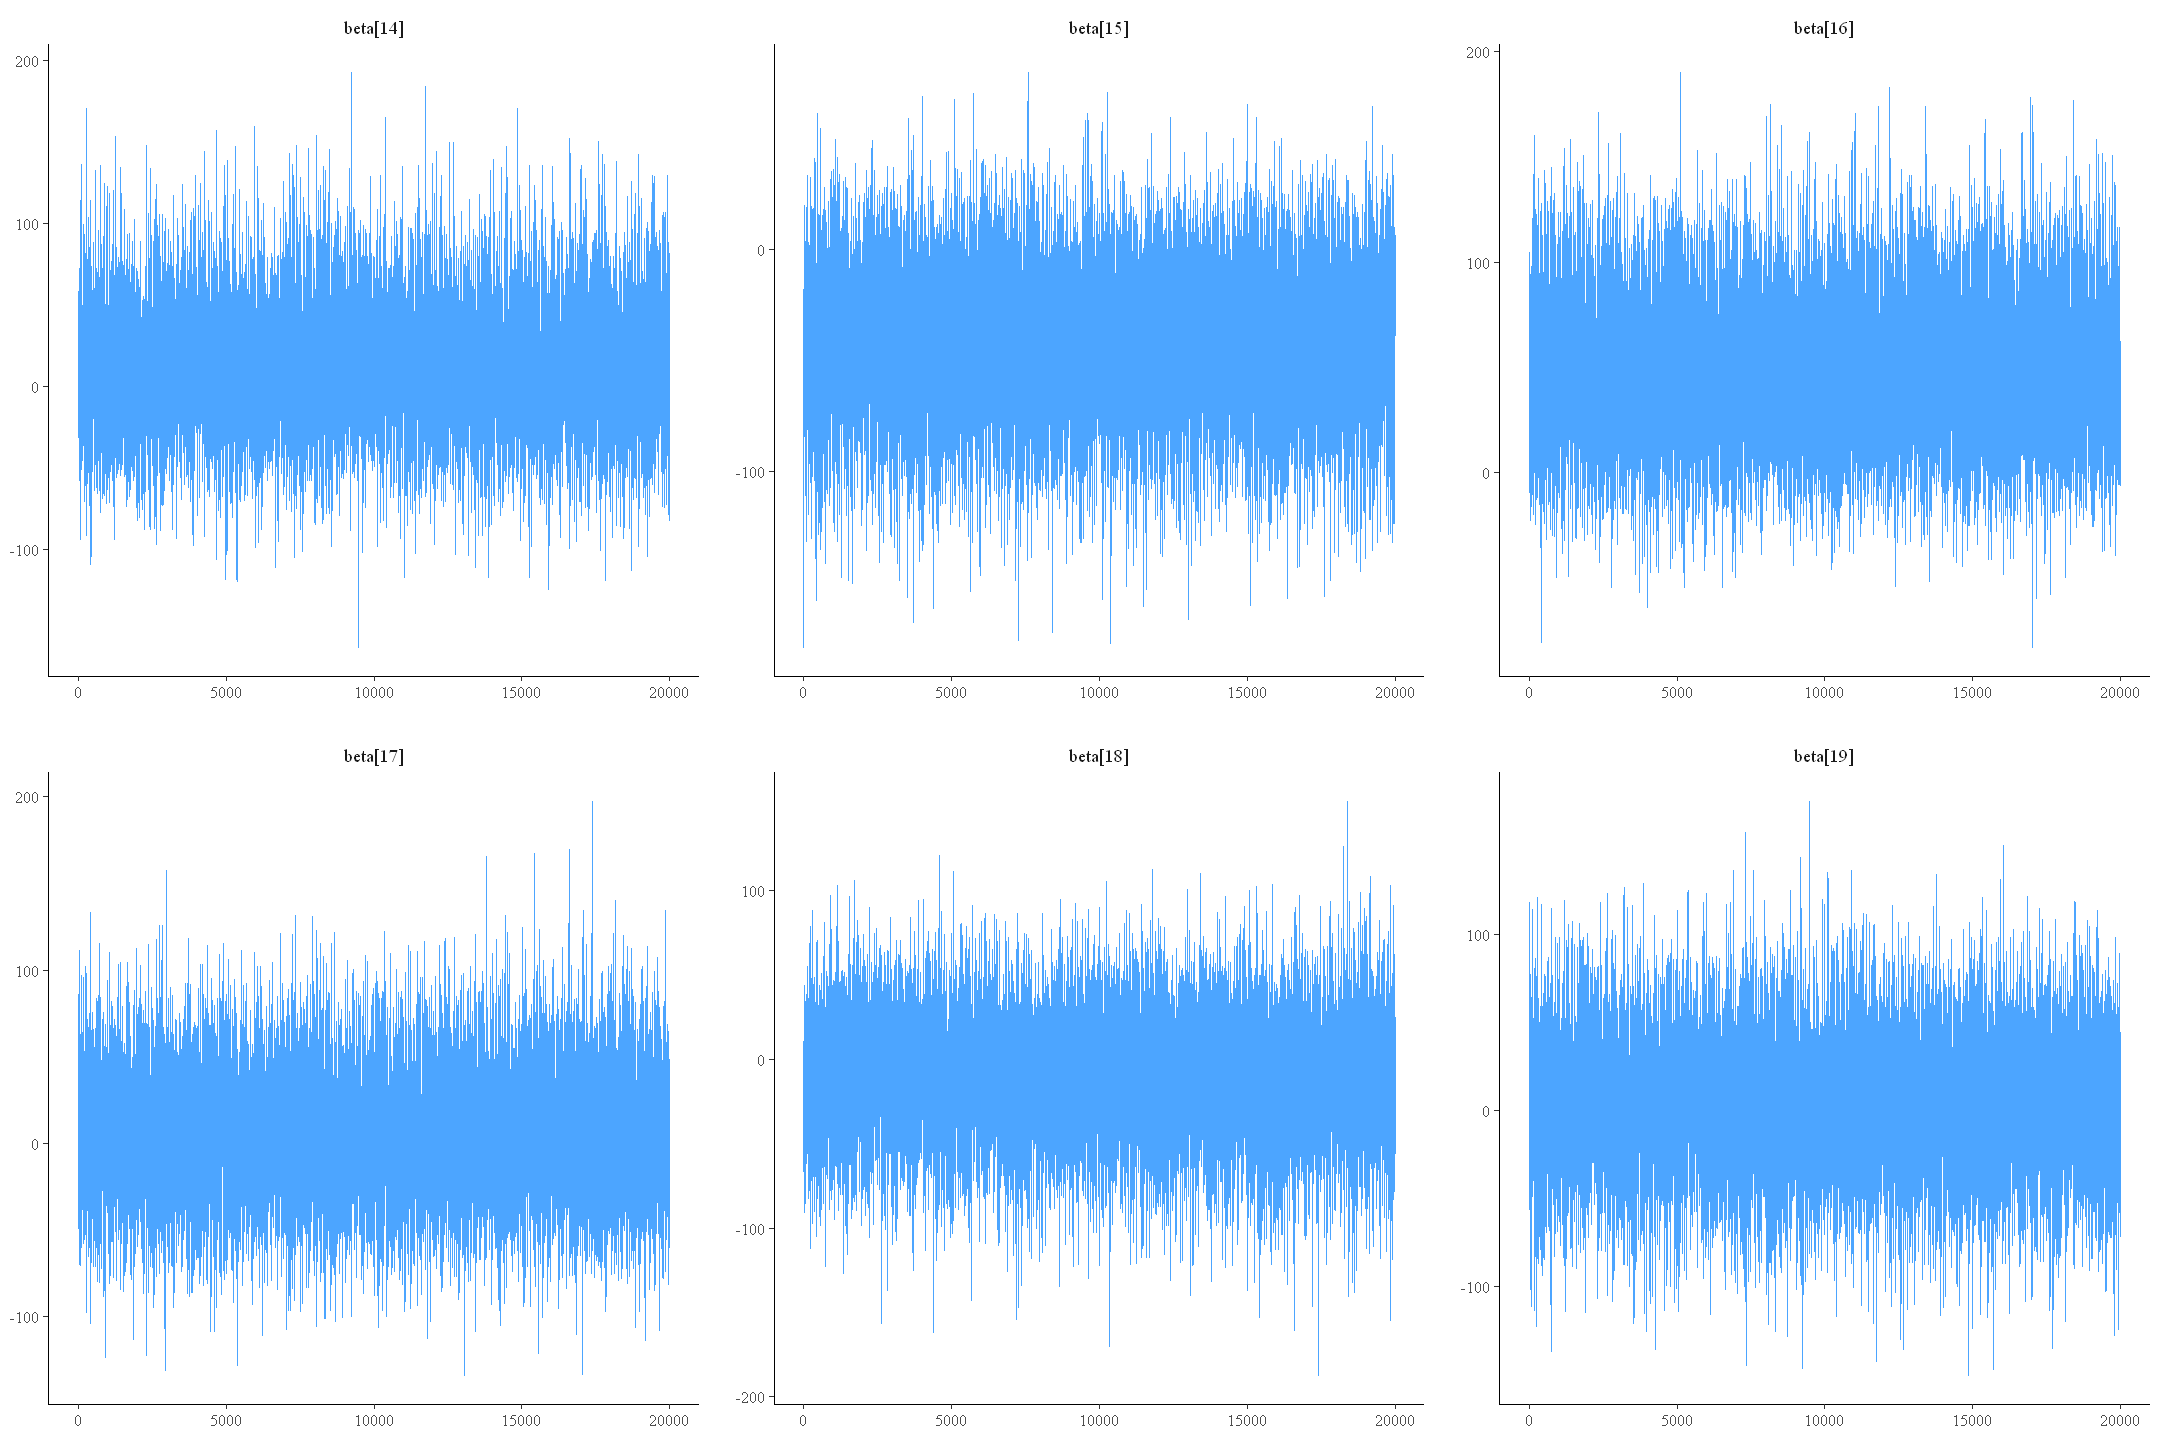

In [60]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.02, pars=vars(param_range("beta", 14:19)))

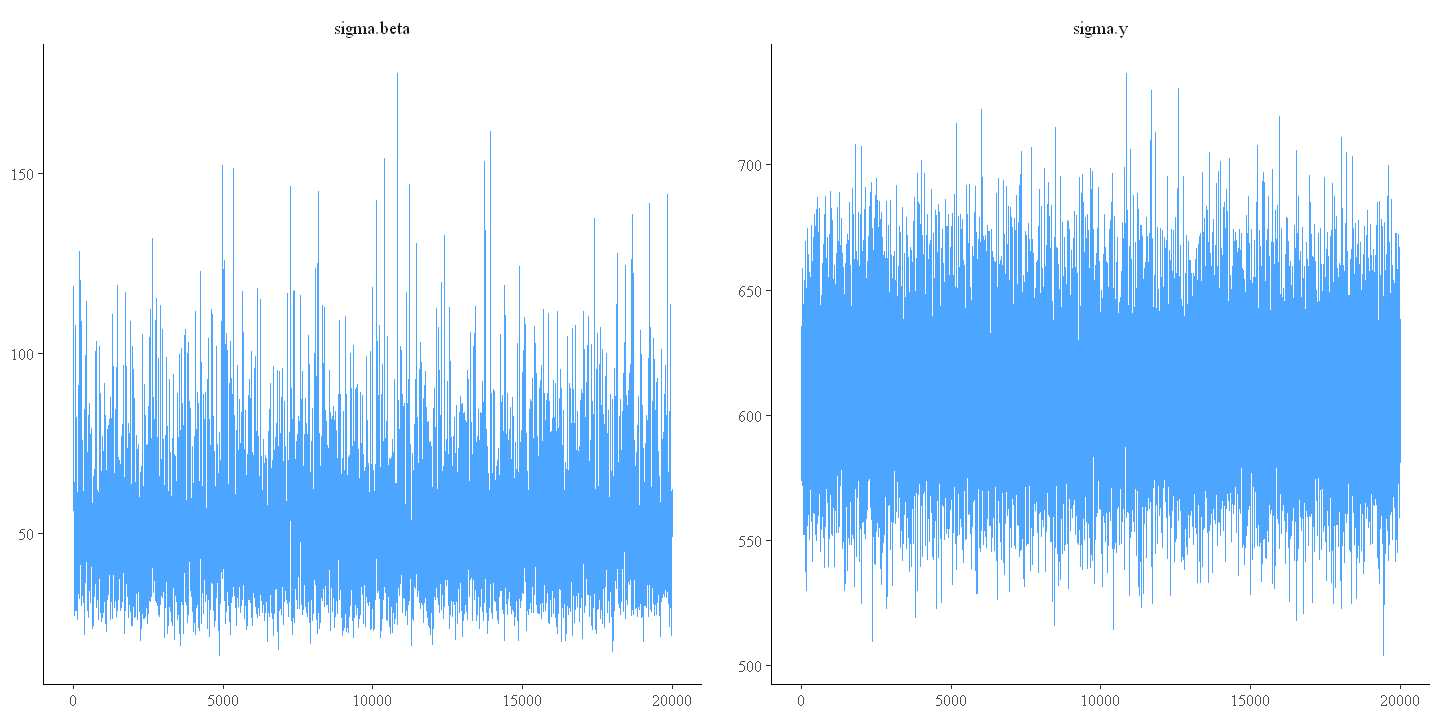

In [61]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_trace(Hitters.sample.02, pars=vars(contains("sigma")))

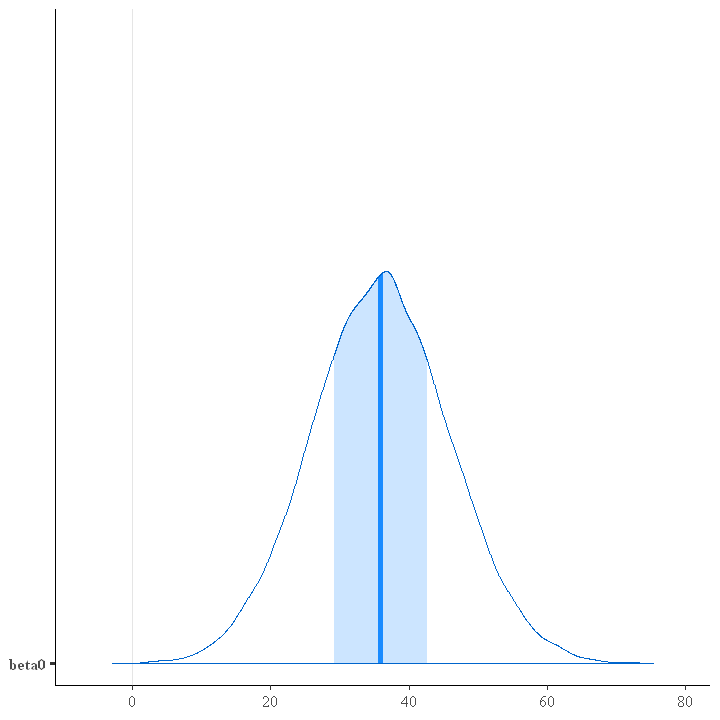

In [62]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_areas(Hitters.sample.02, pars=vars("beta0"))

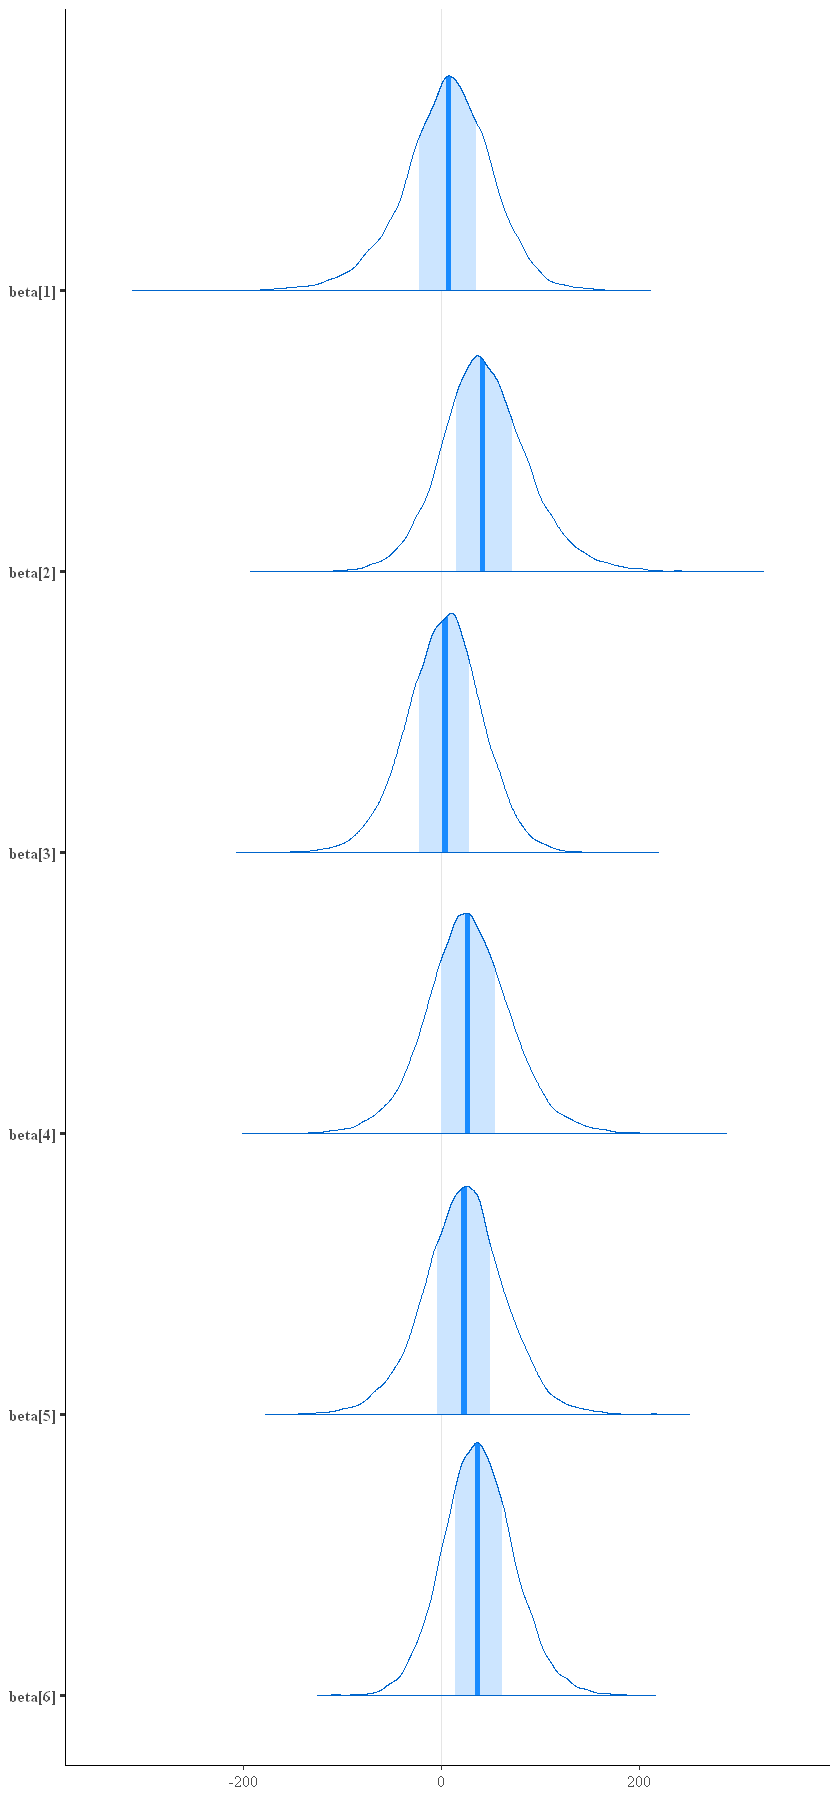

In [63]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.02, pars=vars(param_range("beta", 1:6)))

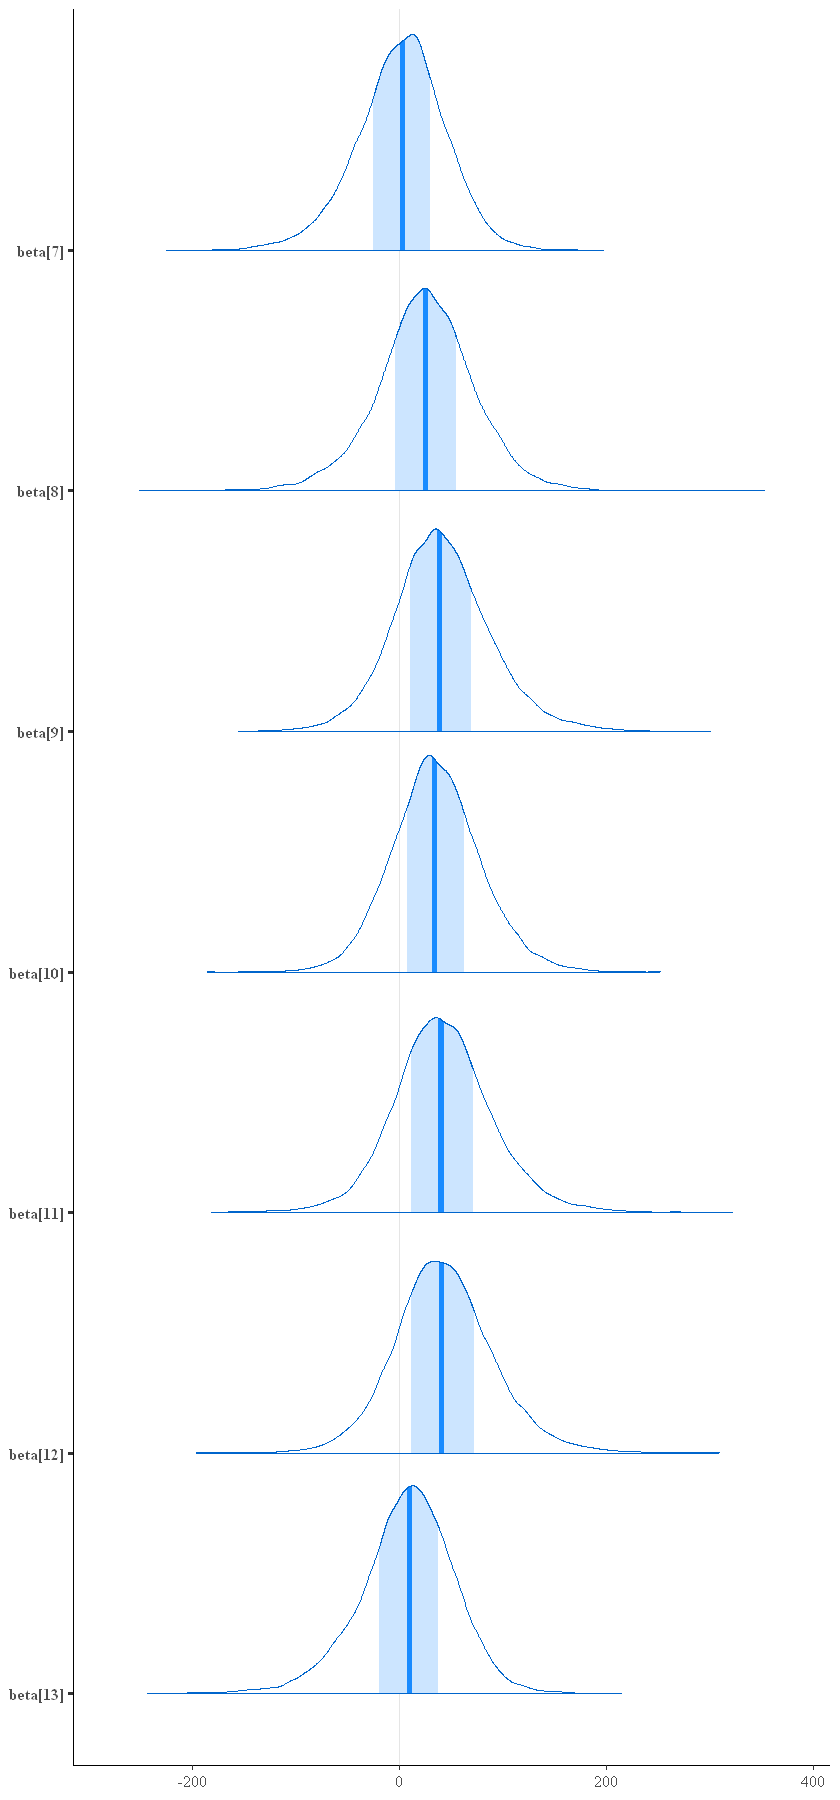

In [64]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.02, pars=vars(param_range("beta", 7:13)))

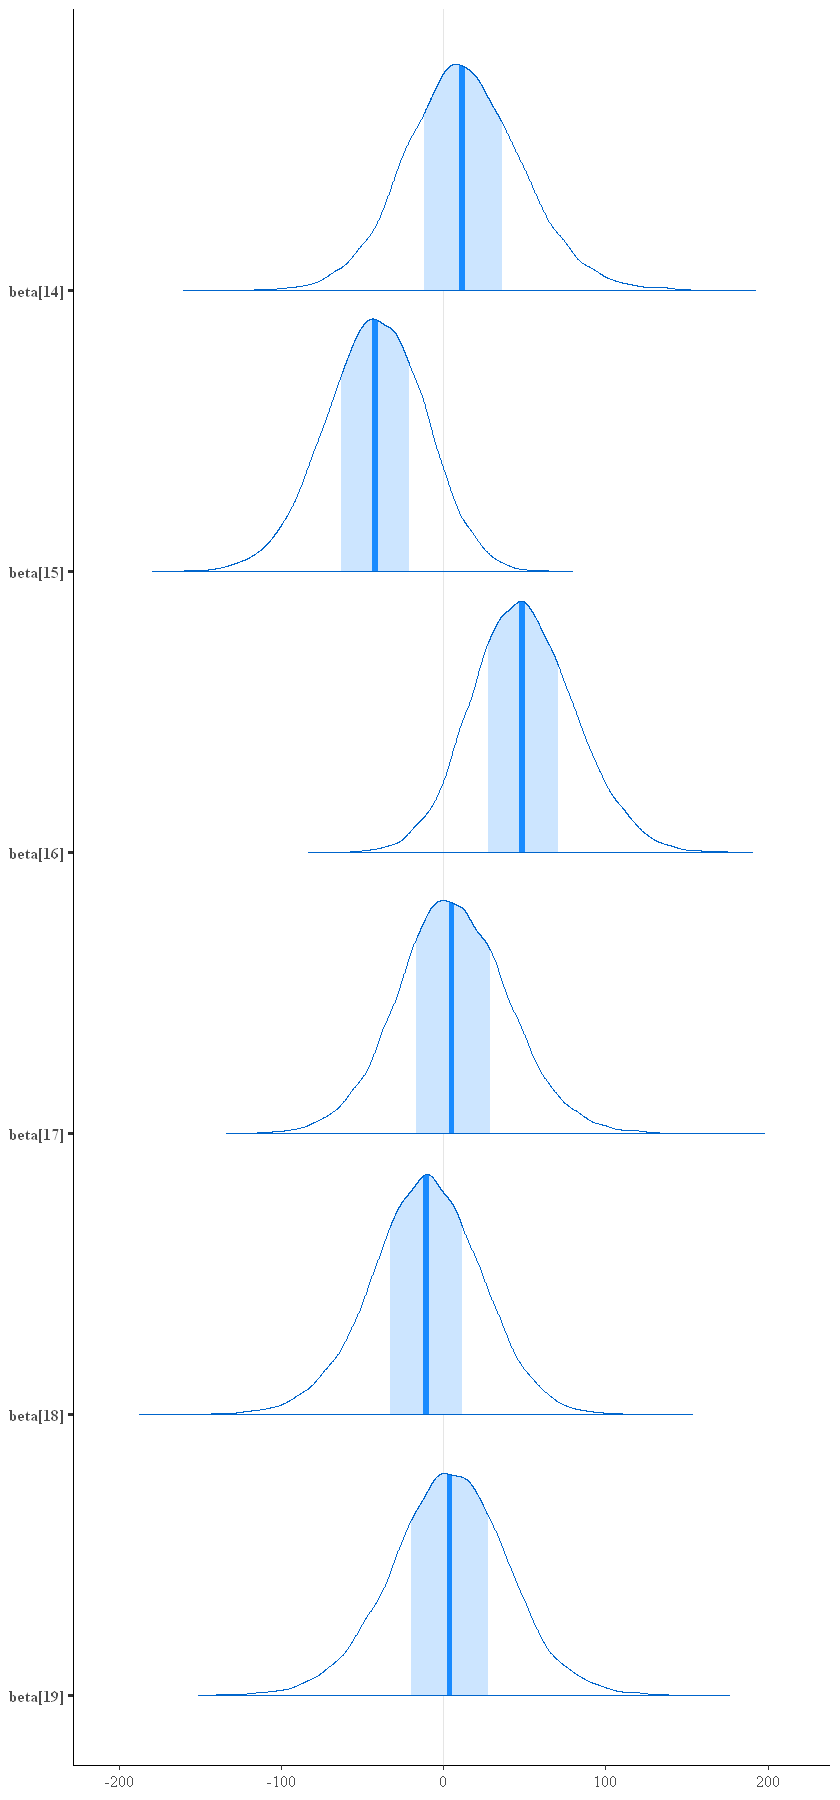

In [65]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.02, pars=vars(param_range("beta", 14:19)))

In [66]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_areas(Hitters.sample.02, pars=vars(contains("sigma")))

## 05. Other shrinkage priors
### Cauchy prior for the regression coefficients. 
### A common gamma prior for the regression coefficients' precision parameter.
### Gamma prior for the precision parameter

### Model:

$\beta_{0}$ is the intercept, $\beta=(\beta_{1},\dots,\beta_{p})$ is the vector of regression coefficients,   
$\tau_{y}=1/\sigma_{y}^{2}$ is the regression response precision parameter,   
$\tau_{\beta}=1/\sigma_{\beta}^{2}$ is the common precision parameter for the regression coefficients.

$$
    \begin{array}{lcl}
        y_{i}        &\sim    &\normaldist(\mu_{i},\sigma_{y}^{2}),\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \mu_{i}      &=       &\beta_{0}+\sum_{j=1}^{p}x_{ij}\cdot \beta_{j}
                              =\beta_{0}+x_{i\,\cdot\,}\cdot \beta,\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \beta_{0}    &\sim    &\normaldist(0,1.0E01),\\[0.2cm]
        \beta_{j}    &\sim    &\cauchydist(0,\sigma_{\beta}^{2}),\mskip45mu 1\leq j\leq p,\\[0.2cm]
        \tau_{\beta} &=       &1/\sigma_{\beta}^{2},\\[0.2cm]
        \tau_{\beta} &\sim    &\gammadist(0.01,0.01),\\[0.2cm]
        \tau_{y}     &=       &1/\sigma_{y}^{2},\\[0.2cm]
        \tau_{y}     &\sim    &\gammadist(0.01,0.01).
    \end{array}
$$

 <span class="MathJax_Preview" style="color: inherit; display: none;"> <span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" data-mathml="&lt;math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;&gt;&lt;msub&gt;&lt;mi&gt;&amp;#x03B2;&lt;/mi&gt;&lt;mi&gt;j&lt;/mi&gt;&lt;/msub&gt;&lt;mo&gt;&amp;#x223C;&lt;/mo&gt;&lt;mstyle displaystyle=&quot;false&quot; scriptlevel=&quot;0&quot;&gt;&lt;mtext&gt;Normal&lt;/mtext&gt;&lt;/mstyle&gt;&lt;mo stretchy=&quot;false&quot;&gt;(&lt;/mo&gt;&lt;mn&gt;0&lt;/mn&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;msubsup&gt;&lt;mi&gt;&amp;#x03C3;&lt;/mi&gt;&lt;mi&gt;b&lt;/mi&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;/msubsup&gt;&lt;mo stretchy=&quot;false&quot;&gt;)&lt;/mo&gt;&lt;/math&gt;" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-122" style="width: 10.009em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.335em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.248em, 1008.23em, 2.601em, -999.998em); top: -2.171em; left: 0em;"><span class="mrow" id="MathJax-Span-123"><span class="msubsup" id="MathJax-Span-124"><span style="display: inline-block; position: relative; width: 0.928em; height: 0px;"><span style="position: absolute; clip: rect(3.171em, 1000.57em, 4.275em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-125" style="font-family: MathJax_Math-italic;">β<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; top: -3.844em; left: 0.572em;"><span class="mi" id="MathJax-Span-126" style="font-size: 70.7%; font-family: MathJax_Math-italic;">j <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-127" style="font-family: MathJax_Main; padding-left: 0.287em;">∼ <span class="mstyle" id="MathJax-Span-128" style="padding-left: 0.287em;"><span class="mrow" id="MathJax-Span-129"><span class="mtext" id="MathJax-Span-130" style="font-family: MathJax_Main;">Normal   <span class="mo" id="MathJax-Span-131" style="font-family: MathJax_Main;">( <span class="mn" id="MathJax-Span-132" style="font-family: MathJax_Main;">0 <span class="mo" id="MathJax-Span-133" style="font-family: MathJax_Main;">, <span class="msubsup" id="MathJax-Span-134" style="padding-left: 0.18em;"><span style="display: inline-block; position: relative; width: 1.07em; height: 0px;"><span style="position: absolute; clip: rect(3.456em, 1000.57em, 4.097em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-135" style="font-family: MathJax_Math-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.421em, 1000.43em, 4.097em, -999.998em); top: -4.343em; left: 0.607em;"><span class="mn" id="MathJax-Span-136" style="font-size: 70.7%; font-family: MathJax_Main;">2 <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.385em, 1000.39em, 4.097em, -999.998em); top: -3.666em; left: 0.572em;"><span class="mi" id="MathJax-Span-137" style="font-size: 70.7%; font-family: MathJax_Math-italic;">b <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-138" style="font-family: MathJax_Main;">)  <span style="display: inline-block; width: 0px; height: 2.174em;">   <span style="display: inline-block; overflow: hidden; vertical-align: -0.425em; border-left: 0px solid; width: 0px; height: 1.455em;">  </nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>β</mi><mi>j</mi></msub><mo>∼</mo><mstyle displaystyle="false" scriptlevel="0"><mtext>Normal</mtext></mstyle><mo stretchy="false">(</mo><mn>0</mn><mo>,</mo><msubsup><mi>σ</mi><mi>b</mi><mn>2</mn></msubsup><mo stretchy="false">)</mo></math>  <script type="math/tex" id="MathJax-Element-10">\beta_j \sim \mbox{Normal}(0,\sigma_b^2)</script> where <span class="MathJax_Preview" style="color: inherit; display: none;"> <span class="MathJax" id="MathJax-Element-11-Frame" tabindex="0" data-mathml="&lt;math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;&gt;&lt;msubsup&gt;&lt;mi&gt;&amp;#x03C3;&lt;/mi&gt;&lt;mi&gt;b&lt;/mi&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;/msubsup&gt;&lt;mo&gt;&amp;#x223C;&lt;/mo&gt;&lt;mstyle displaystyle=&quot;false&quot; scriptlevel=&quot;0&quot;&gt;&lt;mtext&gt;InvGamma&lt;/mtext&gt;&lt;/mstyle&gt;&lt;mo stretchy=&quot;false&quot;&gt;(&lt;/mo&gt;&lt;mn&gt;0.01&lt;/mn&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;mn&gt;0.01&lt;/mn&gt;&lt;mo stretchy=&quot;false&quot;&gt;)&lt;/mo&gt;&lt;/math&gt;" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-139" style="width: 14.532em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.11em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.248em, 1012em, 2.601em, -999.998em); top: -2.171em; left: 0em;"><span class="mrow" id="MathJax-Span-140"><span class="msubsup" id="MathJax-Span-141"><span style="display: inline-block; position: relative; width: 1.07em; height: 0px;"><span style="position: absolute; clip: rect(3.456em, 1000.57em, 4.097em, -999.998em); top: -3.987em; left: 0em;"><span class="mi" id="MathJax-Span-142" style="font-family: MathJax_Math-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;">  <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.421em, 1000.43em, 4.097em, -999.998em); top: -4.343em; left: 0.607em;"><span class="mn" id="MathJax-Span-143" style="font-size: 70.7%; font-family: MathJax_Main;">2 <span style="display: inline-block; width: 0px; height: 3.99em;">  <span style="position: absolute; clip: rect(3.385em, 1000.39em, 4.097em, -999.998em); top: -3.666em; left: 0.572em;"><span class="mi" id="MathJax-Span-144" style="font-size: 70.7%; font-family: MathJax_Math-italic;">b <span style="display: inline-block; width: 0px; height: 3.99em;">    <span class="mo" id="MathJax-Span-145" style="font-family: MathJax_Main; padding-left: 0.287em;">∼ <span class="mstyle" id="MathJax-Span-146" style="padding-left: 0.287em;"><span class="mrow" id="MathJax-Span-147"><span class="mtext" id="MathJax-Span-148" style="font-family: MathJax_Main;">InvGamma   <span class="mo" id="MathJax-Span-149" style="font-family: MathJax_Main;">( <span class="mn" id="MathJax-Span-150" style="font-family: MathJax_Main;">0.01 <span class="mo" id="MathJax-Span-151" style="font-family: MathJax_Main;">, <span class="mn" id="MathJax-Span-152" style="font-family: MathJax_Main; padding-left: 0.18em;">0.01 <span class="mo" id="MathJax-Span-153" style="font-family: MathJax_Main;">)  <span style="display: inline-block; width: 0px; height: 2.174em;">   <span style="display: inline-block; overflow: hidden; vertical-align: -0.425em; border-left: 0px solid; width: 0px; height: 1.455em;">  </nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mi>σ</mi><mi>b</mi><mn>2</mn></msubsup><mo>∼</mo><mstyle displaystyle="false" scriptlevel="0"><mtext>InvGamma</mtext></mstyle><mo stretchy="false">(</mo><mn>0.01</mn><mo>,</mo><mn>0.01</mn><mo stretchy="false">)</mo></math>  <script type="math/tex" id="MathJax-Element-11">\sigma_b^2\sim\mbox{InvGamma}(0.01,0.01)</script>.</h2>

In [67]:
Hitters.model.String.03 <- "model{
# Likelihood
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], tau.y)
        mu[i] <- beta0 + inprod(x[i,],beta[]) 
        }
# A gaussian prior with a small precision for the intercept beta0 and the vector beta of regression coefficients
    beta0 ~ dnorm(0, 0.01)
    for(j in 1:p){
        beta[j] ~ dt(0,tau.beta,1)
        }

# Priors for the precision parameters 
    sigma.y <- 1.0/sqrt(tau.y)
    sigma.beta <- 1.0/sqrt(tau.beta)
    tau.y    ~ dgamma(0.01, 0.01)
    tau.beta ~ dgamma(0.01, 0.01)
}" 

In [68]:
Hitters.data.list.03<-list(y = y, n = n, p = p, x = x0)

## Compile the model in JAGS

In [69]:
Hitters.model.03<-jags.model(textConnection(Hitters.model.String.03),data=Hitters.data.list.03)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 263
   Unobserved stochastic nodes: 22
   Total graph size: 6081

Initializing model



In [70]:
update(Hitters.model.03, 4000, progress.bar = "gui")

In [71]:
Hitters.sample.03<-coda.samples(Hitters.model.03, variable.names = c("beta0", "beta", "sigma.y", "sigma.beta"), 
                 n.iter = 20000, progress.bar = "gui") 

In [72]:
summary(Hitters.sample.03)


Iterations = 5001:25000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 20000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean    SD Naive SE Time-series SE
beta[1]      5.577 41.63  0.29436        0.94201
beta[2]     50.110 65.10  0.46034        1.72304
beta[3]      2.932 26.44  0.18696        0.42881
beta[4]     25.467 48.12  0.34023        1.05449
beta[5]     16.821 40.49  0.28632        0.82792
beta[6]     27.519 38.99  0.27570        0.65401
beta[7]     -3.113 33.36  0.23589        0.68667
beta[8]     16.169 57.05  0.40341        1.79502
beta[9]     38.290 78.04  0.55185        3.43589
beta[10]    20.619 46.44  0.32837        1.21647
beta[11]    61.582 94.18  0.66595        4.03843
beta[12]    70.619 95.08  0.67230        3.93569
beta[13]     2.388 38.78  0.27425        0.92075
beta[14]     5.956 23.33  0.16494        0.33983
beta[15]   -24.509 30.66  0.21680        0.45196
beta[16]    35.49

In [73]:
#plot(Hitters.sample.03) 

In [74]:
options(repr.plot.width=7,repr.plot.height=7)
mcmc_trace(Hitters.sample.03, pars=vars("beta0"))

In [75]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.03, pars=vars(param_range("beta", 1:6)))

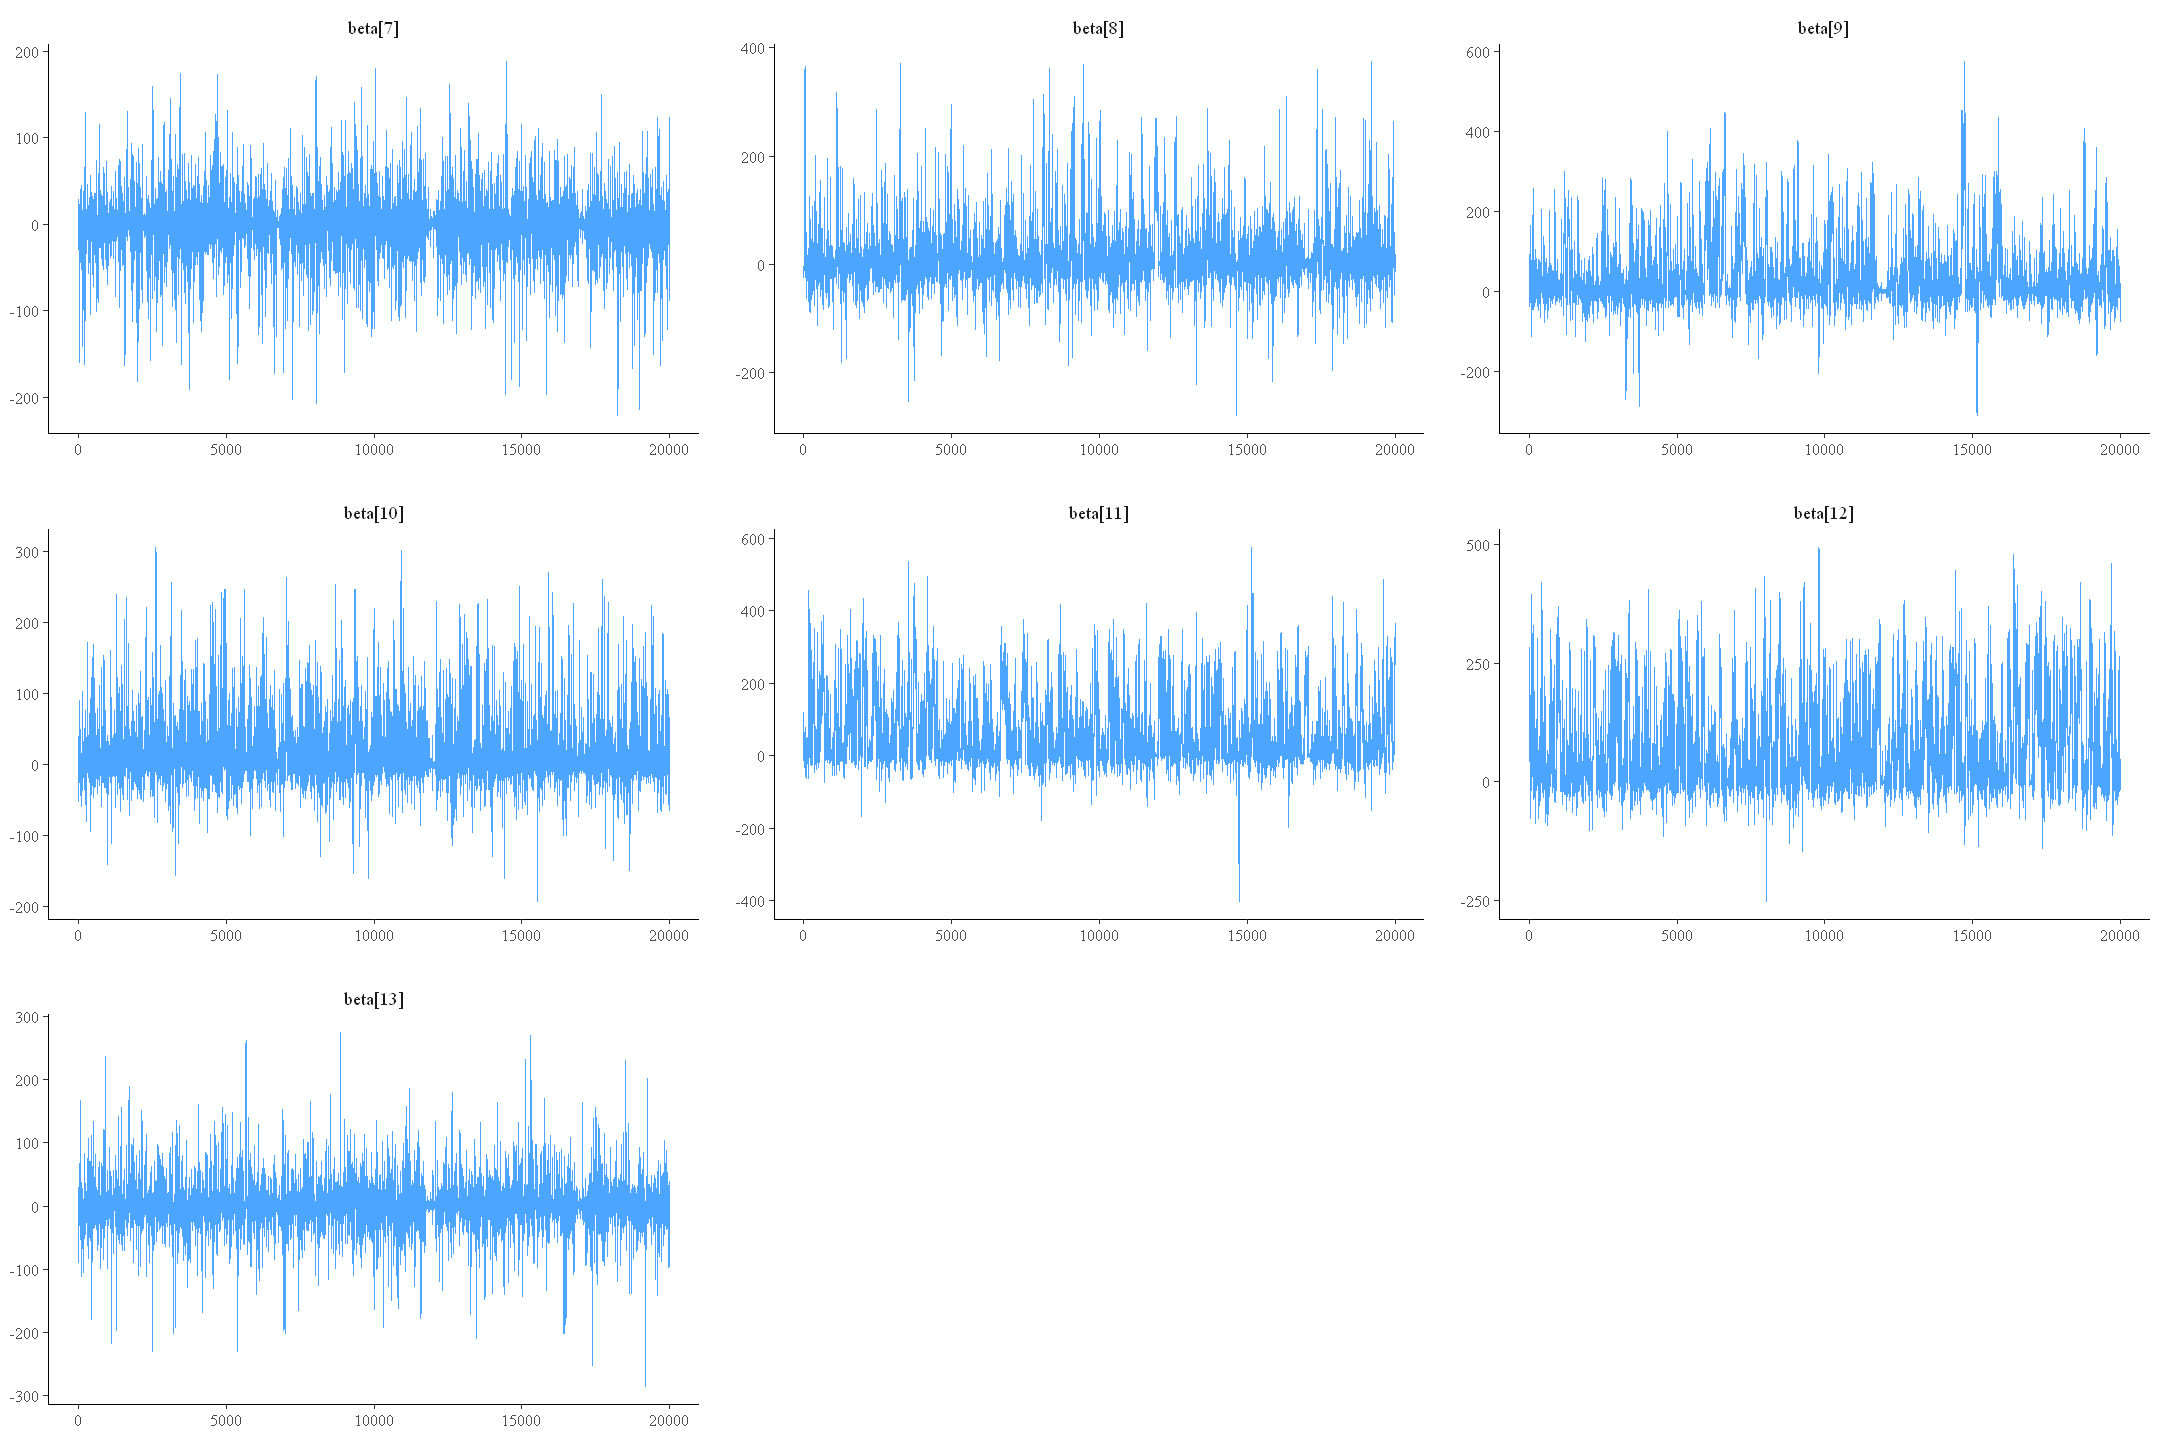

In [76]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.03, pars=vars(param_range("beta", 7:13)))

In [77]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.03, pars=vars(param_range("beta", 14:19)))

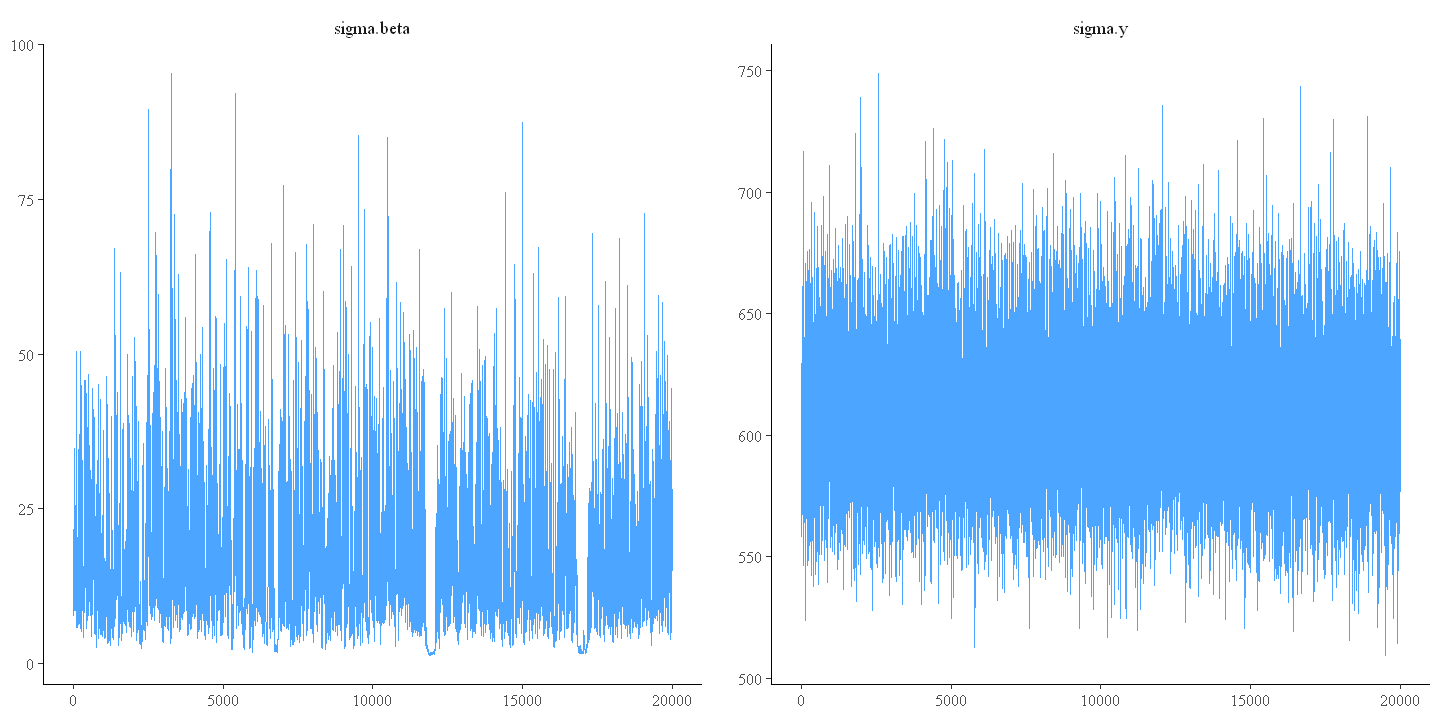

In [78]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_trace(Hitters.sample.03, pars=vars(contains("sigma")))

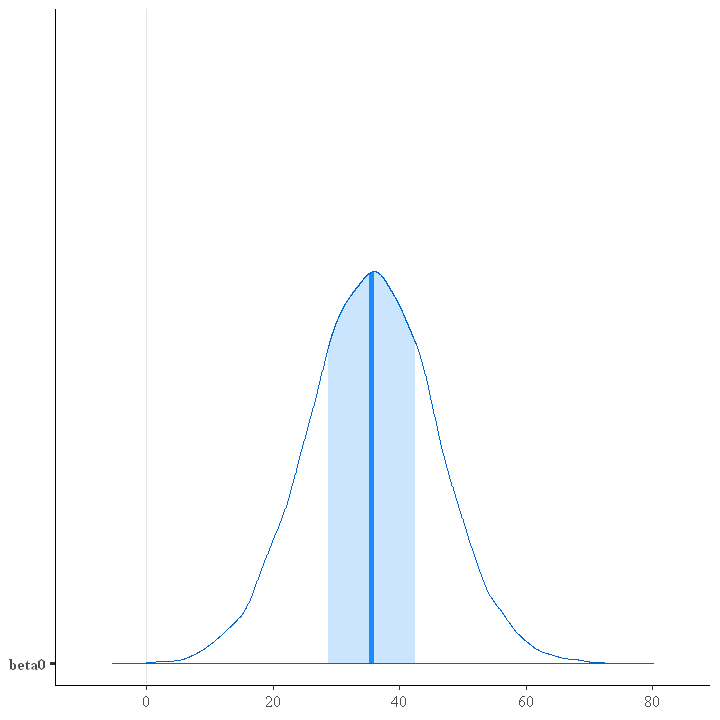

In [79]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_areas(Hitters.sample.03, pars=vars("beta0"))

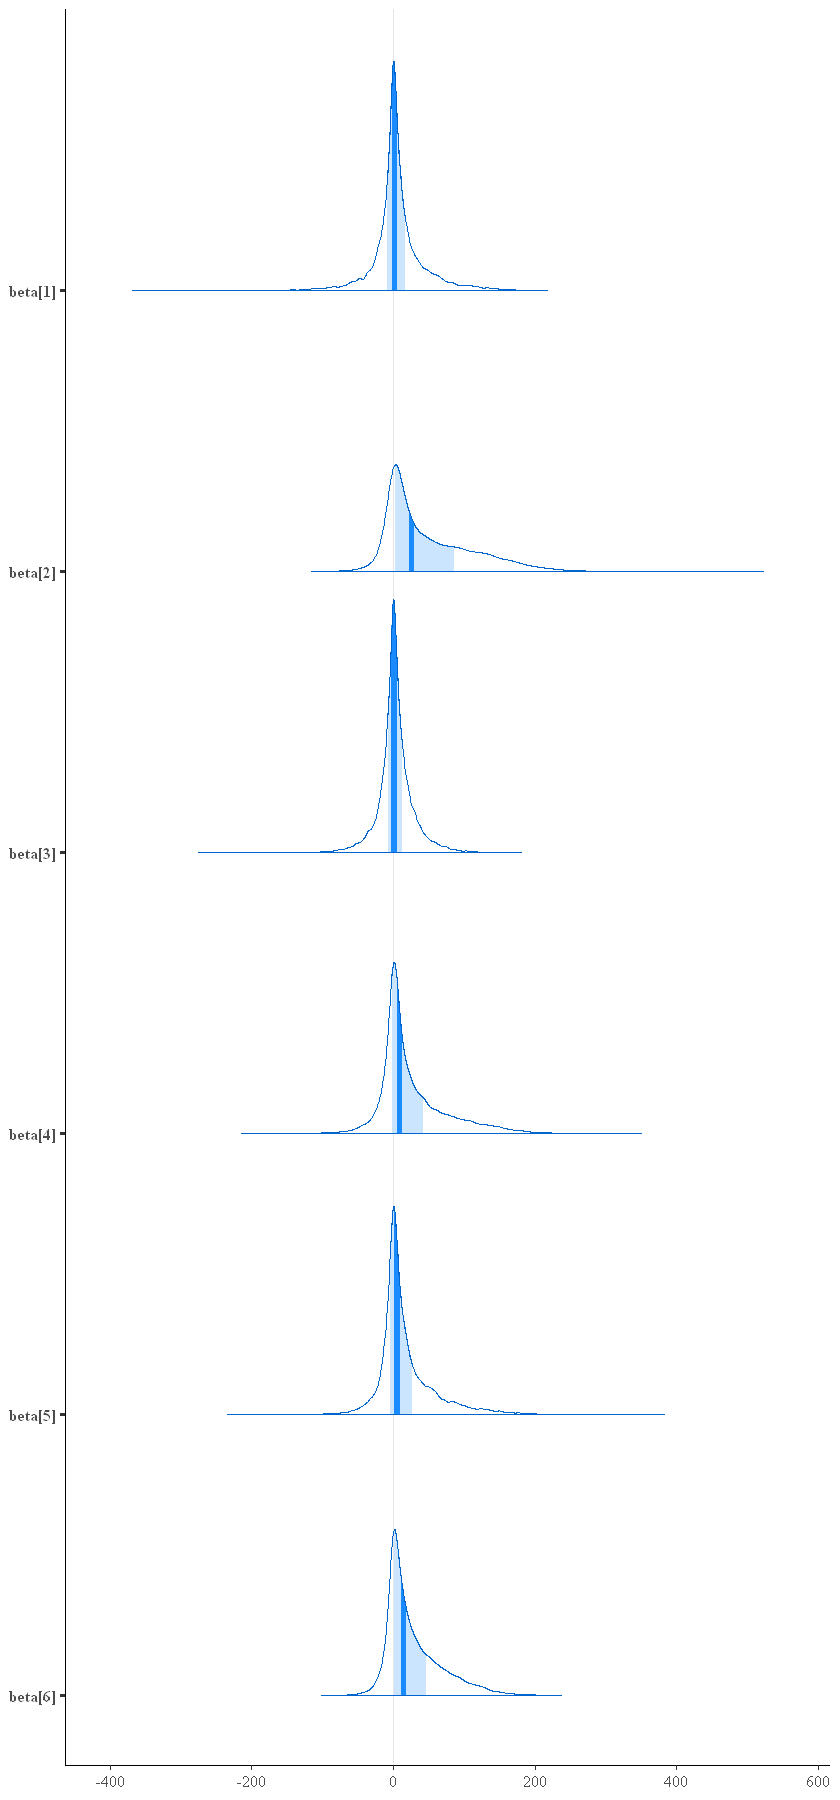

In [80]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.03, pars=vars(param_range("beta", 1:6)))

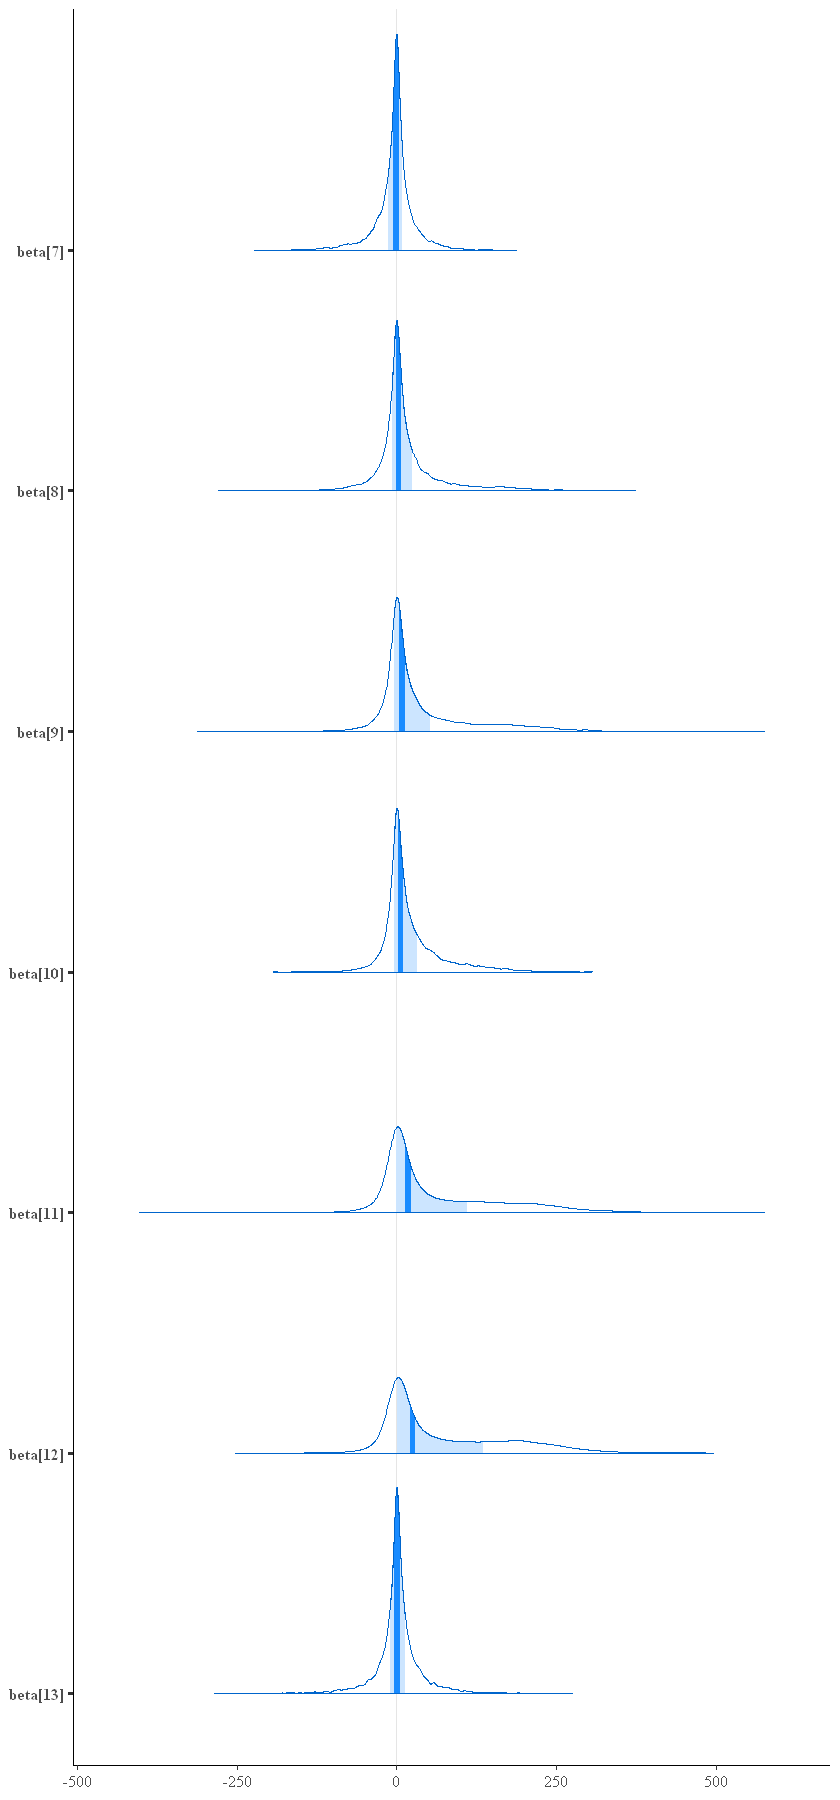

In [81]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.03, pars=vars(param_range("beta", 7:13)))

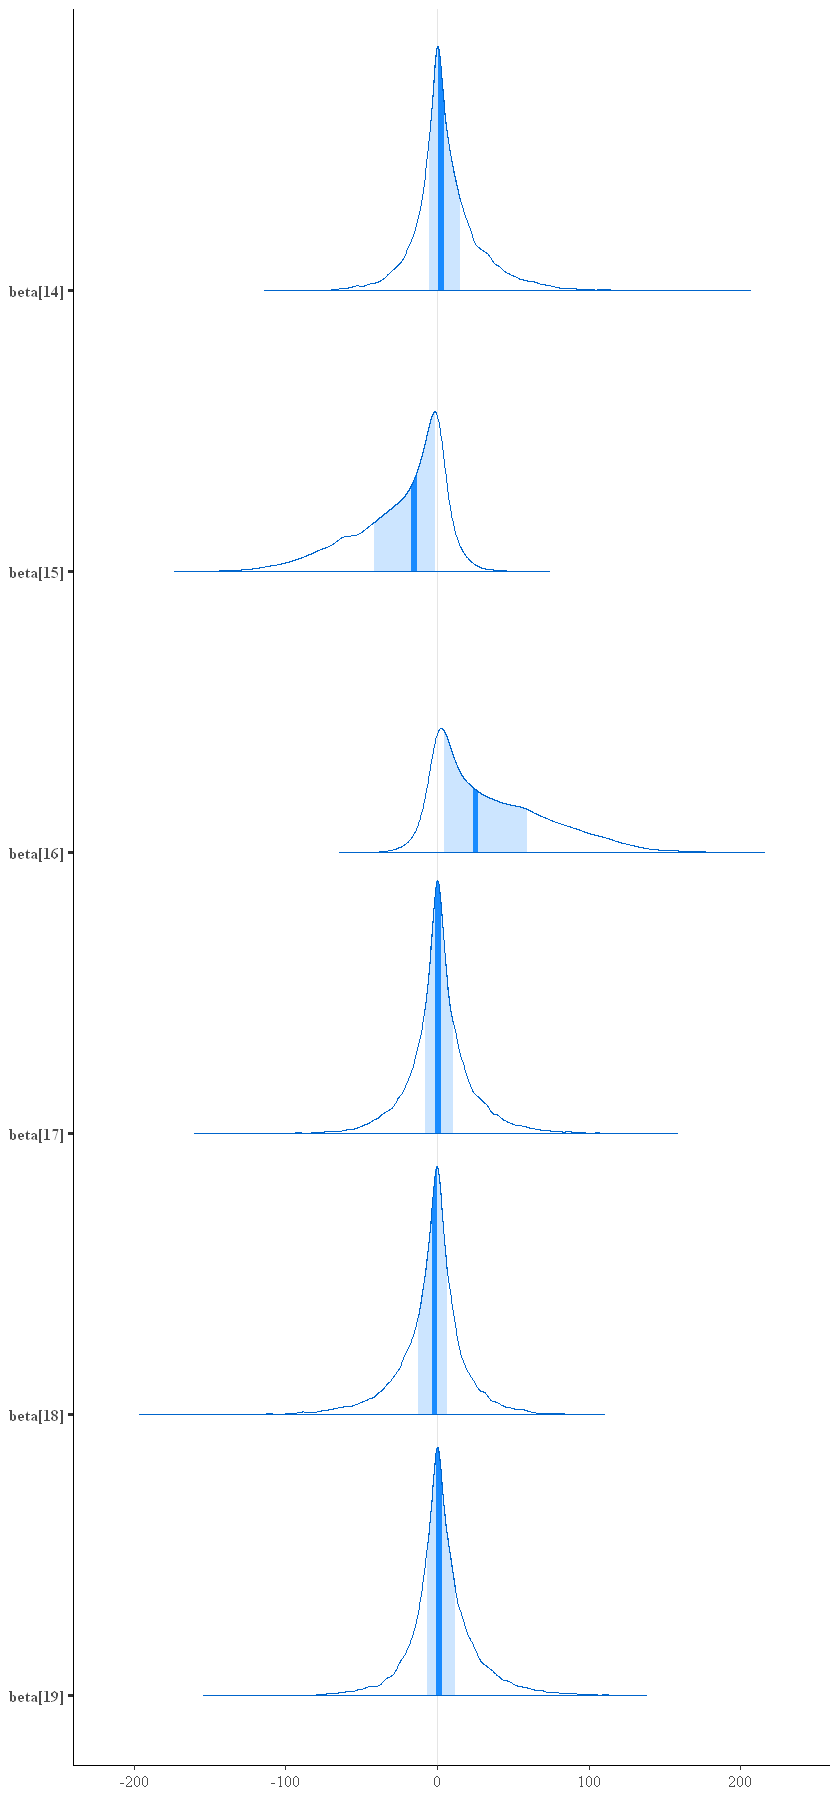

In [82]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.03, pars=vars(param_range("beta", 14:19)))

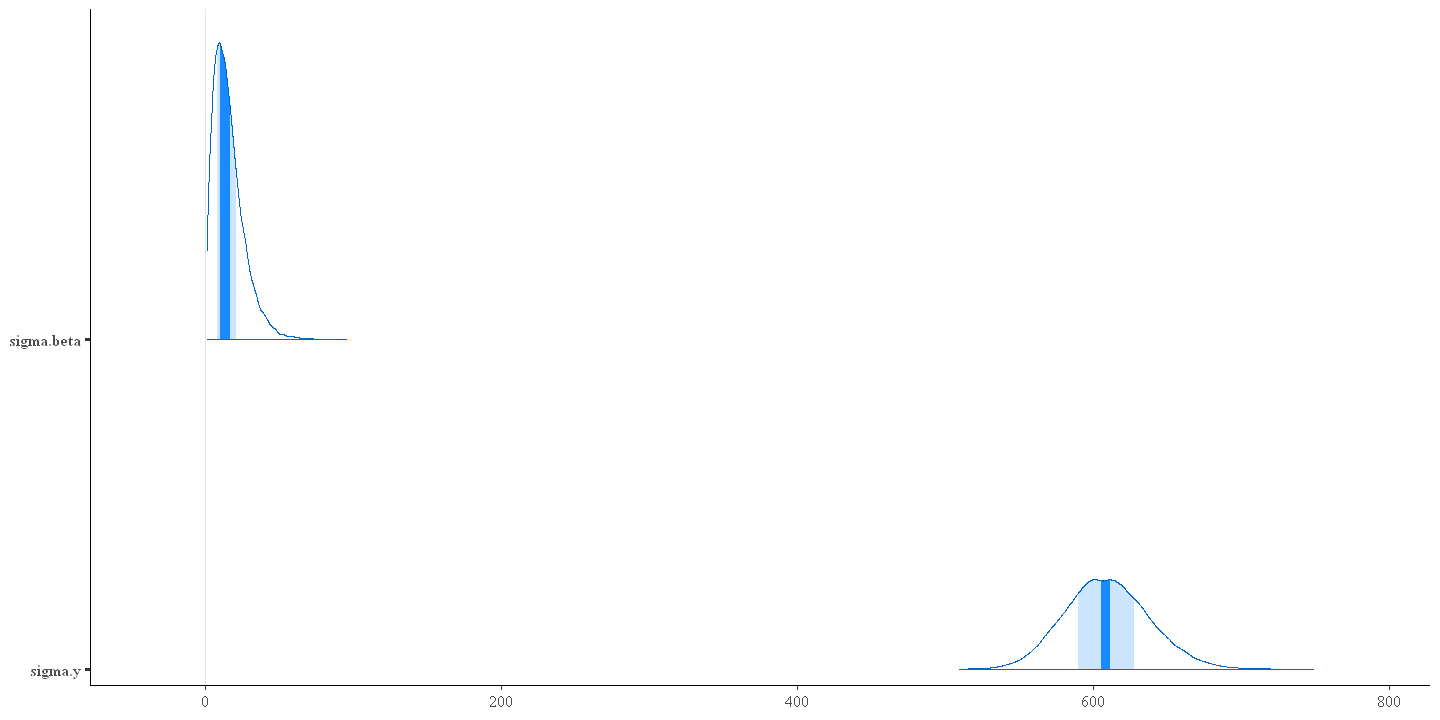

In [83]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_areas(Hitters.sample.03, pars=vars(contains("sigma")))

## 06. Bayesian Lasso
### Laplace (double exponential) prior for the regression coefficients. 
### A common gamma prior for the regression coefficients' precision parameter.
### Gamma prior for the precision parameter

### Model:

$\beta_{0}$ is the intercept, $\beta=(\beta_{1},\dots,\beta_{p})$ is the vector of regression coefficients,   
$\tau_{y}=1/\sigma_{y}^{2}$ is the regression response precision parameter,   
$\tau_{\beta}=1/\sigma_{\beta}^{2}$ is the common precision parameter for the regression coefficients.

$$
    \begin{array}{lcl}
        y_{i}        &\sim    &\normaldist(\mu_{i},\sigma_{y}^{2}),\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \mu_{i}      &=       &\beta_{0}+\sum_{j=1}^{p}x_{ij}\cdot \beta_{j}
                              =\beta_{0}+x_{i\,\cdot\,}\cdot \beta,\mskip45mu 1\leq i\leq n,\\[0.2cm]
        \beta_{0}    &\sim    &\normaldist(0,1.0E01),\\[0.2cm]
        \beta_{j}    &\sim    &\dexpdist (0,\sigma_{\beta}^{2}),\mskip45mu 1\leq j\leq p,\\[0.2cm]
        \tau_{\beta} &=       &1/\sigma_{\beta}^{2},\\[0.2cm]
        \tau_{\beta} &\sim    &\gammadist(0.01,0.01),\\[0.2cm]
        \tau_{y}     &=       &1/\sigma_{y}^{2},\\[0.2cm]
        \tau_{y}     &\sim    &\gammadist(0.01,0.01).
    \end{array}
$$

In [84]:
Hitters.model.String.04 <- "model{
# Likelihood
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], tau.y)
        mu[i] <- beta0 + inprod(x[i,],beta[]) 
        }
# A gaussian prior with a small precision for the intercept beta0 and the vector beta of regression coefficients
    beta0 ~ dnorm(0, 0.01)
    for(j in 1:p){
        beta[j] ~ ddexp(0,tau.beta)
        }

# Priors for the precision parameters 
    sigma.y <- 1.0/sqrt(tau.y)
    sigma.beta <- 1.0/sqrt(tau.beta)
    tau.y    ~ dgamma(0.01, 0.01)
    tau.beta ~ dgamma(0.01, 0.01)
}" 

In [85]:
Hitters.data.list.04<-list(y = y, n = n, p = p, x = x0)

## Compile the model in JAGS

In [86]:
Hitters.model.04<-jags.model(textConnection(Hitters.model.String.04),data=Hitters.data.list.04)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 263
   Unobserved stochastic nodes: 22
   Total graph size: 6081

Initializing model



In [87]:
update(Hitters.model.04, 4000, progress.bar = "gui")

In [88]:
Hitters.sample.04<-coda.samples(Hitters.model.04, variable.names = c("beta0", "beta", "sigma.y", "sigma.beta"), 
                 n.iter = 20000, progress.bar = "gui") 

In [89]:
summary(Hitters.sample.04)


Iterations = 5001:25000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 20000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean     SD Naive SE Time-series SE
beta[1]      3.0433 49.042 0.346777        1.17426
beta[2]     47.3856 55.370 0.391528        1.23260
beta[3]      4.3130 35.673 0.252248        0.49103
beta[4]     27.0707 44.821 0.316934        0.71930
beta[5]     19.5589 42.835 0.302890        0.65667
beta[6]     35.3651 39.523 0.279468        0.60677
beta[7]     -0.6375 41.738 0.295129        0.71251
beta[8]     21.3027 54.832 0.387720        1.11233
beta[9]     44.1628 63.909 0.451907        1.42634
beta[10]    32.0441 47.207 0.333804        0.81757
beta[11]    45.7571 63.199 0.446883        1.42467
beta[12]    50.4099 63.961 0.452274        1.48885
beta[13]     5.4294 46.014 0.325365        0.83197
beta[14]     9.9705 32.757 0.231625        0.47500
beta[15]   -38.3272 32.949 0.232987 

In [90]:
#plot(Hitters.sample.04) 

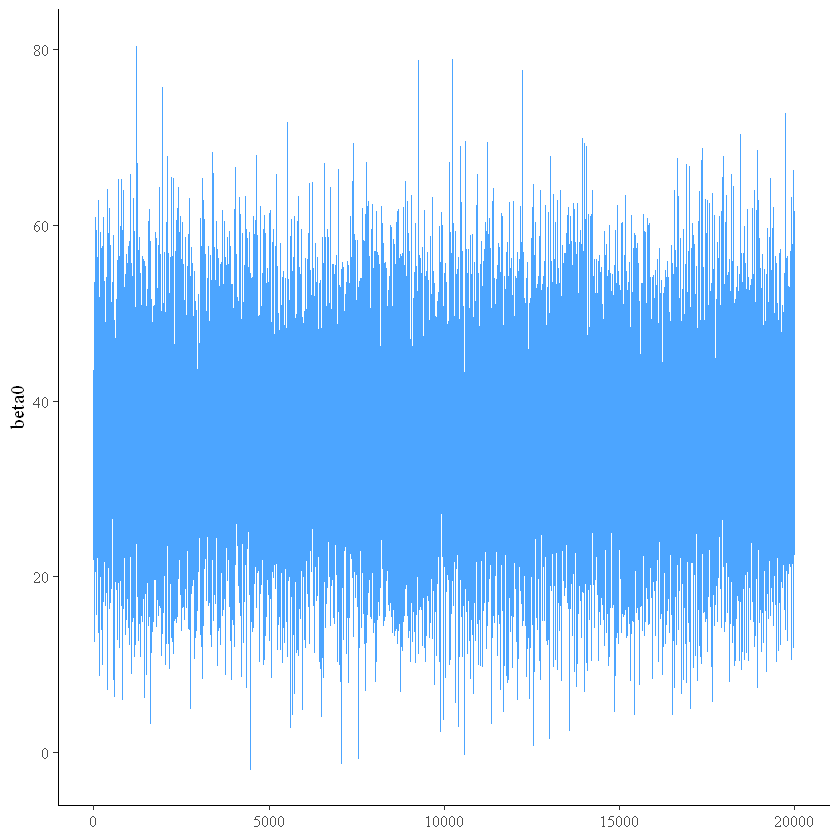

In [91]:
options(repr.plot.width=7,repr.plot.height=7)
mcmc_trace(Hitters.sample.04, pars=vars("beta0"))

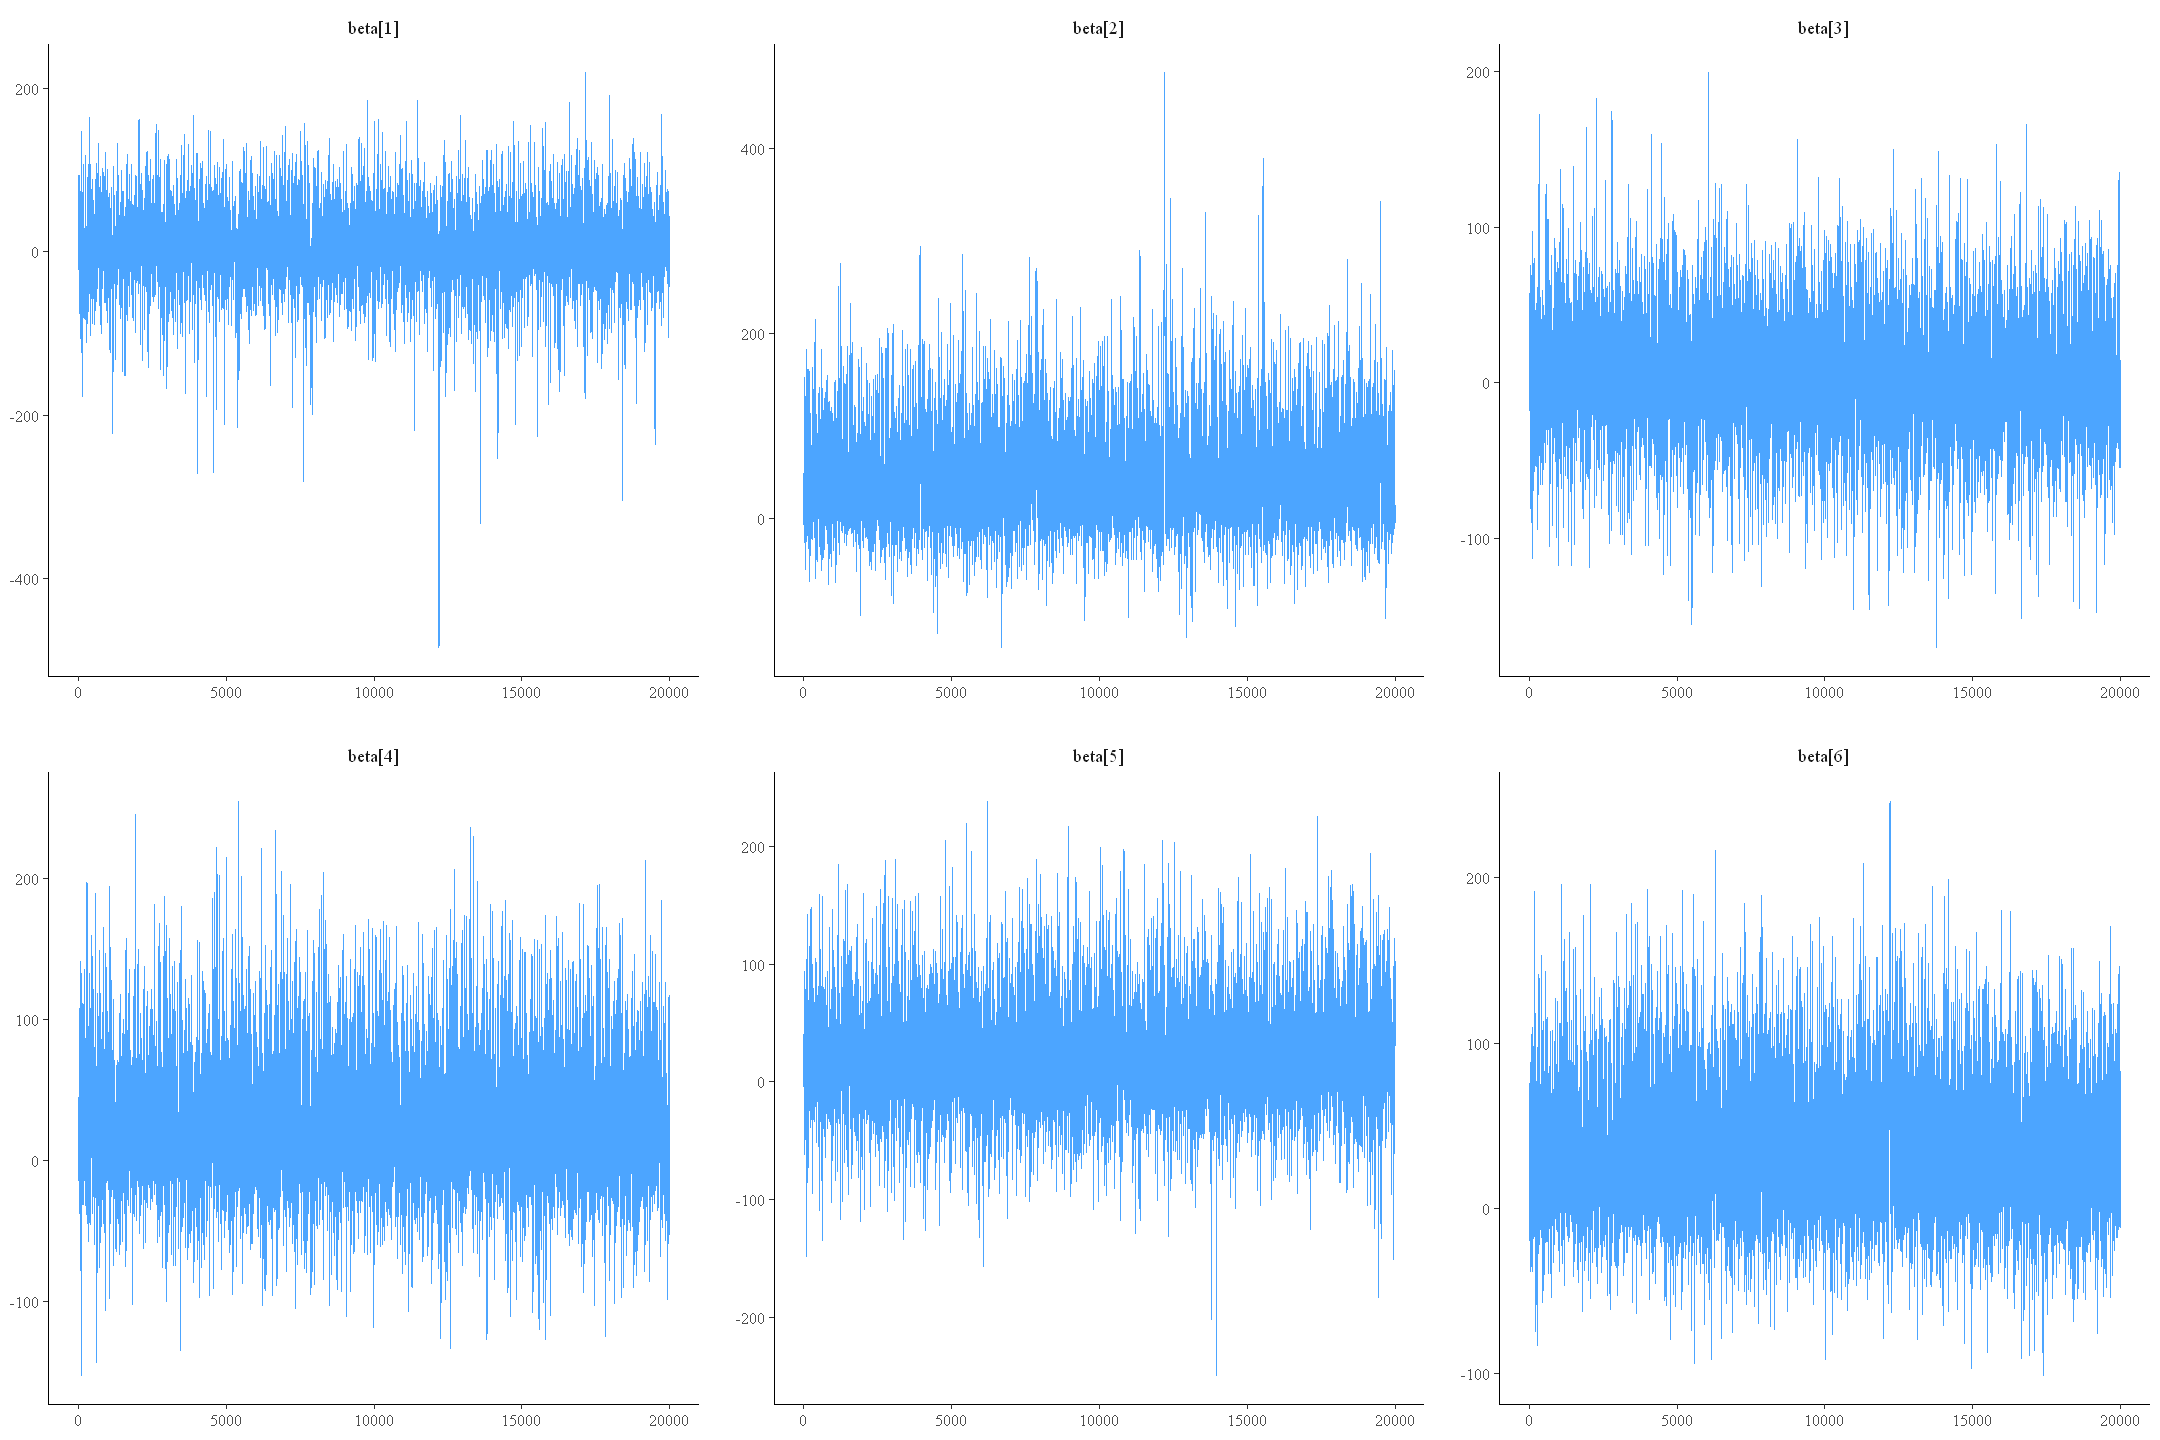

In [92]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.04, pars=vars(param_range("beta", 1:6)))

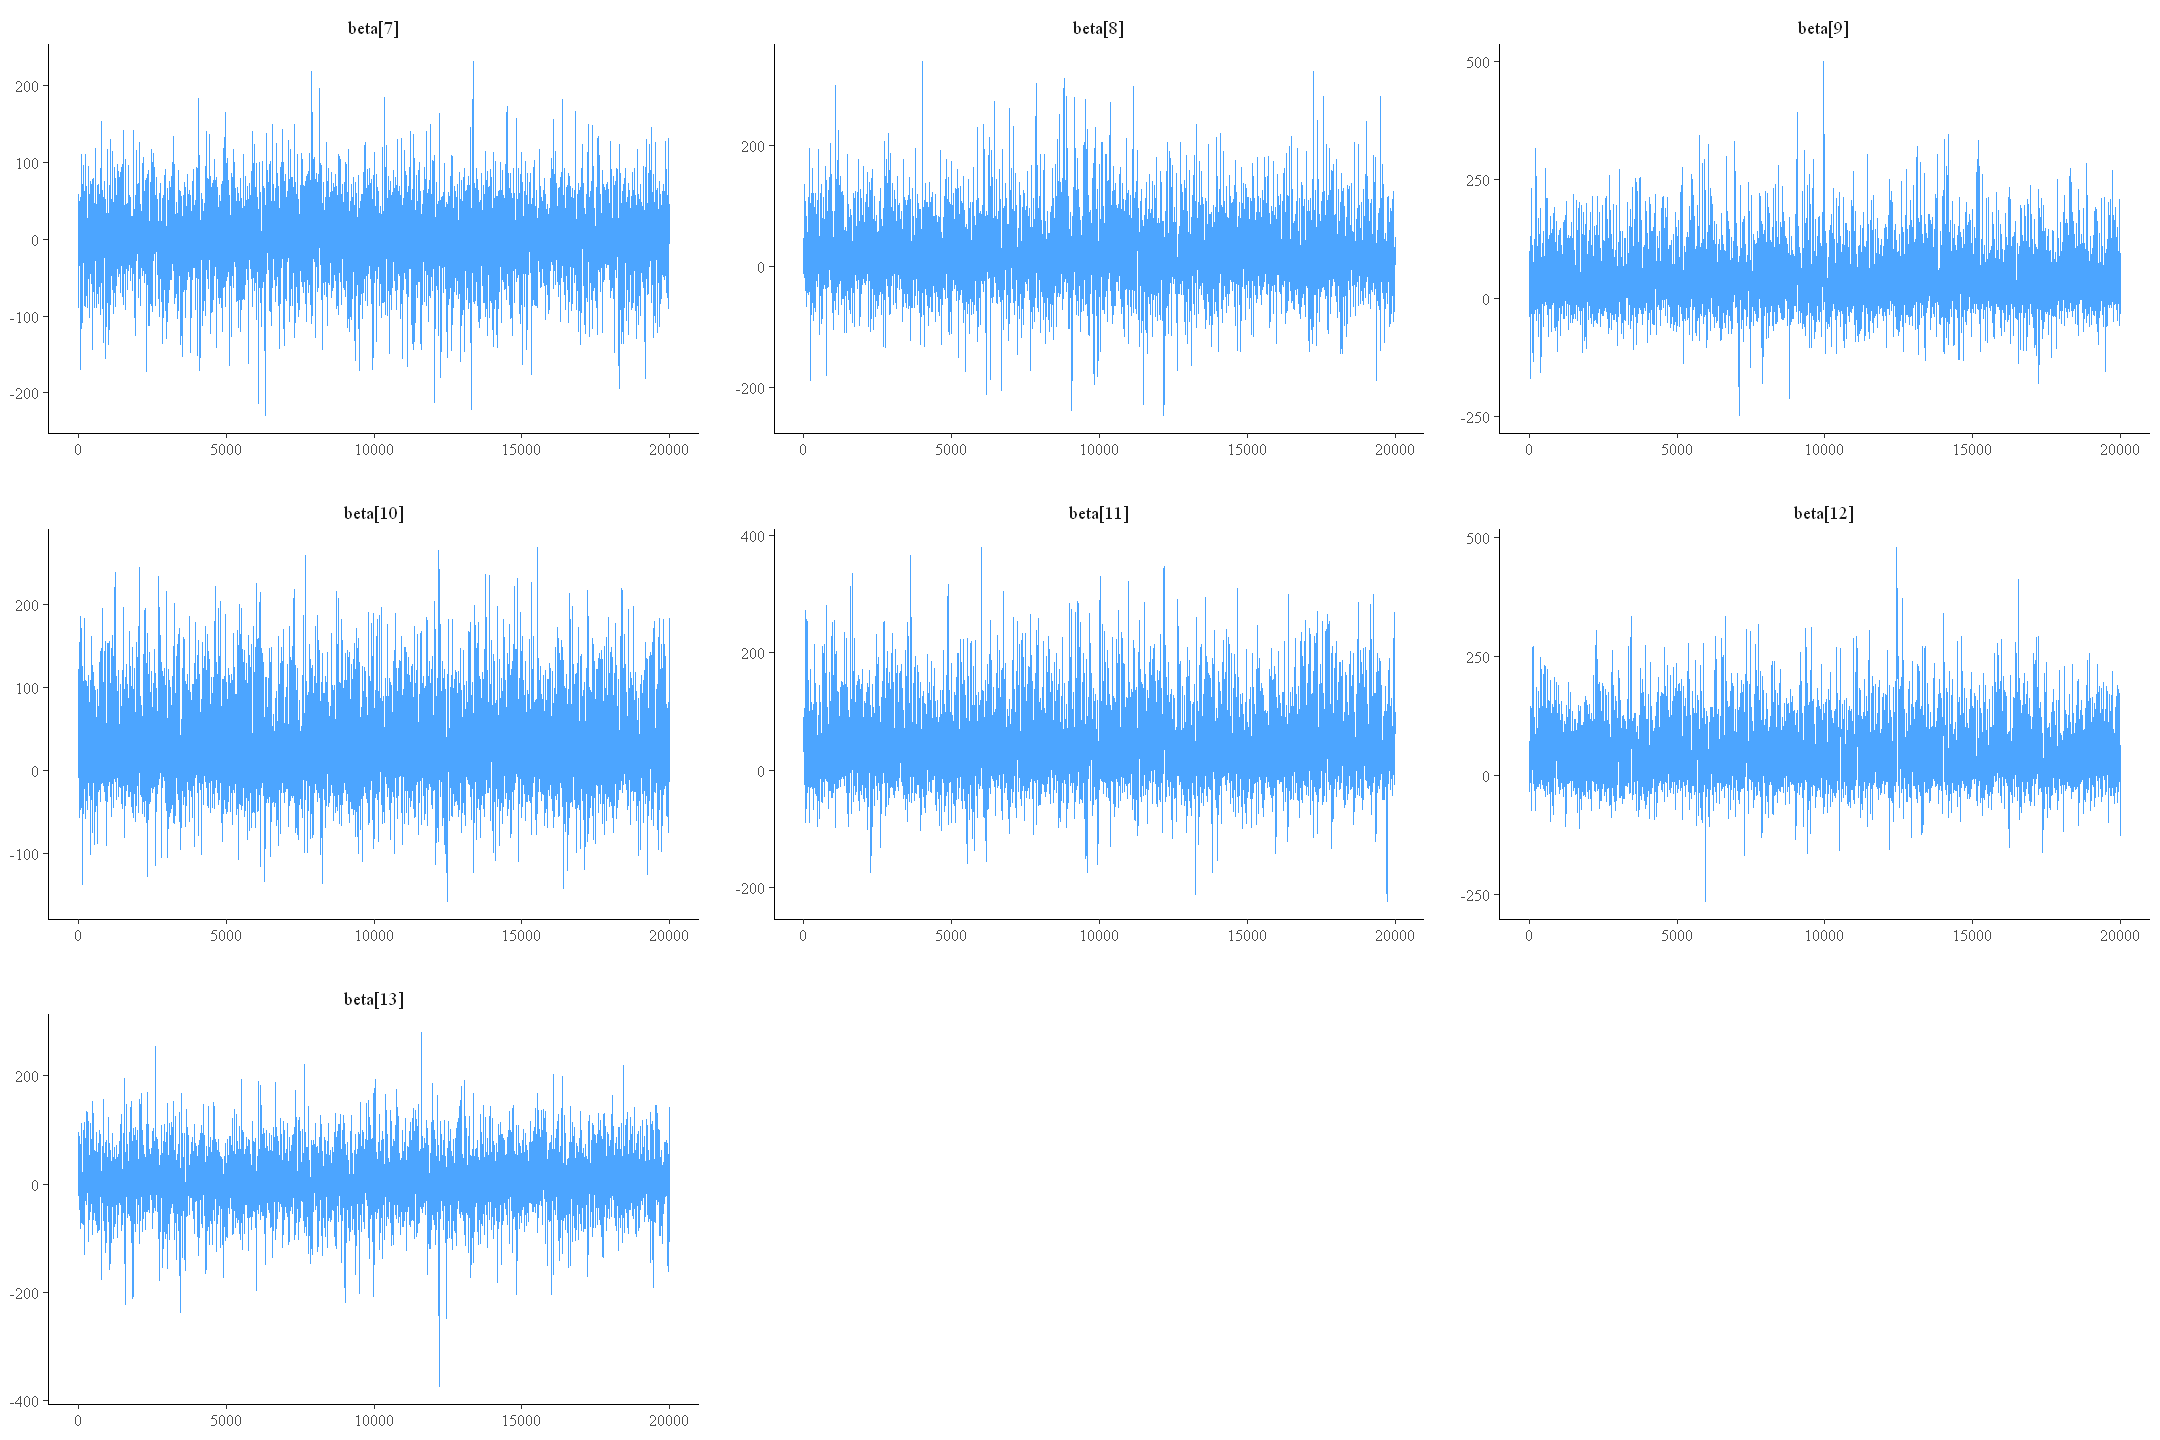

In [93]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.04, pars=vars(param_range("beta", 7:13)))

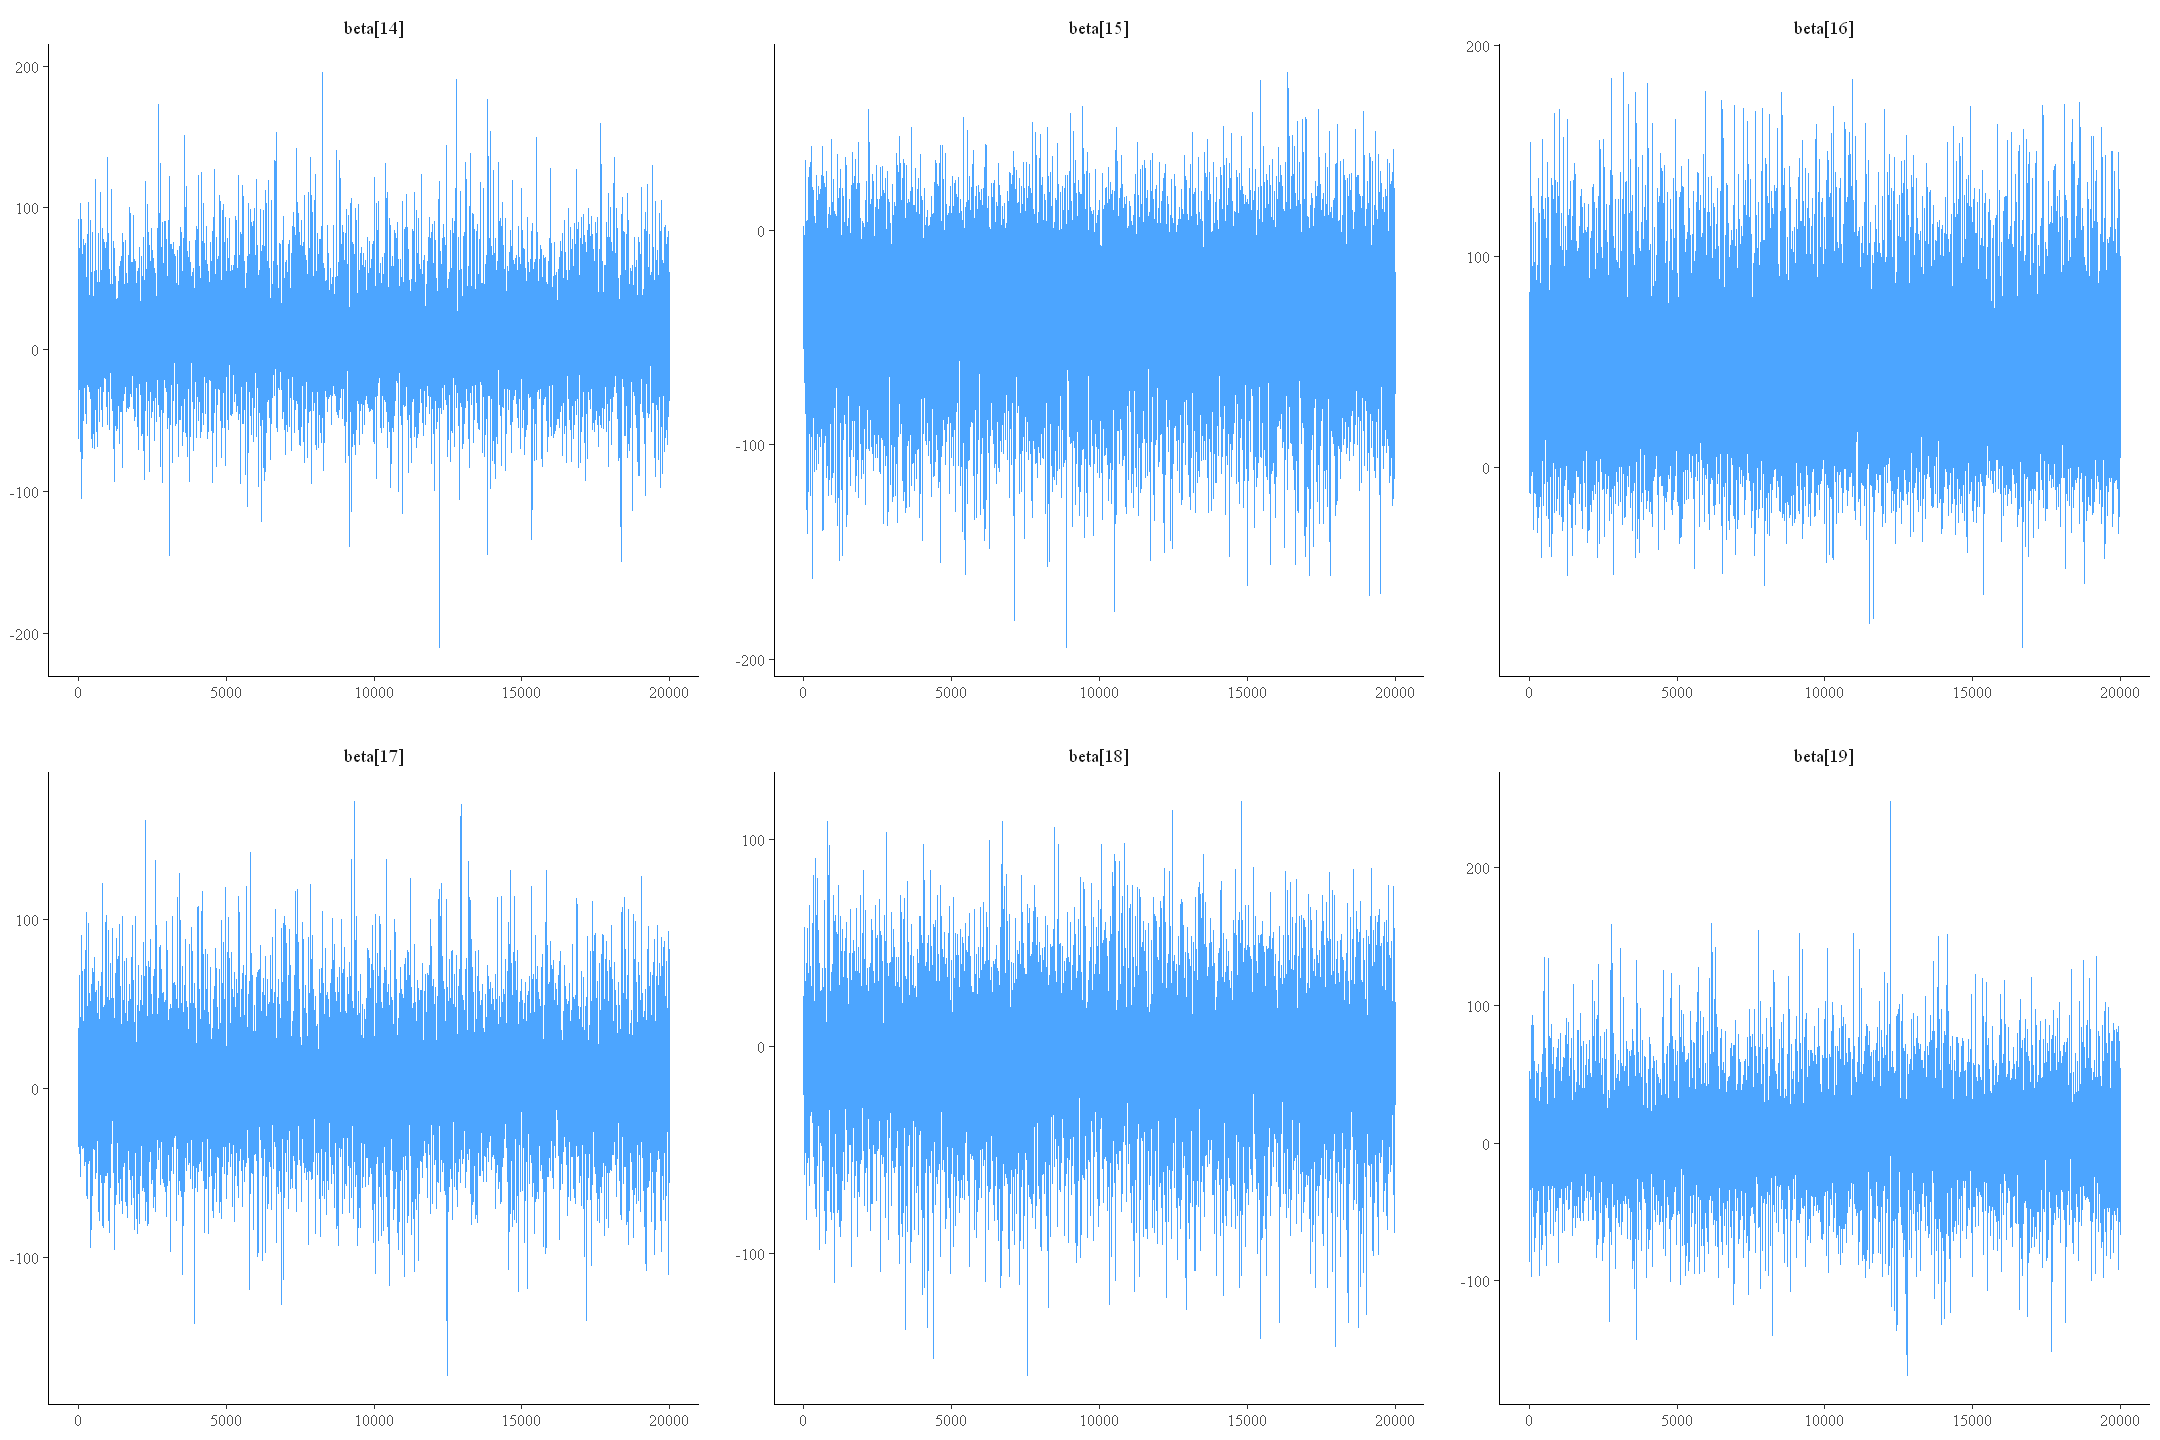

In [94]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.04, pars=vars(param_range("beta", 14:19)))

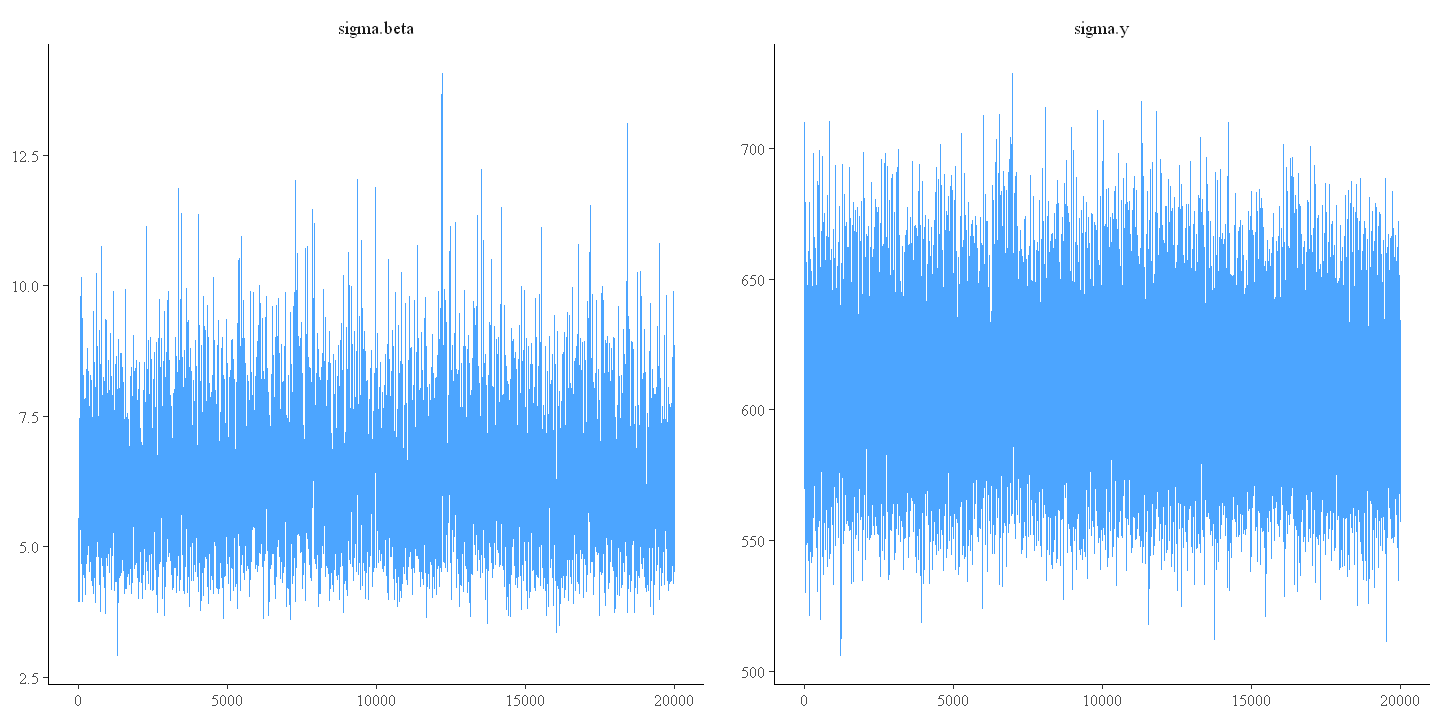

In [95]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_trace(Hitters.sample.04, pars=vars(contains("sigma")))

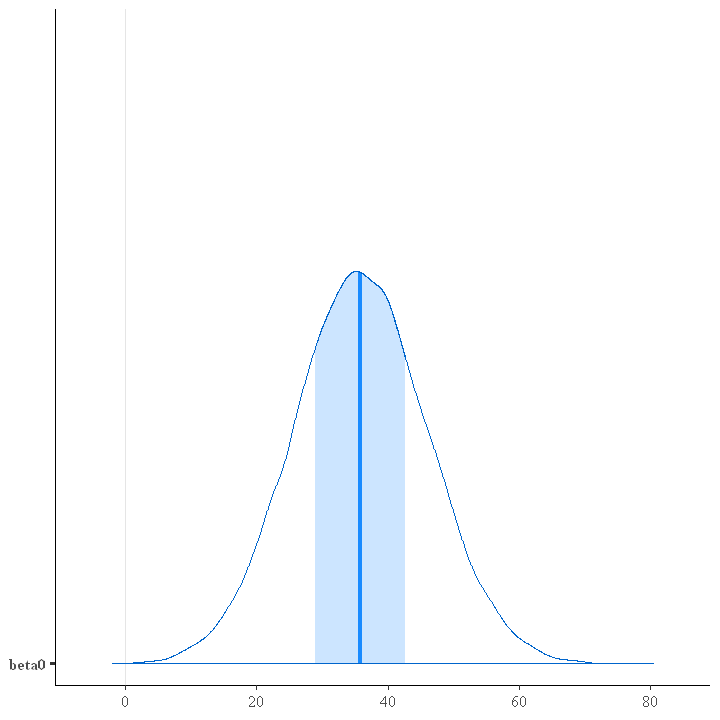

In [96]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_areas(Hitters.sample.04, pars=vars("beta0"))

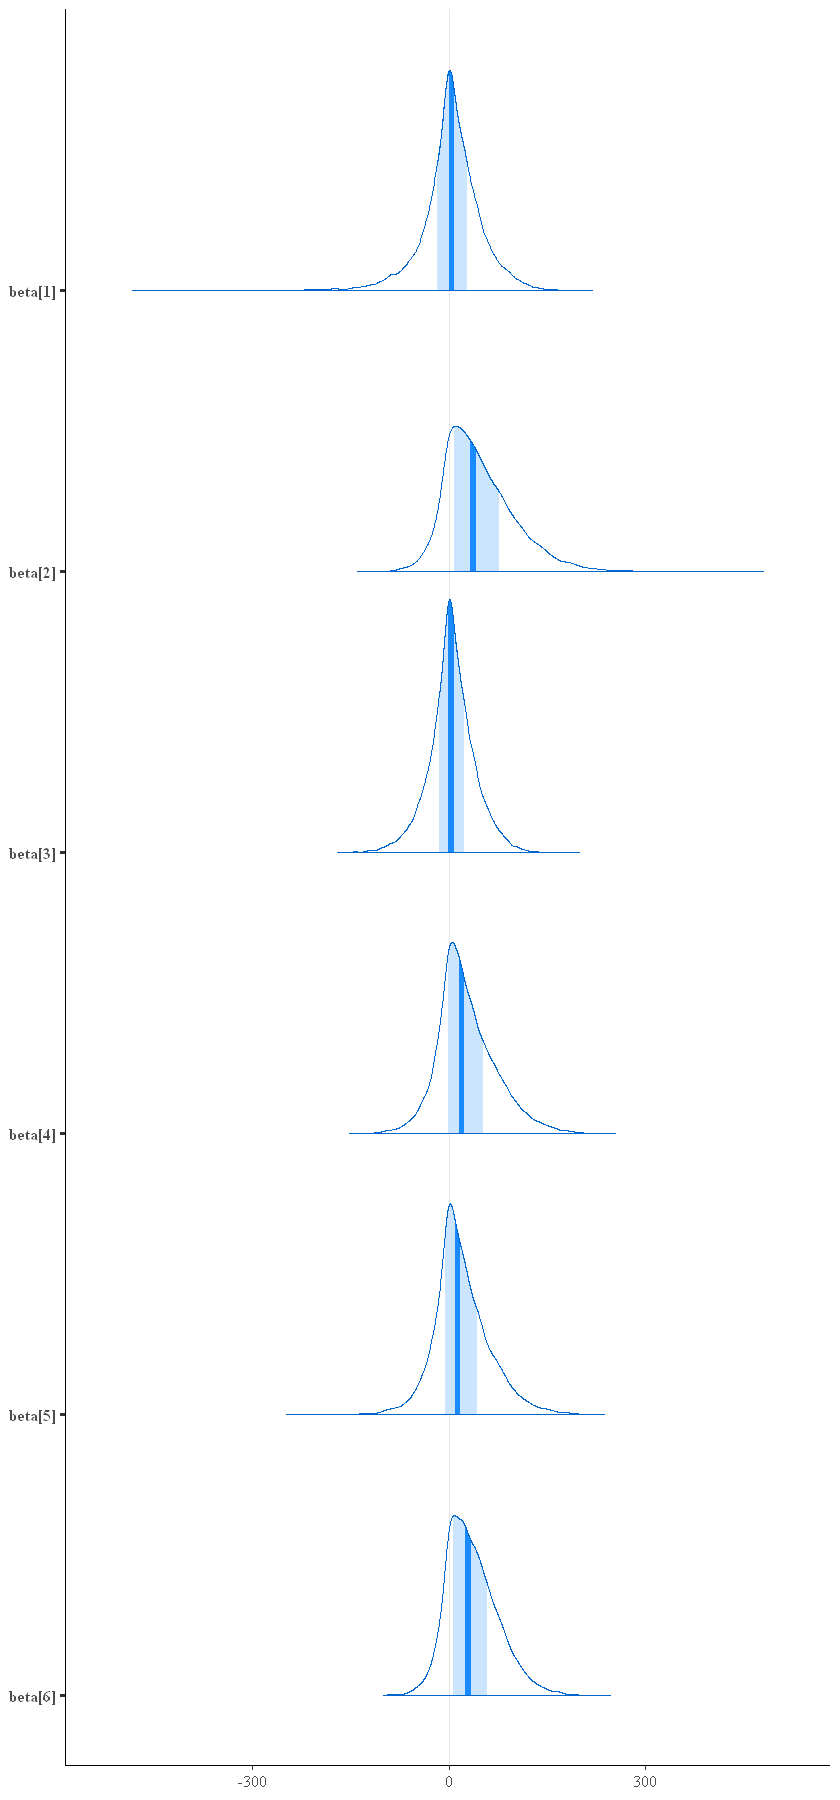

In [97]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.04, pars=vars(param_range("beta", 1:6)))

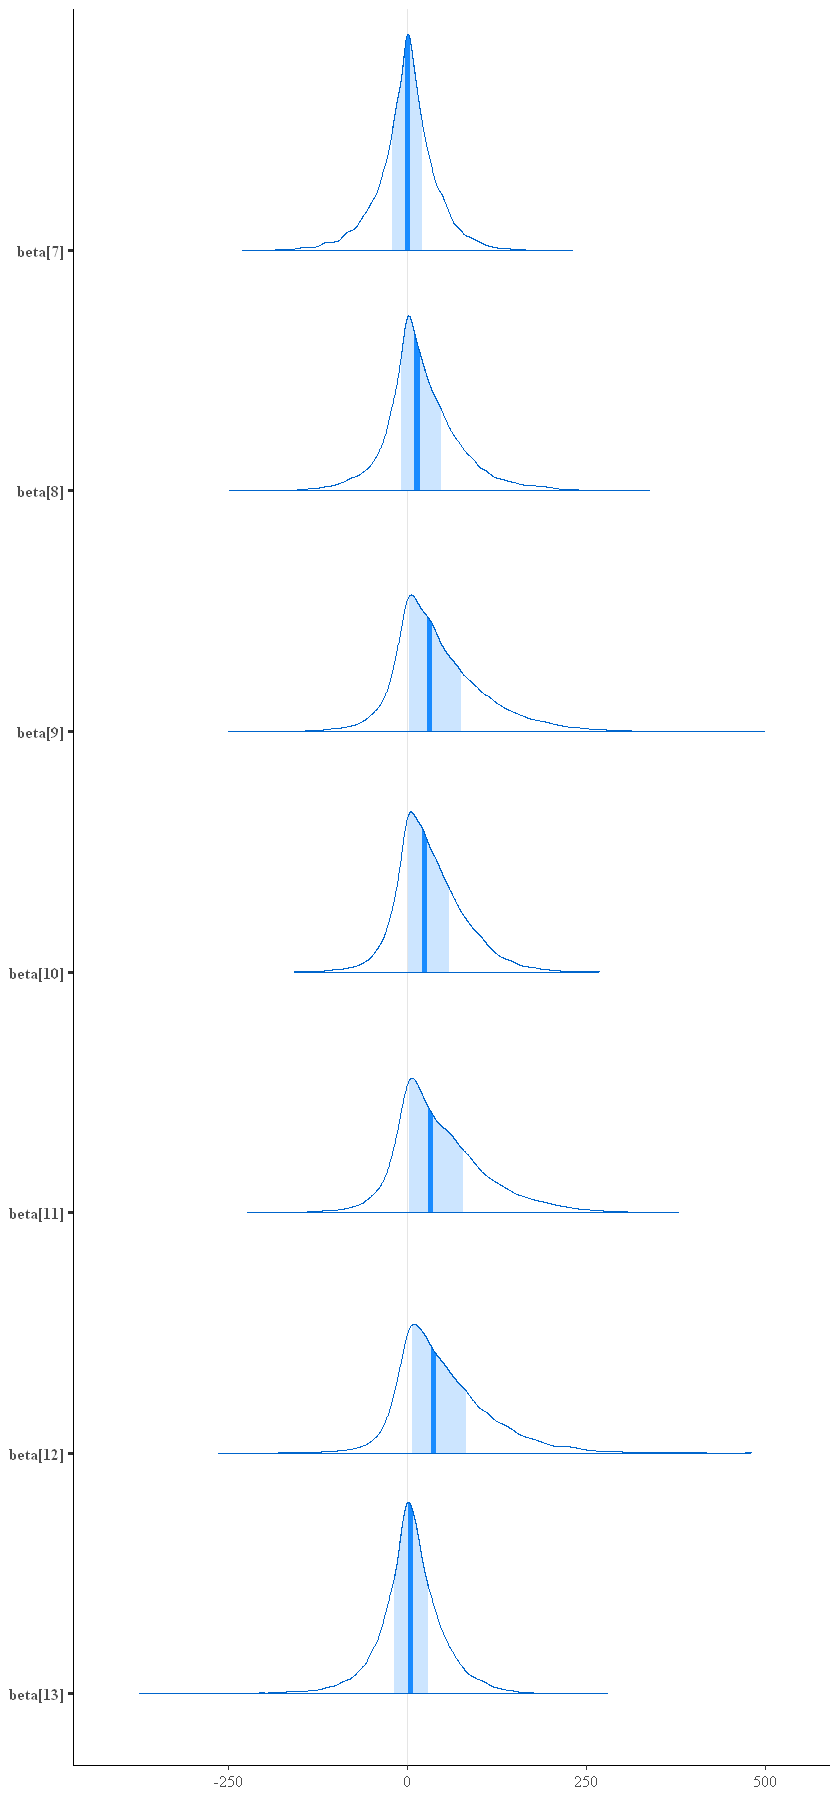

In [98]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.04, pars=vars(param_range("beta", 7:13)))

In [99]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.04, pars=vars(param_range("beta", 14:19)))

In [100]:
options(repr.plot.width=6,repr.plot.height=6)
old.par<-par(mfrow=c(1,2))
mcmc_areas(Hitters.sample.04, pars=vars("sigma.beta"))
mcmc_areas(Hitters.sample.04, pars=vars("sigma.y"))
par(old.par)

## 07. Bayesian Horseshoe Shrinkage
### A Horseshoe prior for the regression coefficients. 
### A common gamma prior for the regression coefficients' precision parameter.
### Gamma prior for the precision parameter

## Horseshoe distribution

The latent variable formulation of the Horsehoe is

$$
    \begin{aligned} 
    (\beta_i|\lambda_i, \tau) \sim N(0, \lambda_i^2\tau^2)\\[0.2cm]
     \lambda_i \sim \halfcauchydist(0, 1)\\[0.2cm]
     \tau \sim \halfcauchydist(0, 1)\\[0.2cm]
    \end{aligned}
$$

where $\halfcauchydist(0, 1)$ is the half-Cauchy distribution. 

### Model:

$\beta_{0}$ is the intercept, $\beta=(\beta_{1},\dots,\beta_{p})$ is the vector of regression coefficients,   
$\tau_{y}=1/\sigma_{y}^{2}$ is the regression response precision parameter,   
$\tau_{\beta}=1/\sigma_{\beta}^{2}$ is the common precision parameter for the regression coefficients.

$$
    \begin{array}{lclcll}
        y_{i}           &\sim    &\normaldist(\mu_{i},\sigma_{y}^{2}),&&&1\leq i\leq n,\\[0.2cm]
        \mu_{i}         &=       &\beta_{0}+\sum_{j=1}^{p}x_{ij}\cdot \beta_{j}\mskip-30mu
                                      &=&\beta_{0}+x_{i\,\cdot\,}\cdot \beta,\mskip45mu  &1\leq i\leq n,\\[0.2cm]
        \beta_{0}        &\sim   &\normaldist(0,1.0E01),\\[0.2cm]
        \beta_{j}        &\sim   &\normaldist(0,\psi_{\beta,j}), &&1\leq j\leq p,\\[0.2cm]
        \psi_{\beta,j}   &=      &1/\sigma_{\beta,j}^{2},        &&1\leq j\leq p,  &\text{(Precision parameter for } \beta_{j})\\[0.2cm]              
        \sigma_{\beta,j} &=      &\lambda_{j}\cdot\tau,          &&1\leq j\leq p,\\[0.2cm]
        \lambda_{j}      &\sim   &\halfcauchydist(0, 1),         &&1\leq j\leq p,\\[0.2cm]
        \tau             &\sim   &\halfcauchydist(0, 1)\\[0.2cm] 
        \tau_{y}         &=      &1/\sigma_{y}^{2},\\[0.2cm]
        \tau_{y}         &\sim   &\gammadist(0.01,0.01).
    \end{array}
$$

In [101]:
Hitters.model.String.05 <- "model{
# Likelihood
    for(i in 1:n){
        y[i] ~ dnorm(mu[i], tau.y)
        mu[i] <- beta0 + inprod(x[i,],beta[]) 
        }
# A gaussian prior with a small precision for the intercept beta0 and the vector beta of regression coefficients
    beta0 ~ dnorm(0, 0.01)
    for(j in 1:p){
        beta[j] ~ dnorm(0,psi.beta[j])
        }

# Priors for the precision parameters 
    sigma.y <- 1.0/sqrt(tau.y)
    for(j in 1:p){
        psi.beta[j] <- pow(sigma.beta[j],-2)
        sigma.beta[j] <- lambda[j] * tau
        lambda[j]  ~ dt(0,1,1) T(0, )             # Notation for a Student's t with 1 degree of freedom truncated at zero = Half-Cauchy
        }
    tau    ~ dt(0,1,1) T(0, )
    tau.y  ~ dgamma(0.01, 0.01)
}" 

In [102]:
Hitters.data.list.05<-list(y = y, n = n, p = p, x = x0)

## Compile the model in JAGS

In [103]:
Hitters.model.05<-jags.model(textConnection(Hitters.model.String.05),data=Hitters.data.list.05)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 263
   Unobserved stochastic nodes: 41
   Total graph size: 6138

Initializing model



In [104]:
update(Hitters.model.05, 4000, progress.bar = "gui")

In [105]:
Hitters.sample.05<-coda.samples(Hitters.model.05, variable.names = c("beta0", "beta", "sigma.y", "sigma.beta"), 
                 n.iter = 20000, progress.bar = "gui") 

In [106]:
summary(Hitters.sample.05)


Iterations = 5001:25000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 20000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                   Mean     SD Naive SE Time-series SE
beta[1]          8.1101  37.83  0.26752        1.33279
beta[2]         42.8016  62.58  0.44251        3.02713
beta[3]          2.4799  22.83  0.16144        0.48856
beta[4]         27.8766  49.57  0.35053        3.10707
beta[5]         14.2872  37.33  0.26400        1.51862
beta[6]         25.2592  41.96  0.29673        1.98308
beta[7]         -3.2698  31.14  0.22018        0.71769
beta[8]         21.3739  61.75  0.43664        4.46632
beta[9]         36.4115  74.82  0.52906        4.50087
beta[10]        15.5690  41.09  0.29054        1.76476
beta[11]        58.7455  93.26  0.65945        6.65820
beta[12]        74.9773 101.03  0.71442        9.19342
beta[13]         3.6866  36.27  0.25644        1.21998
beta[14]         3.6270  17.77 

In [107]:
#plot(Hitters.sample.05) 

In [108]:
options(repr.plot.width=7,repr.plot.height=7)
mcmc_trace(Hitters.sample.05, pars=vars("beta0"))

In [109]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.05, pars=vars(param_range("beta", 1:6)))

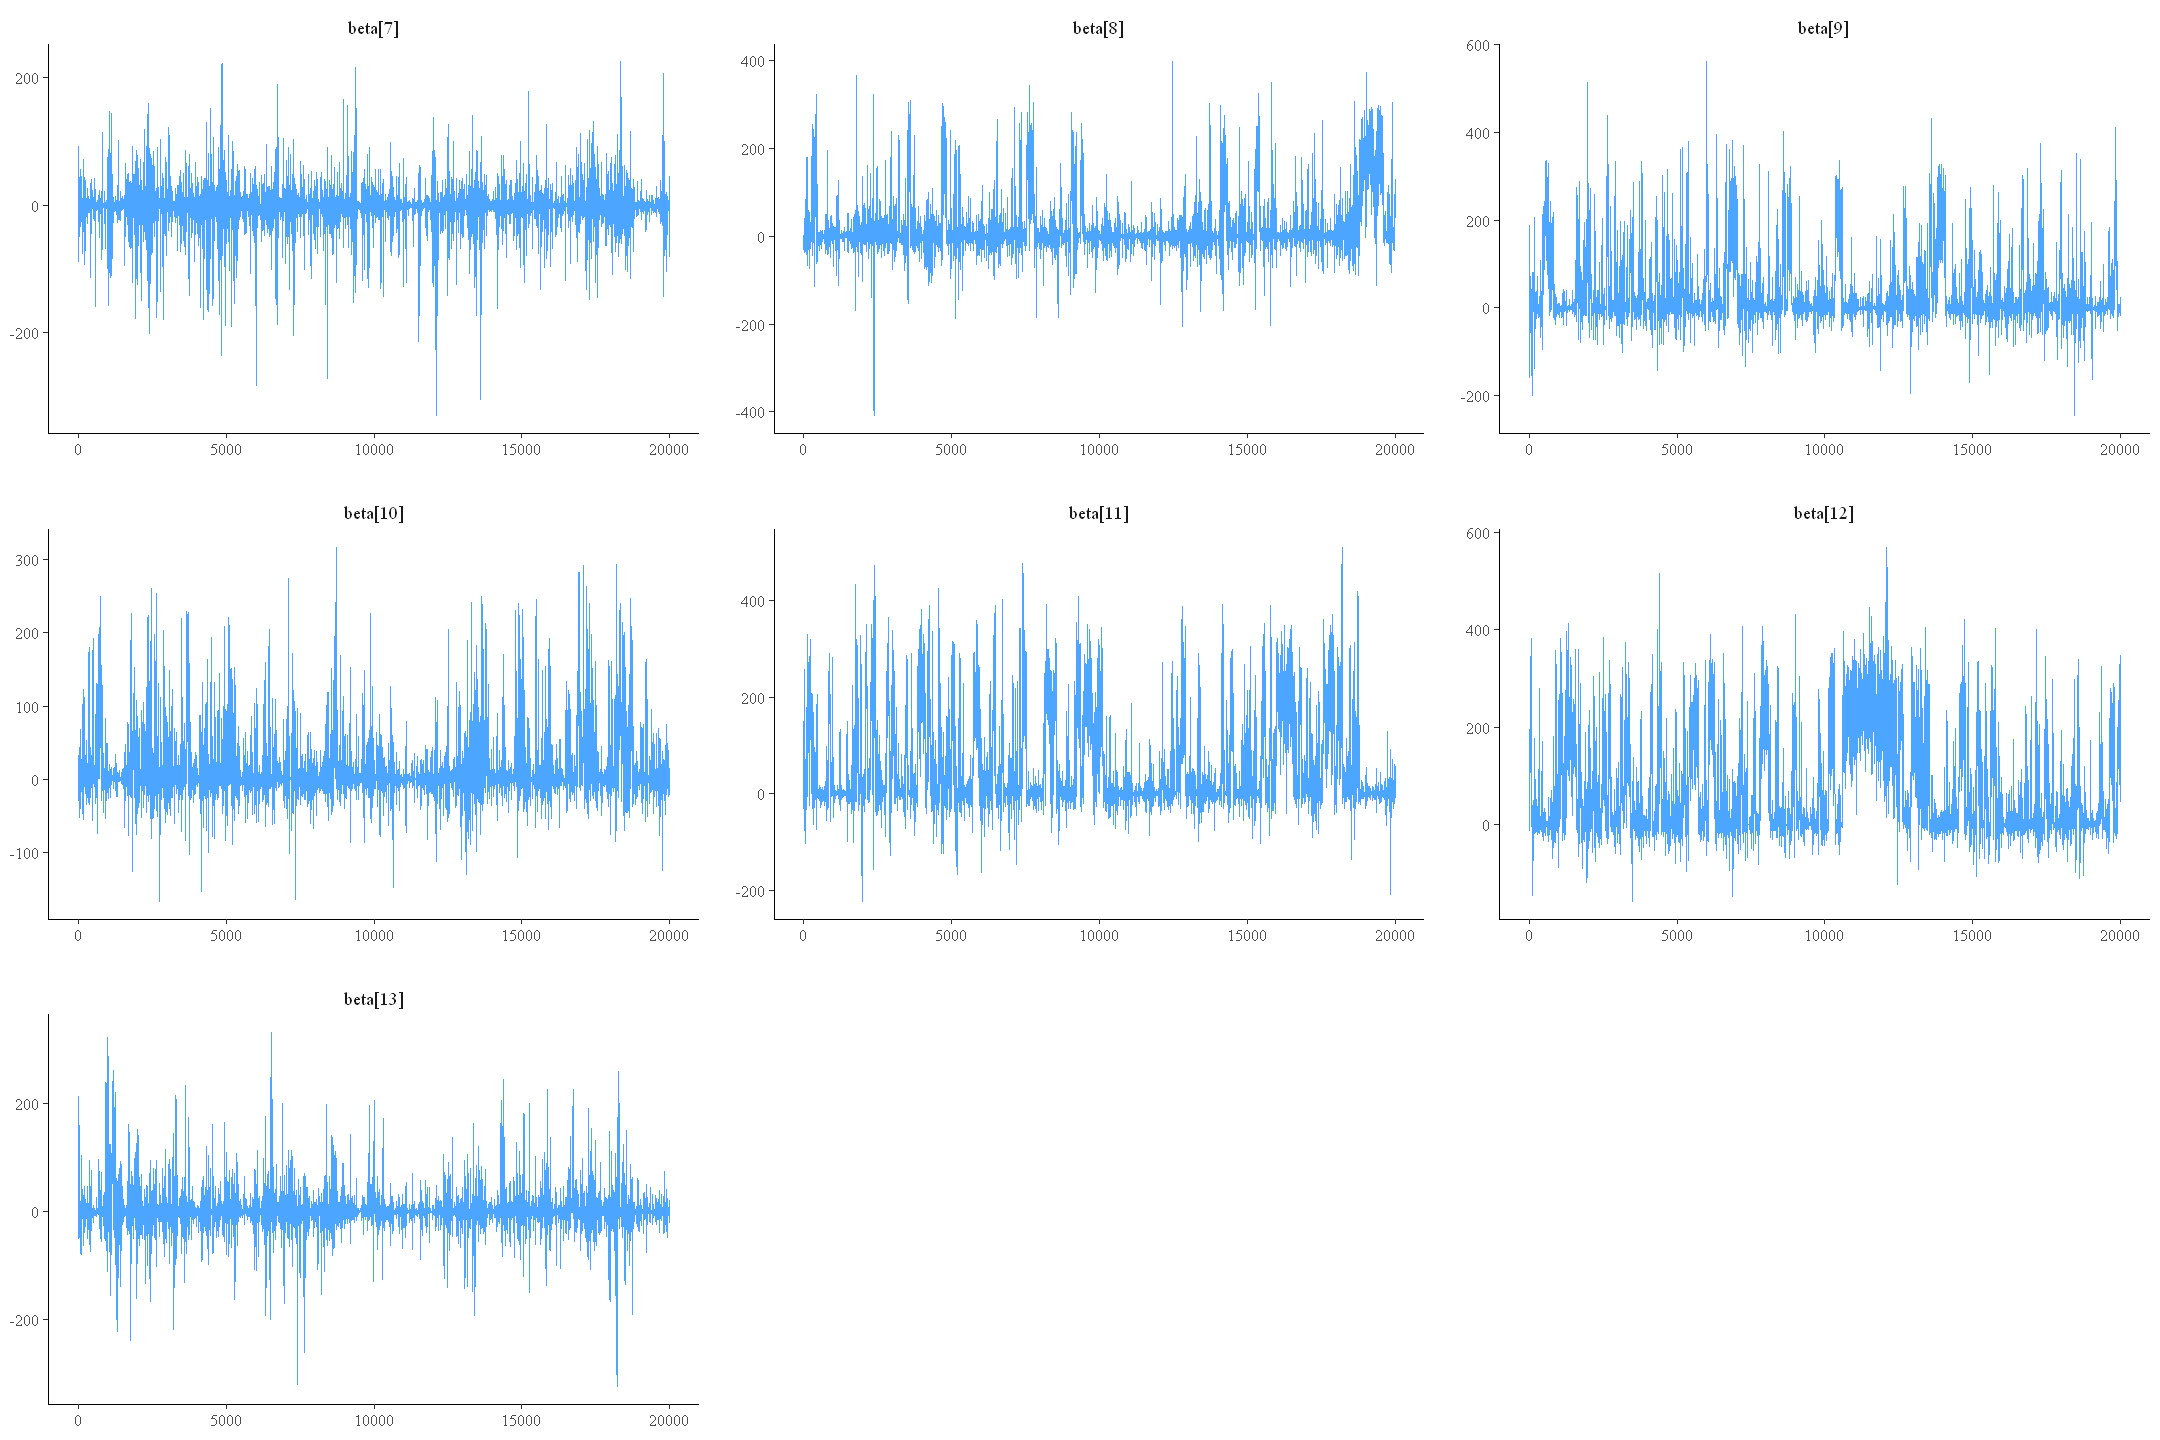

In [110]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.05, pars=vars(param_range("beta", 7:13)))

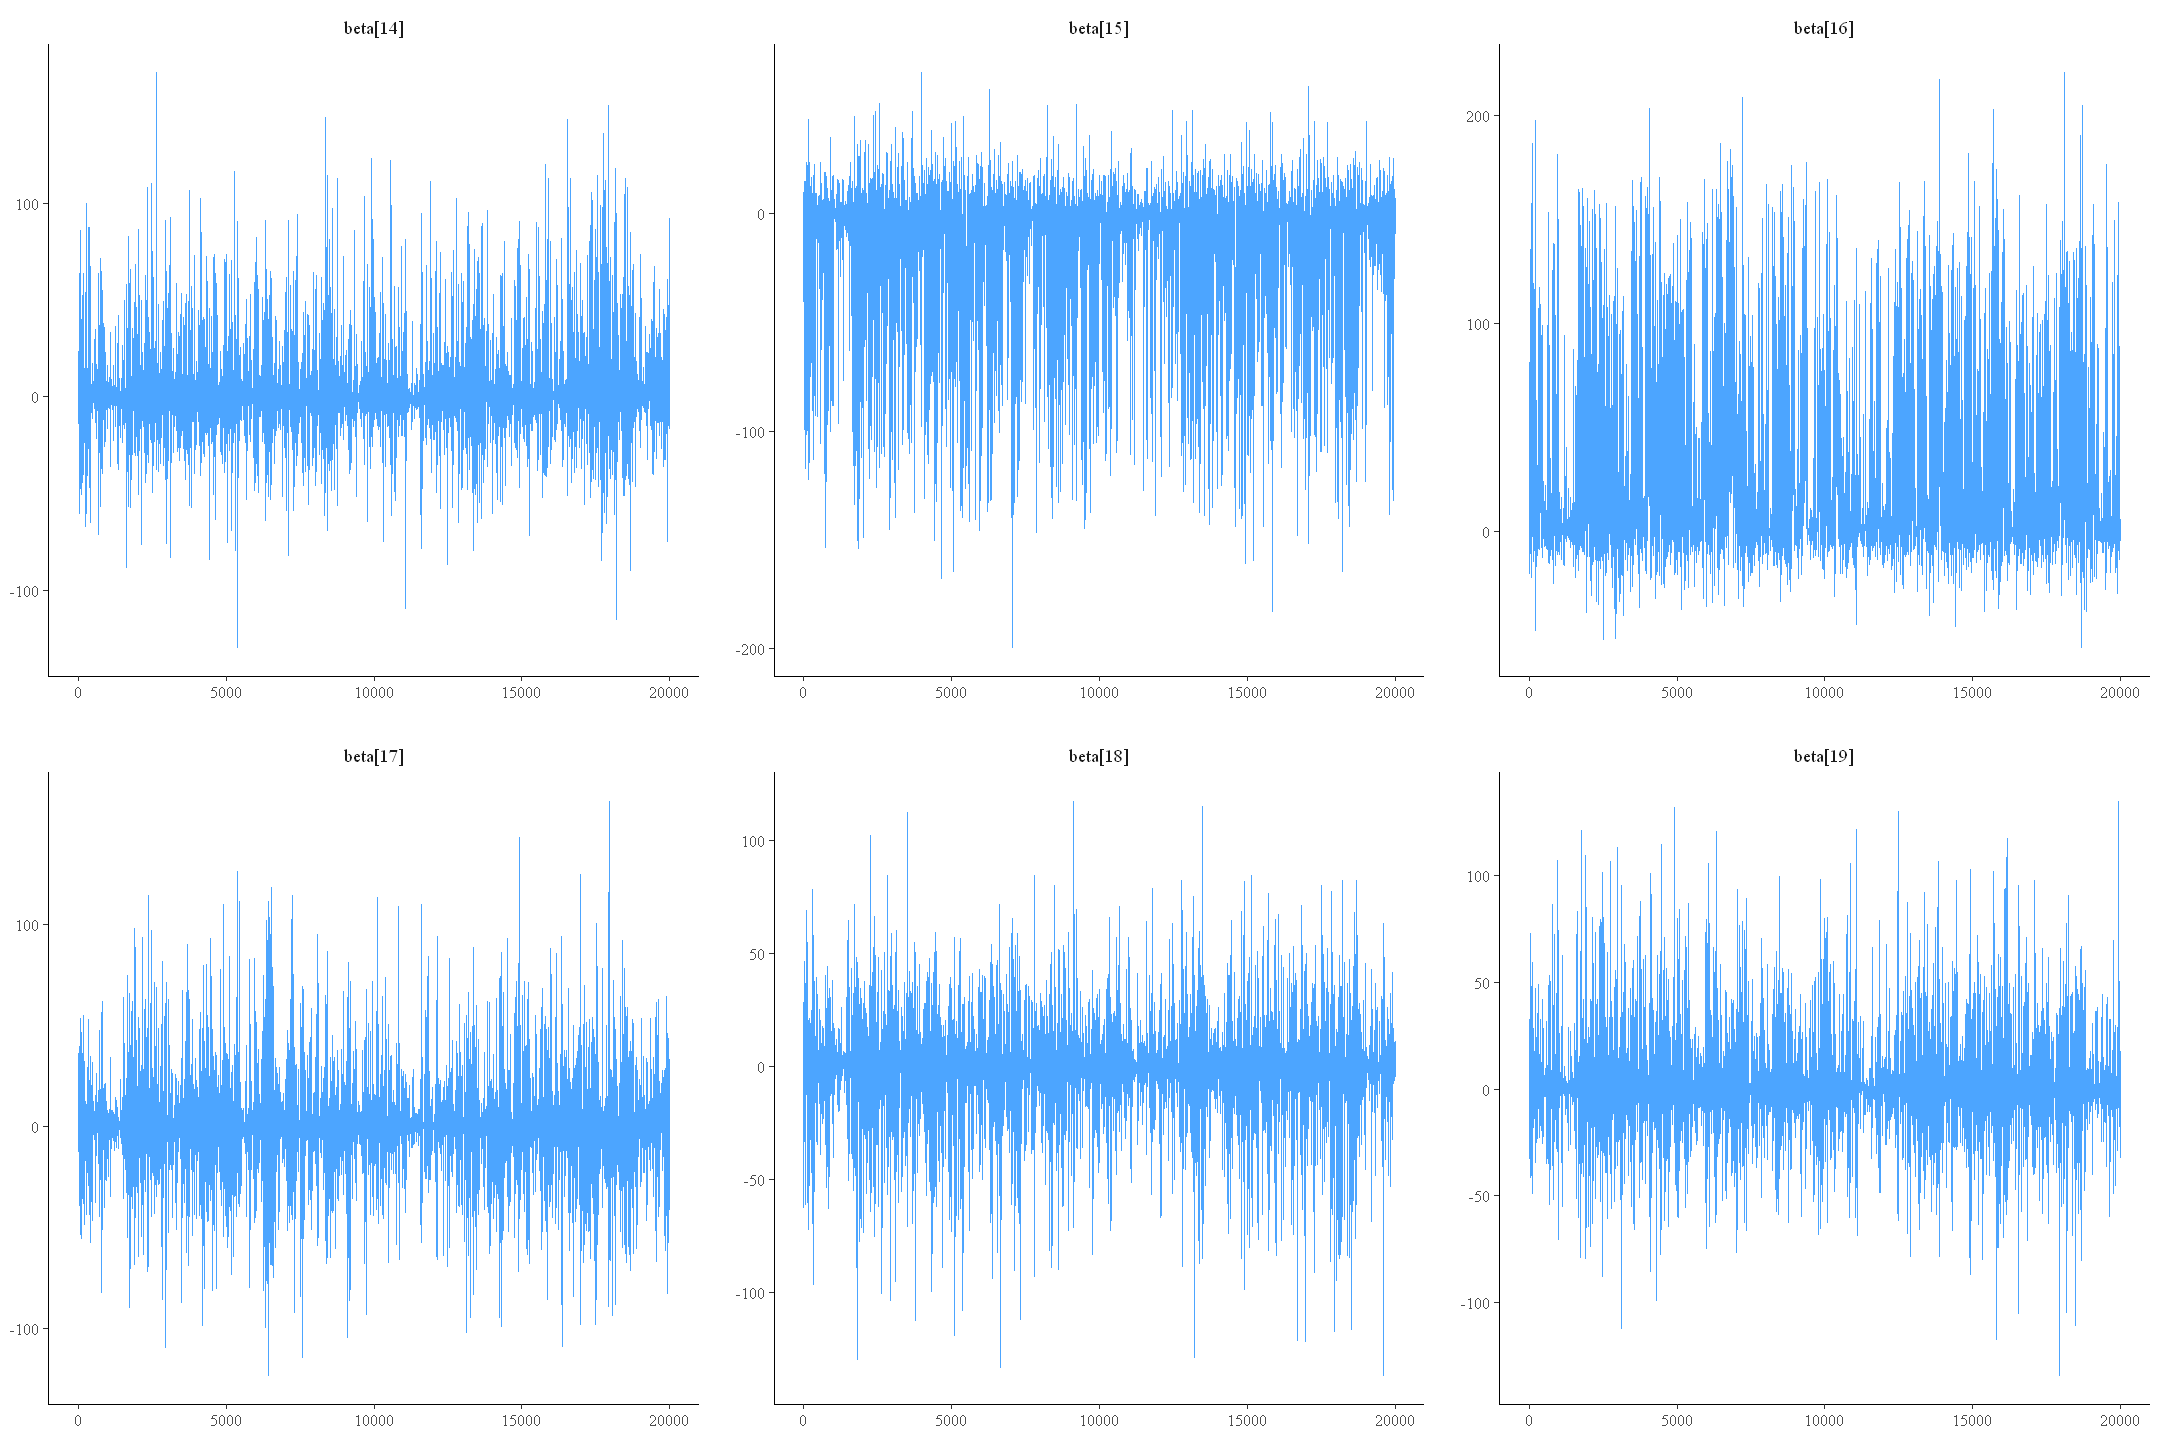

In [111]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_trace(Hitters.sample.05, pars=vars(param_range("beta", 14:19)))

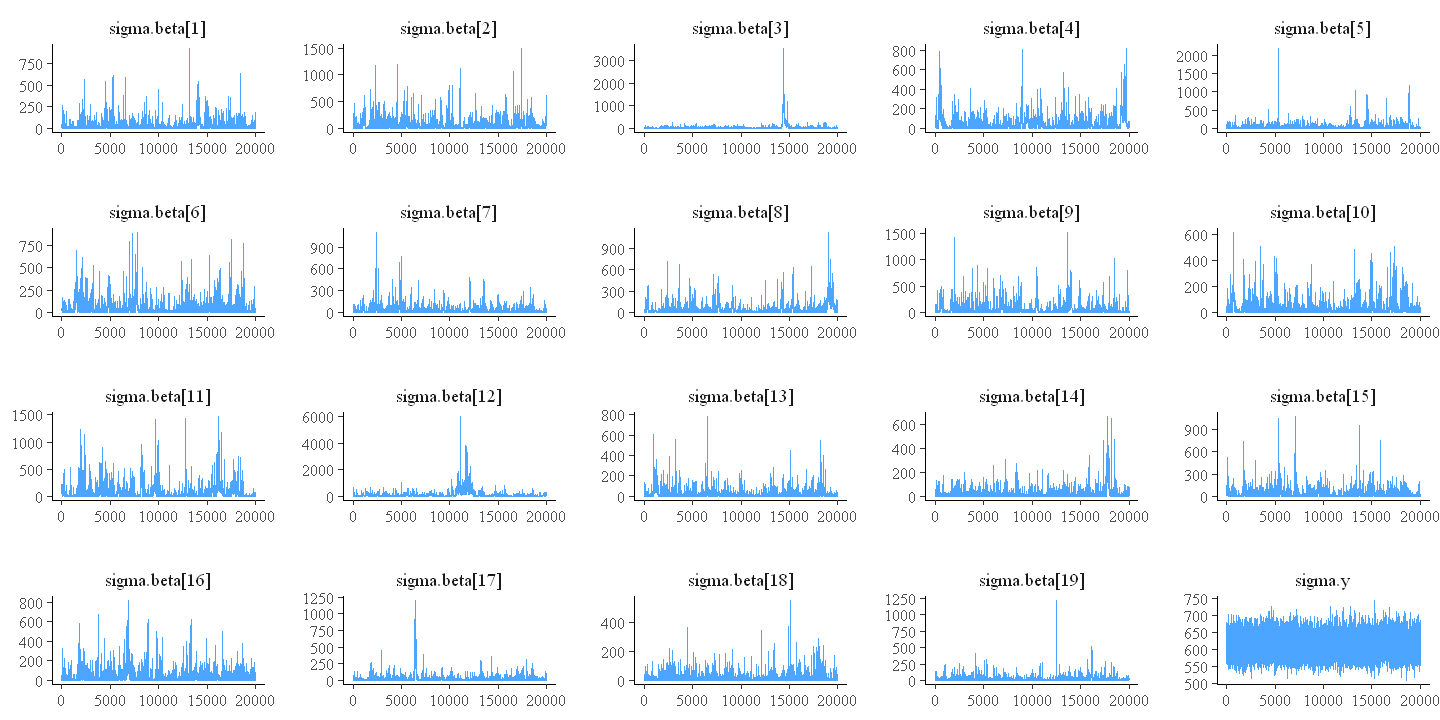

In [112]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_trace(Hitters.sample.05, pars=vars(contains("sigma")))

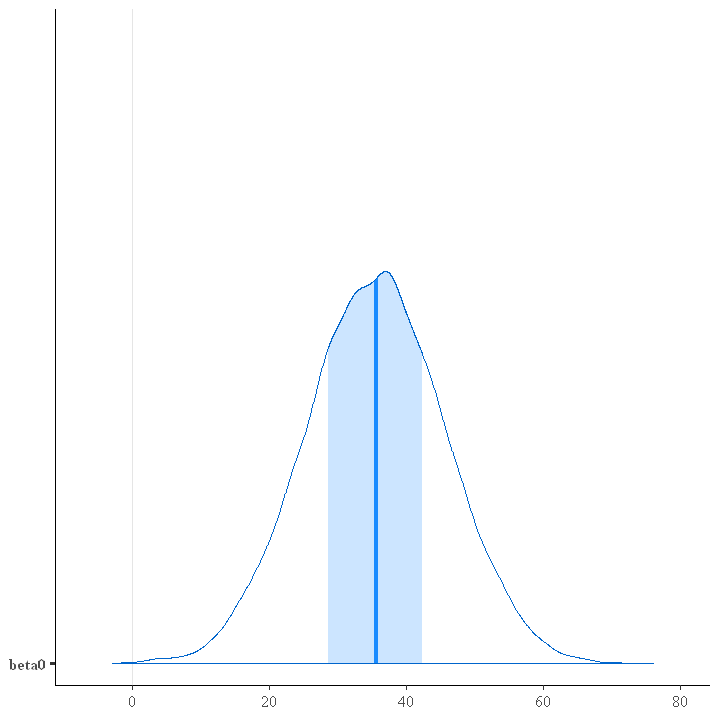

In [113]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_areas(Hitters.sample.05, pars=vars("beta0"))

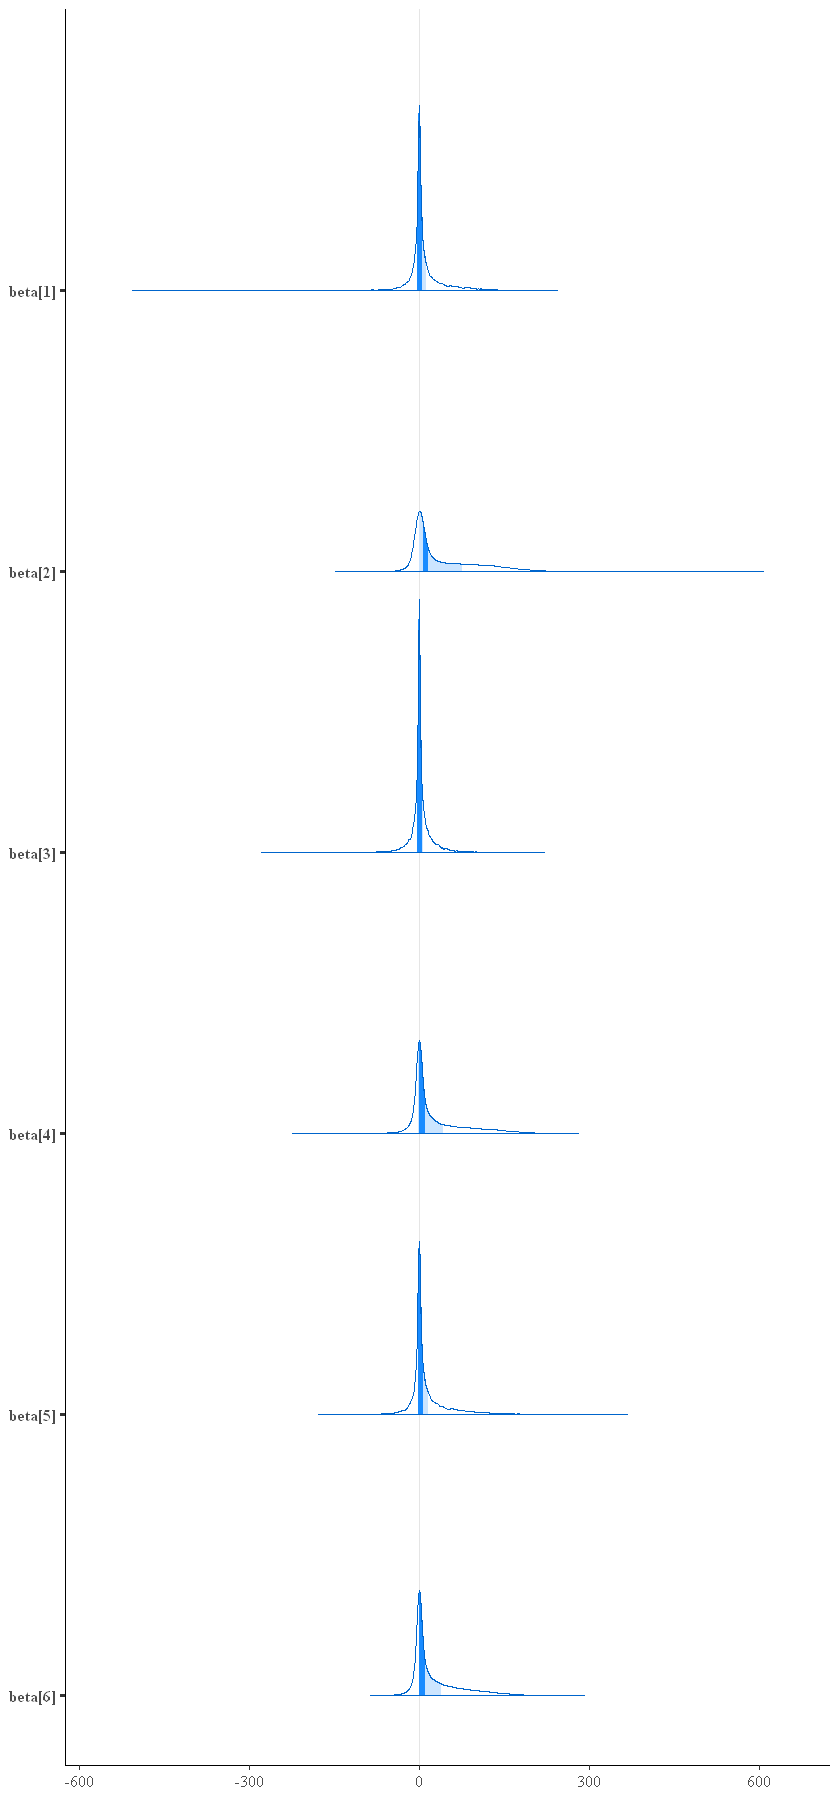

In [114]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.05, pars=vars(param_range("beta", 1:6)))

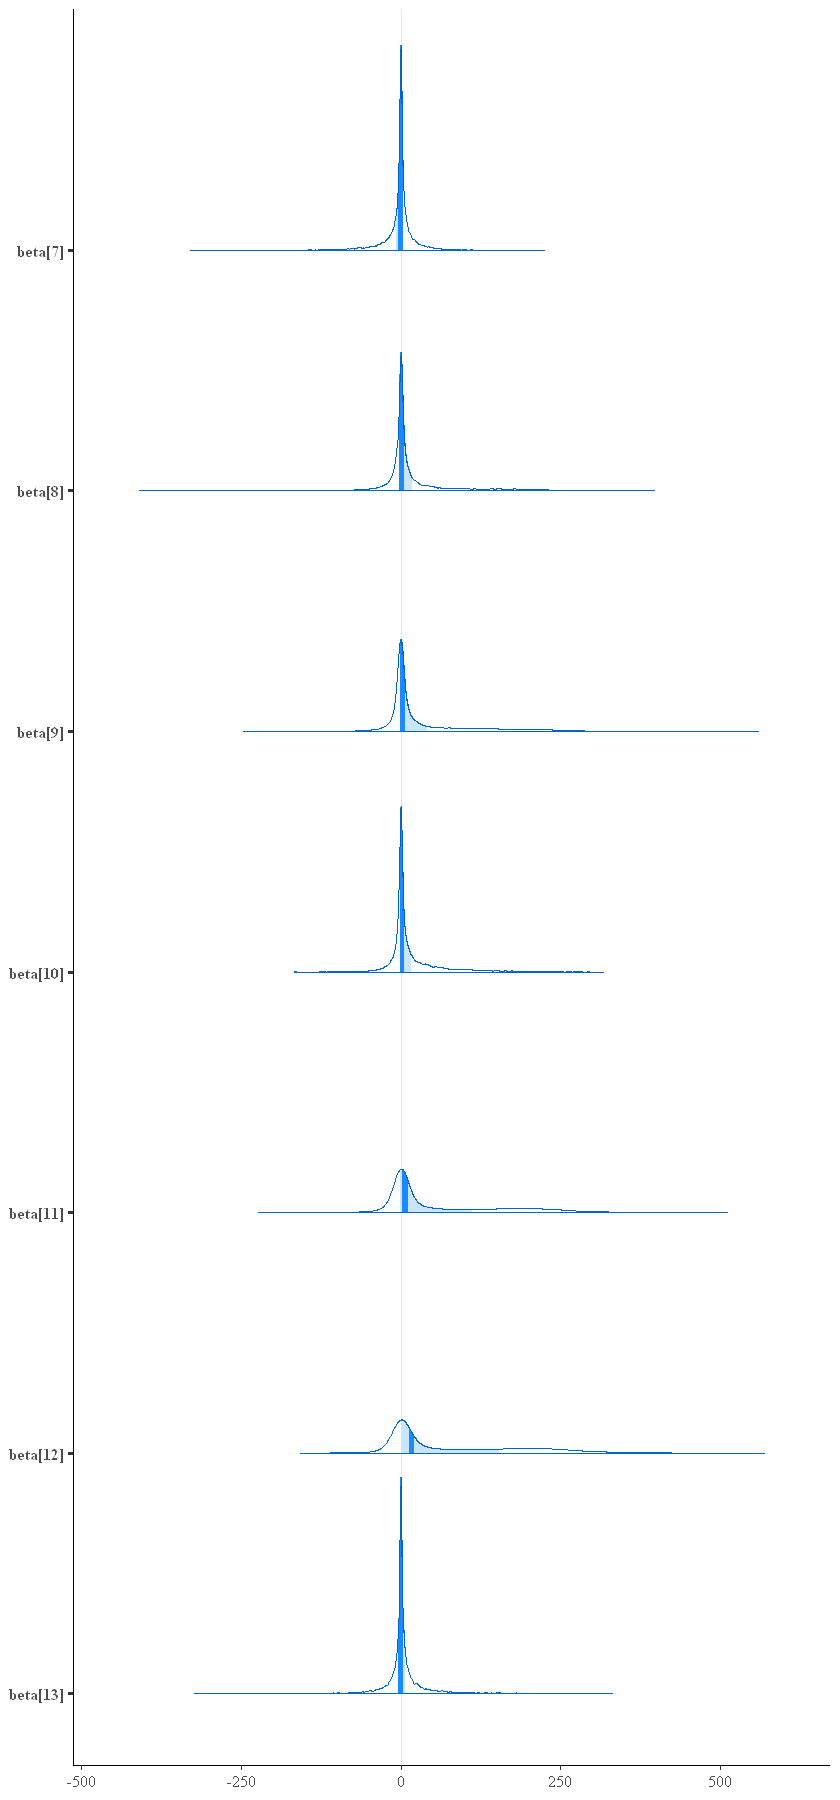

In [115]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.05, pars=vars(param_range("beta", 7:13)))

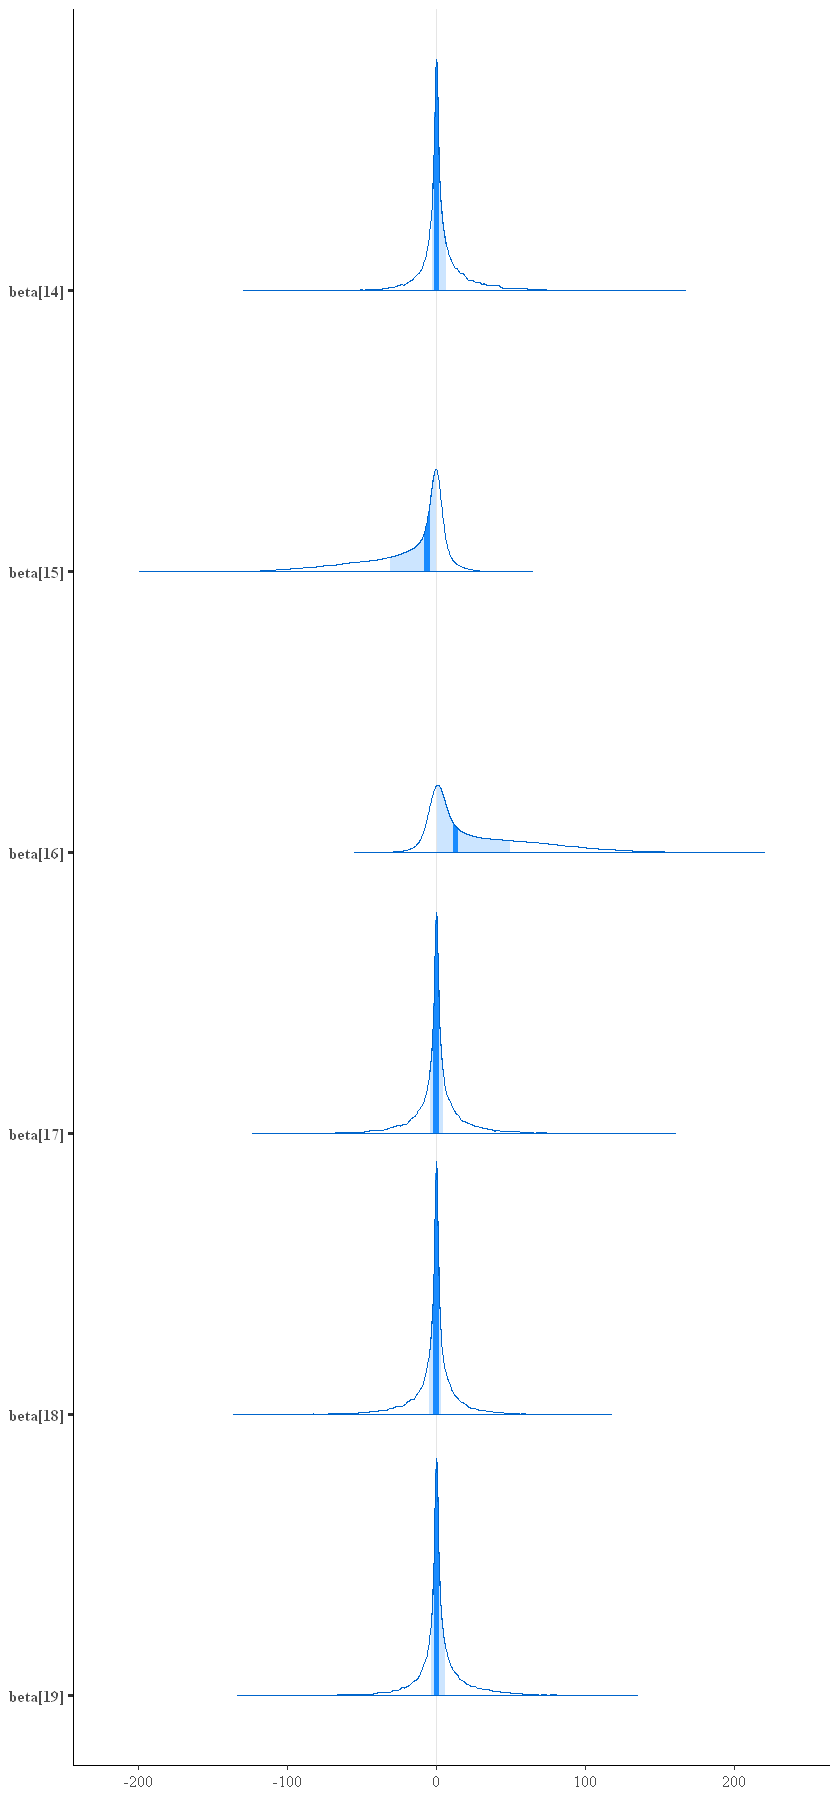

In [116]:
options(repr.plot.width=7,repr.plot.height=15)
mcmc_areas(Hitters.sample.05, pars=vars(param_range("beta", 14:19)))

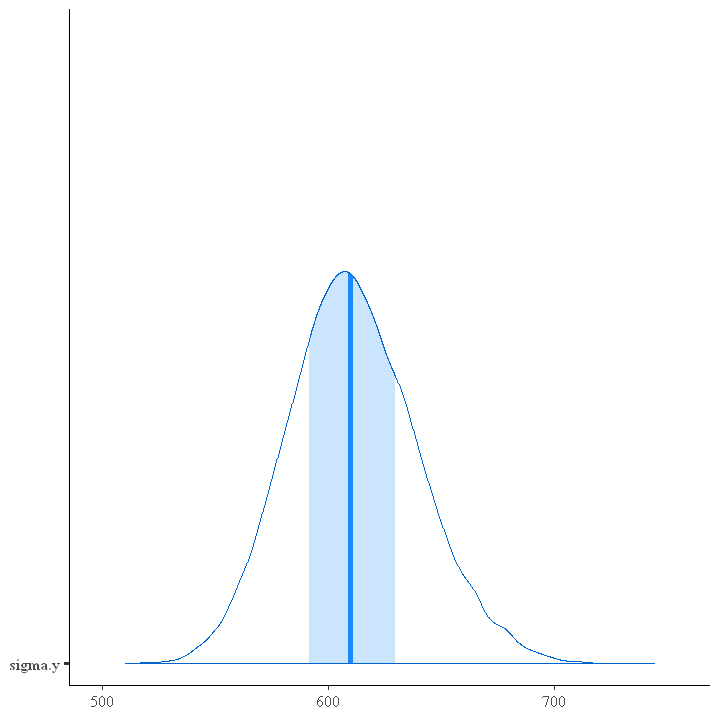

In [118]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_areas(Hitters.sample.05, pars=vars("sigma.y"))